#### Problem Statement

The banks or companies that provide loan find it difficult to lend to people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.

It would be better if there is a mechanism or a business intelligence that could go through the loan applicants profile and identify patterns that could indicate whether an applicant would be a potential defaulter or non-defaulter, which would greatly help the banks in deciding whom to provide loans, deny the loan, reduce the amount of loan, lend (to risking applicants) at a higher interest rate etc.

This case study aims to provide the same facility. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the main criteria of this case study.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis on application_data.csv

#### Read in the datasets

In [3]:
# importing the dataset of "application data" in data0

data0 = pd.read_csv("application_data.csv", header = 0)
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## 1. Data Understanding and Cleaning

In [4]:
# Checking the shape of data0

data0.shape

(307511, 122)

In [5]:
# printing the information of variables in data0 (application_data) to check their data types.

data0.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
categorical_cols_data0 = ["TARGET","CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE"]

In [7]:
for c in categorical_cols_data0 : 
    print(data0[c].value_counts())
    print("-"*40)
    print(data0[c].value_counts(normalize=True)*100)
    print("="*40)

0    282686
1     24825
Name: TARGET, dtype: int64
----------------------------------------
0    91.927118
1     8.072882
Name: TARGET, dtype: float64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------
N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------
Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
--------------------------------

Statistical insights from the columns in data0 (application_data) :
    
    1. We can see that only 8% of the applicants had diffficulties with payment and 92% applicants did have difficulties with payment (paid the installment on time).
    2. More Female's have applied for the loan, around 65% are female applicants.
    3. Only 34% of the applicants own a car.
    4. In the contrary, almost 70% own a house (property).
    5. Around 51% applicants are working professionals, followed by commercial associate applicants at 23%. Also applicants who are Businessmen are one of the least to have applied for loan.
    6. 71% of applicants have completed their secondary level education, with academic degree being the least one's to apply for the loan.
    7. We can see that majority of the people applying for loan are married (~63%), followed by singles though very less.
    8. The application consists mostly of people whose occupation type is laborers.
    9. There is a high percentage of XNA values in feature occupation type, ~18%

### 1.1 Handling missing values

### 1.1.1 Fixing the Rows and Columns

#### Dropping columns that are of no use

In [8]:
# Adding all non-significant columns to a list

no_use_cols = ["NAME_CONTRACT_TYPE", "NAME_TYPE_SUITE", "REGION_POPULATION_RELATIVE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", 
                    "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
                    "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START","OBS_30_CNT_SOCIAL_CIRCLE",
                    "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "FLAG_DOCUMENT_2",
                    "FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7",
                    "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12",
                    "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
                    "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR",
                    "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
                    "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", ]
len(no_use_cols)

43

In [9]:
# Dropping the above column as it is of no use to us

data0.drop(no_use_cols, axis = 1, inplace = True)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1           M            N               Y             0   
1      100003       0           F            N               N             0   
2      100004       0           M            Y               Y             0   
3      100006       0           F            N               Y             0   
4      100007       0           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI  \
0                0.0205          0.0193                   0.0000   
1                0.0787          0.0558                   0.0039   
2                   NaN             NaN                      NaN   
3                   NaN             NaN                      NaN   
4                   NaN             NaN                      NaN   

  NONLIVINGAREA_MEDI  FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE  \
0               0.00    reg oper account  block of flats          0.0149   
1               0.01    reg oper account  block of flats          0.0714   
2                NaN                 NaN             NaN             NaN   
3                NaN                 NaN             NaN             NaN   
4                NaN                 NaN             NaN             NaN   

   WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE DAYS_LAST_PHONE_CHANGE  
0        Stone, brick                   No                -1134.0  
1               Block                   No                 -828.0  
2                 NaN                  NaN                 -815.0  
3                 NaN                  NaN                 -617.0  
4                 NaN                  NaN                -1106.0  

[5 rows x 79 columns]

#### Column fixing, correcting CODE_GENDER abbreviation.

In [10]:
def genderAbb(str) :
    if(str == 'M') :
        return "Male"
    elif (str == 'F') :
        return "Female"

In [11]:
data0["CODE_GENDER"] = data0.CODE_GENDER.apply(lambda x : genderAbb(x))
data0["CODE_GENDER"].head()

0      Male
1    Female
2      Male
3    Female
4      Male
Name: CODE_GENDER, dtype: object

#### Column fixing, correcting FLAG_OWN_CAR abbreviation.

In [12]:
def YesNoAbb(str) :
    if(str == 'y' or str == 'Y') :
        return "Yes"
    elif (str == 'n' or str == 'N') :
        return "No"

In [13]:
data0["FLAG_OWN_CAR"] = data0.FLAG_OWN_CAR.apply(lambda x : YesNoAbb(x))
data0["FLAG_OWN_CAR"].head()

0     No
1     No
2    Yes
3     No
4     No
Name: FLAG_OWN_CAR, dtype: object

#### Column fixing, correcting FLAG_OWN_REALTY abbreviation.

In [14]:
data0["FLAG_OWN_REALTY"] = data0.FLAG_OWN_REALTY.apply(lambda x : YesNoAbb(x))
data0["FLAG_OWN_REALTY"].head()

0    Yes
1     No
2    Yes
3    Yes
4    Yes
Name: FLAG_OWN_REALTY, dtype: object

### 1.1.2 Impute/Remove missing values

##### Deleting columns with more then 40% null values in data0

In [15]:
# Finding columns that have more than 40% null values in data0

data0.columns[data0.isnull().mean() > 0.4]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [16]:
# Finding the number of columns having NULL values greater than 40%

len(data0.columns[data0.isnull().mean() > 0.4])

49

In [17]:
# Dropping columns in data0 that have more than 40% null values (as the column with such high percentage 
# of null values can hamper the analysis)

data0 = data0[data0.columns[data0.isnull().mean() < 0.4]]
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                      0                       0   
1                           0                      0                       0   
2                           0                      0                       0   
3                           0                      0                       0   
4                           0                      0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2 EXT_SOURCE_3  \
0                        0  Business Entity Type 3      0.262949     0.139376   
1                        0                  School      0.622246          NaN   
2                        0              Government      0.555912     0.729567   
3                        0  Business Entity Type 3      0.650442          NaN   
4                        1                Religion      0.322738          NaN   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0  

[5 rows x 30 columns]

In [18]:
# Shape of dataframe data0

data0.shape

(307511, 30)

In [19]:
# Calculate the missing values in each column of data frame: data0.

data0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        4
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
E

#### Handling missing values in CODE_GENDER column.

In [20]:
# Checking for null values in the CODE_GENDER column.

data0.CODE_GENDER.isnull().sum()

4

In [21]:
# Calculate the percentage of missing values in CODE_GENDER column.

(data0.CODE_GENDER.isnull().sum()/data0.shape[0]) * 100

0.0013007664766463637

In [22]:
# Displaying those records

data0[data0["CODE_GENDER"].isnull()]

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
35657       141289       0        None          Yes             Yes   
38566       144669       0        None           No             Yes   
83382       196708       0        None           No             Yes   
189640      319880       0        None          Yes             Yes   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
35657              0          207000.0    382500.0      19125.0   
38566              2          157500.0    270000.0      13500.0   
83382              1          135000.0    405000.0      20250.0   
189640             0          247500.0    540000.0      27000.0   

        AMT_GOODS_PRICE  ... REG_REGION_NOT_LIVE_REGION  \
35657          337500.0  ...                          0   
38566          225000.0  ...                          0   
83382          225000.0  ...                          0   
189640         900000.0  ...                          0   

       REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
35657                           0                           0   
38566                           0                           0   
83382                           0                           0   
189640                          0                           0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                       0                       0   
38566                       0                       0   
83382                       0                       0   
189640                      0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
35657                         0  Business Entity Type 1      0.295998   
38566                         0        Industry: type 3      0.709205   
83382                         0            Kindergarten      0.659185   
189640                        0                Medicine      0.658620   

       EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
35657      0.461482                  -286.0  
38566      0.310818                  -493.0  
83382      0.076984                  -851.0  
189640     0.360613                 -1681.0  

[4 rows x 30 columns]

In [23]:
# Drop the records with CODE_GENDER missing in dataframe data0 as the number of missing rows are insignificant.

data0 = data0[-data0.CODE_GENDER.isnull()]
data0.shape

(307507, 30)

In [24]:
# Checking for null values in the CODE_GENDER column.

data0.CODE_GENDER.isnull().sum()

0

#### Handling missing values in AMT_ANNUITY column.

In [25]:
# Checking for null values in the AMT_ANNUITY column.

data0.AMT_ANNUITY.isnull().sum()

12

In [26]:
# Calculate the percentage of missing values in AMT_ANNUITY column.

(data0.AMT_ANNUITY.isnull().sum()/data0.shape[0]) * 100

0.0039023501904021695

In [27]:
# Displaying those records

data0[data0.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
47531       155054       0        Male           No              No   
50035       157917       0      Female           No              No   
51594       159744       0      Female           No              No   
55025       163757       0      Female           No              No   
59934       169487       0        Male          Yes              No   
75873       187985       0        Male          Yes              No   
89343       203726       0      Female          Yes              No   
123872      243648       0      Female           No             Yes   
207186      340147       0        Male           No              No   
227939      364022       0      Female           No             Yes   
239329      377174       0      Female           No             Yes   
241835      379997       0      Female           No              No   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
47531              0          180000.0    450000.0          NaN   
50035              0           94500.0    450000.0          NaN   
51594              0          202500.0    539100.0          NaN   
55025              0          162000.0    296280.0          NaN   
59934              0          202500.0    360000.0          NaN   
75873              0          144000.0    219249.0          NaN   
89343              0           90000.0    157500.0          NaN   
123872             0          202500.0    929088.0          NaN   
207186             0          171000.0    486000.0          NaN   
227939             0          315000.0    628069.5          NaN   
239329             0          157500.0    792000.0          NaN   
241835             0          315000.0   1483231.5          NaN   

        AMT_GOODS_PRICE  ... REG_REGION_NOT_LIVE_REGION  \
47531          450000.0  ...                          0   
50035          450000.0  ...                          0   
51594          450000.0  ...                          0   
55025          225000.0  ...                          0   
59934          360000.0  ...                          0   
75873          166500.0  ...                          0   
89343          157500.0  ...                          0   
123872         720000.0  ...                          0   
207186         486000.0  ...                          1   
227939         499500.0  ...                          0   
239329         792000.0  ...                          0   
241835        1354500.0  ...                          0   

       REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
47531                           0                           0   
50035                           0                           0   
51594                           0                           0   
55025                           0                           0   
59934                           1                           1   
75873                           0                           0   
89343                           0                           0   
123872                          0                           0   
207186                          1                           1   
227939                          1                           1   
239329                          0                           0   
241835                          1                           1   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
47531                       0                       0   
50035                       0                       0   
51594                       1                       1   
55025                       1                       1   
59934                       0                       1   
75873                       0                       0   
89343                       0                       0   
123872                      0                       0   
207186                      1                       1   
227939                      

Dropping the records with AMT_ANNUITY missing.

In [28]:
# Drop the records with AMT_ANNUITY missing in dataframe data0 as the number of missing rows are insignificant.

data0 = data0[-data0.AMT_ANNUITY.isnull()]
data0.shape

(307495, 30)

In [29]:
# Checking for null values in the AMT_ANNUITY column.

data0.AMT_ANNUITY.isnull().sum()

0

#### Handling missing values in AMT_GOODS_PRICE column.

In [30]:
# Checking for null values in the AMT_GOODS_PRICE column.

data0.AMT_GOODS_PRICE.isnull().sum()

278

In [31]:
# Calculate the percentage of missing values in AMT_GOODS_PRICE column.

(data0.AMT_GOODS_PRICE.isnull().sum()/data0.shape[0]) * 100

0.09040797411340022

In [32]:
# Describe the AMT_GOODS_PRICE

data0.AMT_GOODS_PRICE.describe()

count    3.072170e+05
mean     5.383989e+05
std      3.694492e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

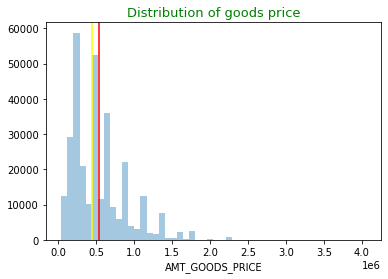

In [33]:
# Plot the distplot for AMT_GOODS_PRICE

plt.figure(figsize=[6,4])
sns.distplot(data0.AMT_GOODS_PRICE, kde = False)
plt.axvline(data0.AMT_GOODS_PRICE.mean(), color = "red")
plt.axvline(data0.AMT_GOODS_PRICE.median(), color = "yellow")
plt.title("Distribution of goods price", fontsize = 13, color = "green")
plt.show()

In [34]:
data0.AMT_GOODS_PRICE.skew()

1.3489938154834393

#### A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

#### According to this skewness range - AMT_GOODS_PRICE is a highly skewed distribution (right skewed).

Dropping the records with AMT_GOODS_PRICE missing.

In [35]:
# Drop the records with AMT_GOODS_PRICE missing in dataframe data0 as the column is highly skewed.

data0 = data0[~data0.AMT_GOODS_PRICE.isnull()]
data0.shape

(307217, 30)

In [36]:
# Checking for null values in the AMT_GOODS_PRICE column.

data0.AMT_GOODS_PRICE.isnull().sum()

0

#### Handling missing values in OCCUPATION_TYPE column.

In [37]:
# Checking for null values in the OCCUPATION_TYPE column.

data0.OCCUPATION_TYPE.isnull().sum()

96332

In [38]:
# Calculate the percentage of missing values in OCCUPATION_TYPE column.

(data0.OCCUPATION_TYPE.isnull().sum()/data0.shape[0]) * 100 

31.356337702666192

In [39]:
# Fetch the percentage of each OCCUPATION_TYPE in the data frame data0.

data0.OCCUPATION_TYPE.value_counts(normalize = True)

Laborers                 0.261432
Sales staff              0.152040
Core staff               0.130540
Managers                 0.101226
Drivers                  0.088148
High skill tech staff    0.053916
Accountants              0.046476
Medicine staff           0.040434
Security staff           0.031828
Cooking staff            0.028162
Cleaning staff           0.022040
Private service staff    0.012557
Low-skill Laborers       0.009915
Waiters/barmen staff     0.006383
Secretaries              0.006183
Realty agents            0.003561
HR staff                 0.002670
IT staff                 0.002490
Name: OCCUPATION_TYPE, dtype: float64

In [40]:
# Find the mode of OCCUPATION_TYPE in data0

OCCUPATION_TYPE_mode=data0.OCCUPATION_TYPE.mode()[0]
OCCUPATION_TYPE_mode

'Laborers'

Filling with Mode value

In [41]:
# Filling the missing values with mode value of OCCUPATION_TYPE in data0.

data0.OCCUPATION_TYPE.fillna(OCCUPATION_TYPE_mode, inplace = True)

In [42]:
data0.OCCUPATION_TYPE.value_counts(normalize = True)

Laborers                 0.493020
Sales staff              0.104366
Core staff               0.089608
Managers                 0.069485
Drivers                  0.060508
High skill tech staff    0.037010
Accountants              0.031903
Medicine staff           0.027756
Security staff           0.021848
Cooking staff            0.019332
Cleaning staff           0.015129
Private service staff    0.008619
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004381
Secretaries              0.004245
Realty agents            0.002445
HR staff                 0.001833
IT staff                 0.001709
Name: OCCUPATION_TYPE, dtype: float64

In [43]:
# Checking for null values in the OCCUPATION_TYPE column.

data0.OCCUPATION_TYPE.isnull().sum()

0

#### Handling missing values in EXT_SOURCE_2 column.

In [44]:
# Checking for null values in the EXT_SOURCE_2 column.

data0.EXT_SOURCE_2.isnull().sum()

659

In [45]:
# Calculate the percentage of missing values in EXT_SOURCE_2 column.

(data0.EXT_SOURCE_2.isnull().sum()/data0.shape[0]) * 100

0.21450635869759813

In [46]:
data0.EXT_SOURCE_2.describe()

count    3.065580e+05
mean     5.143904e-01
std      1.910705e-01
min      8.173617e-08
25%      3.924379e-01
50%      5.659722e-01
75%      6.636269e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [47]:
# Drop the records with EXT_SOURCE_2 missing in dataframe data0 as the number of missing rows are insignificant.

data0 = data0[-data0.EXT_SOURCE_2.isnull()]
data0.shape

(306558, 30)

In [48]:
# Checking for null values in the EXT_SOURCE_2 column.

data0.EXT_SOURCE_2.isnull().sum()

0

#### Handling missing values in EXT_SOURCE_3 column.

In [49]:
# Checking for null values in the EXT_SOURCE_3 column.

data0.EXT_SOURCE_3.isnull().sum()

60667

In [50]:
# Calculate the percentage of missing values in EXT_SOURCE_3 column.

(data0.EXT_SOURCE_3.isnull().sum()/data0.shape[0]) * 100

19.789729839051663

In [51]:
data0.EXT_SOURCE_3.describe()

count    245891.000000
mean          0.510808
std           0.194856
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [52]:
# Converting the blank values to nan and letting the missing values as is. 
# As there are 20% missing values in this column and the we can not remove them or exaggerate the values.

data0.EXT_SOURCE_3.fillna("np.nan")

0         0.139376
1           np.nan
2         0.729567
3           np.nan
4           np.nan
            ...   
307506      np.nan
307507      np.nan
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 306558, dtype: object

In [53]:
data0.EXT_SOURCE_3.isnull().sum()

60667

In [54]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306558 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306558 non-null  int64  
 1   TARGET                       306558 non-null  int64  
 2   CODE_GENDER                  306558 non-null  object 
 3   FLAG_OWN_CAR                 306558 non-null  object 
 4   FLAG_OWN_REALTY              306558 non-null  object 
 5   CNT_CHILDREN                 306558 non-null  int64  
 6   AMT_INCOME_TOTAL             306558 non-null  float64
 7   AMT_CREDIT                   306558 non-null  float64
 8   AMT_ANNUITY                  306558 non-null  float64
 9   AMT_GOODS_PRICE              306558 non-null  float64
 10  NAME_INCOME_TYPE             306558 non-null  object 
 11  NAME_EDUCATION_TYPE          306558 non-null  object 
 12  NAME_FAMILY_STATUS           306558 non-null  object 
 13 


#### Handling DAYS_LAST_PHONE_CHANGE column.

In [55]:
# describe the DAYS_LAST_PHONE_CHANGE column of data0.

data0.DAYS_LAST_PHONE_CHANGE.describe()

count    306558.000000
mean       -963.175220
std         826.988602
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [56]:
# converting DAYS_LAST_PHONE_CHANGE from negative to positive values (aboslute value)

data0.DAYS_LAST_PHONE_CHANGE = data0.DAYS_LAST_PHONE_CHANGE.abs()

In [57]:
# describe the DAYS_LAST_PHONE_CHANGE column of data0.

data0.DAYS_LAST_PHONE_CHANGE.describe()

count    306558.000000
mean        963.175220
std         826.988602
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Handling DAYS_BIRTH column.

In [58]:
# describe the DAYS_BIRTH column of data0.

data0.DAYS_BIRTH.describe()

count    306558.000000
mean     -16037.710048
std        4363.268432
min      -25229.000000
25%      -19681.000000
50%      -15751.000000
75%      -12414.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [59]:
# converting DAYS_BIRTH from negative to positive values (aboslute value)

data0.DAYS_BIRTH = data0.DAYS_BIRTH.abs()

Creating a new feature in data0  :  AGE_IN_YEARS

In [60]:
# Feature Engineering - adding a new variable to the dataset by converting the DAYS_BIRTH from days to AGE_IN_YEARS in years.

data0["AGE_IN_YEARS"] = data0.DAYS_BIRTH.apply(lambda x : x/365)

In [61]:
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                        0   
1                      0                      0                        0   
2                      0                      0                        0   
3                      0                      0                        0   
4                      0                      1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3 DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                 1134.0   
1                  School      0.622246           NaN                  828.0   
2              Government      0.555912      0.729567                  815.0   
3  Business Entity Type 3      0.650442           NaN                  617.0   
4                Religion      0.322738           NaN                 1106.0   

   AGE_IN_YEARS  
0     25.920548  
1     45.931507  
2     52.180822  
3     52.068493  
4     54.608219  

[5 rows x 31 columns]

In [62]:
# Dropping DAYS_BIRTH as this is of no use now that we have created a new variable YEARS_BIRTH

data0.drop(columns=["DAYS_BIRTH"], inplace = True)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                        0   
1                      0                      0                        0   
2                      0                      0                        0   
3                      0                      0                        0   
4                      0                      1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2 EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949     0.139376                  1134.0   
1                  School      0.622246          NaN                   828.0   
2              Government      0.555912     0.729567                   815.0   
3  Business Entity Type 3      0.650442          NaN                   617.0   
4                Religion      0.322738          NaN                  1106.0   

   AGE_IN_YEARS  
0     25.920548  
1     45.931507  
2     52.180822  
3     52.068493  
4     54.608219  

[5 rows x 30 columns]

In [63]:
# describe the AGE_IN_YEARS column of data0.

data0.AGE_IN_YEARS.describe()

count    306558.000000
mean         43.938932
std          11.954160
min          20.517808
25%          34.010959
50%          43.153425
75%          53.920548
max          69.120548
Name: AGE_IN_YEARS, dtype: float64

In [64]:
# binning the AGE_IN_YEARS into 6 categories with 10 years gap.

data0["AGE_GROUP"] = pd.cut(data0["AGE_IN_YEARS"], [0,20,30,40,50,60,999], labels = ["<20", "20-30", "30-40", "40-50", "50-60", "60+"])

In [65]:
data0[["AGE_IN_YEARS", "AGE_GROUP"]].head()

AGE_IN_YEARS AGE_GROUP
0     25.920548     20-30
1     45.931507     40-50
2     52.180822     50-60
3     52.068493     50-60
4     54.608219     50-60

#### Handling DAYS_EMPLOYED column.

In [66]:
# describe the DAYS_EMPLOYED column of data0.

data0.DAYS_EMPLOYED.describe()

count    306558.000000
mean      63808.134552
std      141270.597473
min      -17912.000000
25%       -2761.000000
50%       -1214.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

DAYS_EMPLOYED seems to have both negative and positive values, which seems to be incorrect. Assuming the negative values indicate the number of days before the application the applicant started current employement.

In [67]:
# converting DAYS_EMPLOYED from negative to positive values (aboslute value)

data0.DAYS_EMPLOYED = data0.DAYS_EMPLOYED.abs()

In [68]:
# describe the DAYS_EMPLOYED column of data0.

data0.DAYS_EMPLOYED.describe()

count    306558.000000
mean      67718.805675
std      139438.235164
min           0.000000
25%         933.000000
50%        2220.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Creating a new feature in data0 : YEARS_EMPLOYED

In [69]:
# Feature Engineering - adding a new variable to the dataset by converting the DAYS_EMPLOYED from days to YEARS_EMPLOYED in years.

data0["YEARS_EMPLOYED"] = data0.DAYS_EMPLOYED.apply(lambda x : x/365)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      1                       1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                  1134.0   
1                  School      0.622246           NaN                   828.0   
2              Government      0.555912      0.729567                   815.0   
3  Business Entity Type 3      0.650442           NaN                   617.0   
4                Religion      0.322738           NaN                  1106.0   

  AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  
0    25.920548      20-30        1.745205  
1    45.931507      40-50        3.254795  
2    52.180822      50-60        0.616438  
3    52.068493      50-60        8.326027  
4    54.608219      50-60        8.323288  

[5 rows x 32 columns]

In [70]:
# Checking for YEARS_EMPLOYED with respect to age

data0[data0.YEARS_EMPLOYED > data0.AGE_IN_YEARS][["DAYS_EMPLOYED", "YEARS_EMPLOYED", "AGE_IN_YEARS"]]

DAYS_EMPLOYED  YEARS_EMPLOYED  AGE_IN_YEARS
8              365243     1000.665753     55.065753
11             365243     1000.665753     55.936986
23             365243     1000.665753     68.019178
38             365243     1000.665753     65.534247
43             365243     1000.665753     64.515068
...               ...             ...           ...
307469         365243     1000.665753     61.408219
307483         365243     1000.665753     68.249315
307487         365243     1000.665753     63.356164
307505         365243     1000.665753     66.805479
307507         365243     1000.665753     56.917808

[55197 rows x 3 columns]

In [71]:
# Converting the above mentioned records with unrealistic values in YEARS_EMPLOYED to NaN 
# Employement of 1000 years is not possible

data0.loc[data0.DAYS_EMPLOYED == 365243,["DAYS_EMPLOYED", "YEARS_EMPLOYED"]] = np.NaN

In [72]:
# Dropping DAYS_EMPLOYED as this is of no use now that we have created a new variable YEARS_EMPLOYED

data0.drop(columns=["DAYS_EMPLOYED"], inplace = True)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      1                       1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3 DAYS_LAST_PHONE_CHANGE  \
0  Business Entity Type 3      0.262949      0.139376                 1134.0   
1                  School      0.622246           NaN                  828.0   
2              Government      0.555912      0.729567                  815.0   
3  Business Entity Type 3      0.650442           NaN                  617.0   
4                Religion      0.322738           NaN                 1106.0   

   AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  
0     25.920548      20-30        1.745205  
1     45.931507      40-50        3.254795  
2     52.180822      50-60        0.616438  
3     52.068493      50-60        8.326027  
4     54.608219      50-60        8.323288  

[5 rows x 31 columns]

In [73]:
# describe the DAYS_EMPLOYED and YEARS_EMPLOYED column of data0.

data0["YEARS_EMPLOYED"].describe()

count    251361.000000
mean          6.533459
std           6.407343
min           0.000000
25%           2.101370
50%           4.515068
75%           8.701370
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

#### Handling DAYS_REGISTRATION column.

In [74]:
# describe the DAYS_REGISTRATION column of data0.

data0.DAYS_REGISTRATION.describe()

count    306558.000000
mean      -4985.117550
std        3522.376487
min      -24672.000000
25%       -7477.750000
50%       -4503.000000
75%       -2009.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [75]:
# converting DAYS_REGISTRATION from negative to positive values (aboslute value)

data0.DAYS_REGISTRATION = data0.DAYS_REGISTRATION.abs()
data0.DAYS_REGISTRATION.describe()

count    306558.000000
mean       4985.117550
std        3522.376487
min           0.000000
25%        2009.000000
50%        4503.000000
75%        7477.750000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

Creating a new feature in data0 : YEARS_REGISTRATION

In [76]:
# Feature Engineering - adding a new variable to the dataset by converting the DAYS_REGISTRATION from days to 
# YEARS_REGISTRATION in years.

data0["YEARS_REGISTRATION"] = data0.DAYS_REGISTRATION.apply(lambda x : x/365)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                      0                       0  Business Entity Type 3   
1                      0                       0                  School   
2                      0                       0              Government   
3                      0                       0  Business Entity Type 3   
4                      1                       1                Religion   

  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE AGE_IN_YEARS  AGE_GROUP  \
0     0.262949      0.139376                  1134.0    25.920548      20-30   
1     0.622246           NaN                   828.0    45.931507      40-50   
2     0.555912      0.729567                   815.0    52.180822      50-60   
3     0.650442           NaN                   617.0    52.068493      50-60   
4     0.322738           NaN                  1106.0    54.608219      50-60   

   YEARS_EMPLOYED  YEARS_REGISTRATION  
0        1.745205            9.994521  
1        3.254795            3.249315  
2        0.616438           11.671233  
3        8.326027           26.939726  
4        8.323288           11.810959  

[5 rows x 32 columns]

In [77]:
# Dropping DAYS_REGISTRATION as this is of no use now that we have created a new variable YEARS_REGISTRATION

data0.drop(columns=["DAYS_REGISTRATION"], inplace = True)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                      0                       0  Business Entity Type 3   
1                      0                       0                  School   
2                      0                       0              Government   
3                      0                       0  Business Entity Type 3   
4                      1                       1                Religion   

  EXT_SOURCE_2  EXT_SOURCE_3 DAYS_LAST_PHONE_CHANGE  AGE_IN_YEARS  AGE_GROUP  \
0     0.262949      0.139376                 1134.0     25.920548      20-30   
1     0.622246           NaN                  828.0     45.931507      40-50   
2     0.555912      0.729567                  815.0     52.180822      50-60   
3     0.650442           NaN                  617.0     52.068493      50-60   
4     0.322738           NaN                 1106.0     54.608219      50-60   

   YEARS_EMPLOYED  YEARS_REGISTRATION  
0        1.745205            9.994521  
1        3.254795            3.249315  
2        0.616438           11.671233  
3        8.326027           26.939726  
4        8.323288           11.810959  

[5 rows x 31 columns]

In [78]:
# Checking for YEARS_REGISTRATION with respect to age

data0[data0.YEARS_REGISTRATION > data0.AGE_IN_YEARS][["YEARS_REGISTRATION", "AGE_IN_YEARS"]]

YEARS_REGISTRATION  AGE_IN_YEARS
266366           27.715183     27.715068

In [79]:
data0.shape

(306558, 31)

In [80]:
# Dropping the above mentioned record with unrealistic value in YEARS_REGISTRATION as its more than his current age

data0 = data0[data0.YEARS_REGISTRATION <= data0.AGE_IN_YEARS]

In [81]:
data0.shape

(306557, 31)

#### Handling DAYS_ID_PUBLISH column.

In [82]:
# describe the DAYS_ID_PUBLISH column of data0.

data0.DAYS_ID_PUBLISH.describe()

count    306557.000000
mean      -2994.475957
std        1509.414054
min       -7197.000000
25%       -4299.000000
50%       -3255.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [83]:
# converting DAYS_ID_PUBLISH from negative to positive values (aboslute value)

data0.DAYS_ID_PUBLISH = data0.DAYS_ID_PUBLISH.abs()
data0.DAYS_ID_PUBLISH.describe()

count    306557.000000
mean       2994.475957
std        1509.414054
min           0.000000
25%        1720.000000
50%        3255.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Creating a new feature in data0 : YEARS_ID_PUBLISH

In [84]:
# Feature Engineering - adding a new variable to the dataset by converting the DAYS_ID_PUBLISH from days to 
# YEARS_ID_PUBLISH in years.

data0["YEARS_ID_PUBLISH"] = data0.DAYS_ID_PUBLISH.apply(lambda x : x/365)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE EXT_SOURCE_2 EXT_SOURCE_3  \
0                       0  Business Entity Type 3     0.262949     0.139376   
1                       0                  School     0.622246          NaN   
2                       0              Government     0.555912     0.729567   
3                       0  Business Entity Type 3     0.650442          NaN   
4                       1                Religion     0.322738          NaN   

   DAYS_LAST_PHONE_CHANGE AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  \
0                  1134.0    25.920548      20-30        1.745205   
1                   828.0    45.931507      40-50        3.254795   
2                   815.0    52.180822      50-60        0.616438   
3                   617.0    52.068493      50-60        8.326027   
4                  1106.0    54.608219      50-60        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0            9.994521          5.808219  
1            3.249315          0.797260  
2           11.671233          6.934247  
3           26.939726          6.676712  
4           11.810959          9.473973  

[5 rows x 32 columns]

In [85]:
# Dropping DAYS_ID_PUBLISH as this is of no use now that we have created a new variable YEARS_ID_PUBLISH

data0.drop(columns=["DAYS_ID_PUBLISH"], inplace = True)
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE EXT_SOURCE_2 EXT_SOURCE_3  \
0                       0  Business Entity Type 3     0.262949     0.139376   
1                       0                  School     0.622246          NaN   
2                       0              Government     0.555912     0.729567   
3                       0  Business Entity Type 3     0.650442          NaN   
4                       1                Religion     0.322738          NaN   

  DAYS_LAST_PHONE_CHANGE  AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  \
0                 1134.0     25.920548      20-30        1.745205   
1                  828.0     45.931507      40-50        3.254795   
2                  815.0     52.180822      50-60        0.616438   
3                  617.0     52.068493      50-60        8.326027   
4                 1106.0     54.608219      50-60        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0            9.994521          5.808219  
1            3.249315          0.797260  
2           11.671233          6.934247  
3           26.939726          6.676712  
4           11.810959          9.473973  

[5 rows x 31 columns]

In [86]:
# Checking for YEARS_ID_PUBLISH with respect to age

data0[data0.YEARS_ID_PUBLISH > data0.AGE_IN_YEARS][["YEARS_ID_PUBLISH", "AGE_IN_YEARS"]]

Empty DataFrame
Columns: [YEARS_ID_PUBLISH, AGE_IN_YEARS]
Index: []

YEARS_ID_PUBLISH, seems to have the number of days before application did the client change the identity document with which they applied for the loan in control (it does not exceed the YEARS_IN_AGE for the applicant, which is in contrast to the case we saw in YEARS_EMPLYOED and YEARS_REGISTRATION)

#### Handling CNT_FAM_MEMBERS 

In [87]:
# CNT_FAM_MEMBERS are taken as a float value, the count of family members have to be converted to int.

data0["CNT_FAM_MEMBERS"] = data0.CNT_FAM_MEMBERS.apply(lambda x : int(x))
data0.CNT_FAM_MEMBERS.head()

0    1
1    2
2    1
3    2
4    1
Name: CNT_FAM_MEMBERS, dtype: int64

### 1.2 Handling Outliers

In [88]:
data0.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100004       0        Male          Yes             Yes             0   
3      100006       0      Female           No             Yes             0   
4      100007       0        Male           No             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  ...  \
0          202500.0    406597.5      24700.5         351000.0  ...   
1          270000.0   1293502.5      35698.5        1129500.0  ...   
2           67500.0    135000.0       6750.0         135000.0  ...   
3          135000.0    312682.5      29686.5         297000.0  ...   
4          121500.0    513000.0      21865.5         513000.0  ...   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE EXT_SOURCE_2 EXT_SOURCE_3  \
0                       0  Business Entity Type 3     0.262949     0.139376   
1                       0                  School     0.622246          NaN   
2                       0              Government     0.555912     0.729567   
3                       0  Business Entity Type 3     0.650442          NaN   
4                       1                Religion     0.322738          NaN   

  DAYS_LAST_PHONE_CHANGE  AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  \
0                 1134.0     25.920548      20-30        1.745205   
1                  828.0     45.931507      40-50        3.254795   
2                  815.0     52.180822      50-60        0.616438   
3                  617.0     52.068493      50-60        8.326027   
4                 1106.0     54.608219      50-60        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0            9.994521          5.808219  
1            3.249315          0.797260  
2           11.671233          6.934247  
3           26.939726          6.676712  
4           11.810959          9.473973  

[5 rows x 31 columns]

In [89]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306557 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306557 non-null  int64   
 1   TARGET                       306557 non-null  int64   
 2   CODE_GENDER                  306557 non-null  object  
 3   FLAG_OWN_CAR                 306557 non-null  object  
 4   FLAG_OWN_REALTY              306557 non-null  object  
 5   CNT_CHILDREN                 306557 non-null  int64   
 6   AMT_INCOME_TOTAL             306557 non-null  float64 
 7   AMT_CREDIT                   306557 non-null  float64 
 8   AMT_ANNUITY                  306557 non-null  float64 
 9   AMT_GOODS_PRICE              306557 non-null  float64 
 10  NAME_INCOME_TYPE             306557 non-null  object  
 11  NAME_EDUCATION_TYPE          306557 non-null  object  
 12  NAME_FAMILY_STATUS           306557 non-null

#### AMT_INCOME_TOTAL variable

In [90]:
# Describe the AMT_INCOME_TOTAL variable in data0.

data0.AMT_INCOME_TOTAL.describe()

count    3.065570e+05
mean     1.688824e+05
std      2.374474e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

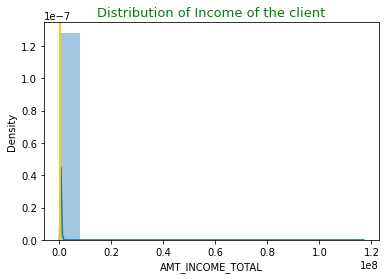

In [91]:
# Plot the histogram of AMT_INCOME_TOTAL variable.

plt.figure(figsize = [6,4])
sns.distplot(data0.AMT_INCOME_TOTAL, bins = 15, hist = True)
plt.axvline(data0.AMT_INCOME_TOTAL.mean(), color = "red")
plt.axvline(data0.AMT_INCOME_TOTAL.median(), color = "yellow")
plt.title("Distribution of Income of the client", fontsize = 13, color = "green")
plt.show()

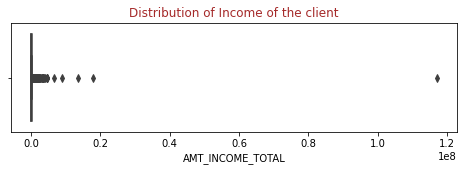

In [92]:
# Plot the boxplot of AMT_INCOME_TOTAL variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.AMT_INCOME_TOTAL)
plt.title("Distribution of Income of the client", fontsize = 12, color = "brown")
plt.show()

In [93]:
# Checking the value of the 99th percentile of AMT_INCOME_TOTAL

data0.AMT_INCOME_TOTAL.quantile(0.99)

472500.0

There is a lot of difference between the 99th percentile (472500.0) and the maximum value (117000000.0)

In [94]:
# Replacing the values in AMT_INCOME_TOTAL that are greater than 99th percentile value to 4800000 for it to 
# not hamper the analysis

data0.loc[data0['AMT_INCOME_TOTAL'] > 472500.0, ['AMT_INCOME_TOTAL']] = 480000.0

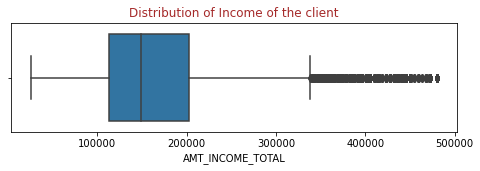

In [95]:
# Plotting the boxplot of AMT_INCOME_TOTAL variable after removing extreme outliers.

plt.figure(figsize = [8,2])
sns.boxplot(data0.AMT_INCOME_TOTAL)
plt.title("Distribution of Income of the client", fontsize = 12, color = "brown")
plt.show()

#### AMT_CREDIT variable

In [96]:
# Describe the AMT_CREDIT variable in data0.

data0.AMT_CREDIT.describe()

count    3.065570e+05
mean     5.996014e+05
std      4.026508e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

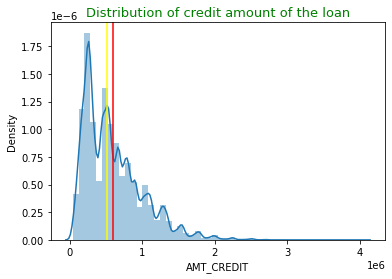

In [97]:
# Plot the histogram of AMT_CREDIT variable.

sns.distplot(data0.AMT_CREDIT)
plt.axvline(data0.AMT_CREDIT.mean(), color = "red")
plt.axvline(data0.AMT_CREDIT.median(), color = "yellow")
plt.title("Distribution of credit amount of the loan", fontsize = 13, color = "green")
plt.show()

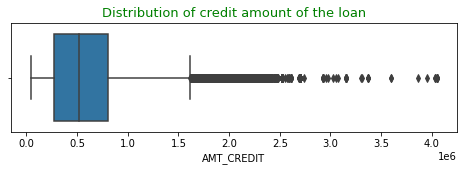

In [98]:
# Plot the boxplot of AMT_CREDIT variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.AMT_CREDIT)
plt.title("Distribution of credit amount of the loan", fontsize = 13, color = "green")
plt.show()

In [99]:
# Checking the value of the 99th percentile of AMT_CREDIT

data0.AMT_CREDIT.quantile(0.99)

1862802.0

There is a lot of difference between the 99th percentile (1862802.0) and the maximum value (4050000.0)

In [100]:
# Replacing the values in AMT_CREDIT that are greater than 99th percentile value to 1870000 for it to 
# not hamper the analysis

data0.loc[data0['AMT_CREDIT'] > 1862802.0, ['AMT_CREDIT']] = 1870000

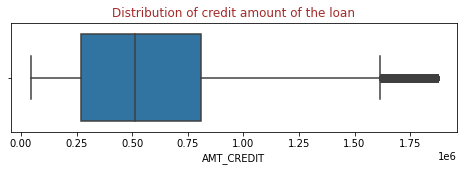

In [101]:
# Plotting the boxplot of AMT_CREDIT variable after removing extreme outliers.

plt.figure(figsize = [8,2])
sns.boxplot(data0.AMT_CREDIT)
plt.title("Distribution of credit amount of the loan", fontsize = 12, color = "brown")
plt.show()

#### AMT_ANNUITY variable

In [102]:
# Describe the AMT_ANNUITY variable in data0.

data0.AMT_ANNUITY.describe()

count    306557.000000
mean      27130.324672
std       14496.210058
min        1615.500000
25%       16564.500000
50%       24930.000000
75%       34609.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

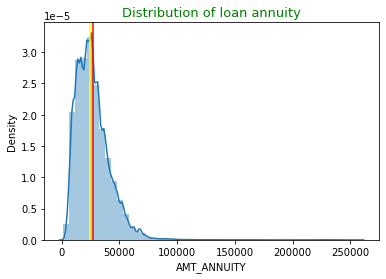

In [103]:
# Plot the histogram of AMT_ANNUITY variable.

sns.distplot(data0.AMT_ANNUITY)
plt.axvline(data0.AMT_ANNUITY.mean(), color = "red")
plt.axvline(data0.AMT_ANNUITY.median(), color = "yellow")
plt.title("Distribution of loan annuity", fontsize = 13, color = "green")
plt.show()

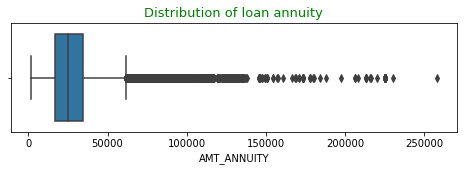

In [104]:
# Plot the boxplot of AMT_ANNUITY variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.AMT_ANNUITY)
plt.title("Distribution of loan annuity", fontsize = 13, color = "green")
plt.show()

In [105]:
# Checking the value of the 99th percentile of AMT_ANNUITY

data0.AMT_ANNUITY.quantile(0.99)

70010.46000000002

There is a lot of difference between the 99th percentile (70010.64) and the maximum value (258025.50)

In [106]:
# Replacing the values in AMT_ANNUITY that are greater than 99th percentile value to 71000 for it to 
# not hamper the analysis

data0.loc[data0['AMT_ANNUITY'] > 70010.65 , ['AMT_ANNUITY']] = 71000

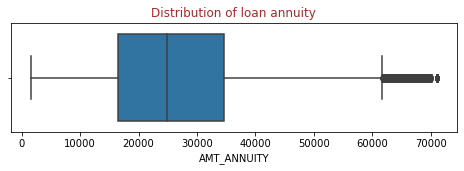

In [107]:
# Plotting the boxplot of AMT_ANNUITY variable after removing extreme outliers.

plt.figure(figsize=[8,2])
sns.boxplot(data0.AMT_ANNUITY)
plt.title("Distribution of loan annuity", fontsize = 12, color = "brown")
plt.show()

#### YEARS_EMPLOYED variable

The handling of outliers of YEARS_EMPLOYED has been handled during the "Fixing of Rows and Columns".

#### EXT_SOURCE_2 variable

In [108]:
# Describe the EXT_SOURCE_2 variable in data0.

data0.EXT_SOURCE_2.describe()

count    3.065570e+05
mean     5.143907e-01
std      1.910708e-01
min      8.173617e-08
25%      3.924366e-01
50%      5.659722e-01
75%      6.636269e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

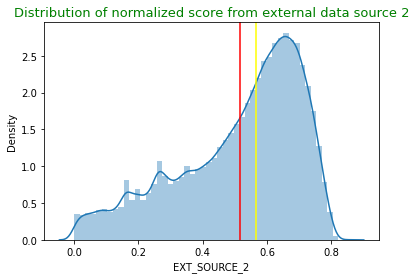

In [109]:
# Plot the histogram of EXT_SOURCE_2 variable.

sns.distplot(data0.EXT_SOURCE_2)
plt.axvline(data0.EXT_SOURCE_2.mean(), color = "red")
plt.axvline(data0.EXT_SOURCE_2.median(), color = "yellow")
plt.title("Distribution of normalized score from external data source 2", fontsize = 13, color = "green")
plt.show()

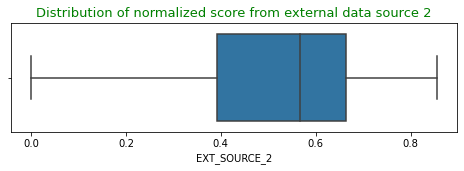

In [110]:
# Plot the boxplot of EXT_SOURCE_2 variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.EXT_SOURCE_2)
plt.title("Distribution of normalized score from external data source 2", fontsize = 13, color = "green")
plt.show()

There are no outliers in EXT_SOURCE_2 variable.

#### DAYS_LAST_PHONE_CHANGE variable

In [111]:
# Describe the DAYS_LAST_PHONE_CHANGE variable in data0.

data0.DAYS_LAST_PHONE_CHANGE.describe()

count    306557.000000
mean        963.173243
std         826.989227
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

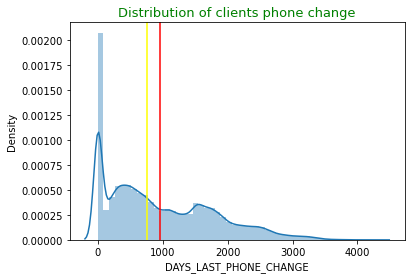

In [112]:
# Plot the histogram of DAYS_LAST_PHONE_CHANGE variable.

sns.distplot(data0.DAYS_LAST_PHONE_CHANGE)
plt.axvline(data0.DAYS_LAST_PHONE_CHANGE.mean(), color = "red")
plt.axvline(data0.DAYS_LAST_PHONE_CHANGE.median(), color = "yellow")
plt.title("Distribution of clients phone change", fontsize = 13, color = "green")
plt.show()

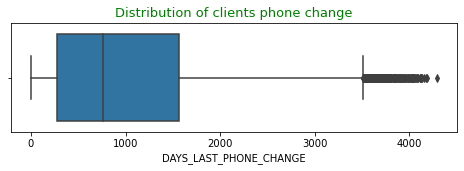

In [113]:
# Plot the boxplot of DAYS_LAST_PHONE_CHANGE variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.DAYS_LAST_PHONE_CHANGE)
plt.title("Distribution of clients phone change", fontsize = 13, color = "green")
plt.show()

In [114]:
# Checking the value of the 99th percentile of DAYS_LAST_PHONE_CHANGE

data0.DAYS_LAST_PHONE_CHANGE.quantile(0.99)

3149.0

In [115]:
len(data0.loc[data0.DAYS_LAST_PHONE_CHANGE > 3149.0])

3062

There are more than 3000 records that are more than the 99th percentile value. Since the 99th percentile value is 3149 and the maximum value is 4292. We can replace the values that are more than 3149.

In [116]:
# Replacing the values in DAYS_LAST_PHONE_CHANGE that are greater than 99th percentile value to 3200.0 for it to 
# not hamper the analysis

data0.loc[data0['DAYS_LAST_PHONE_CHANGE'] > 3149.0 , ['DAYS_LAST_PHONE_CHANGE']] = 3200.0

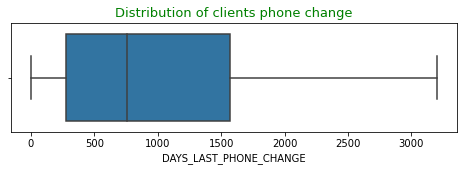

In [117]:
# Plot the boxplot of DAYS_LAST_PHONE_CHANGE variable.

plt.figure(figsize = [8,2])
sns.boxplot(data0.DAYS_LAST_PHONE_CHANGE)
plt.title("Distribution of clients phone change", fontsize = 13, color = "green")
plt.show()

## 2. Data Imbalance on TARGET variable

In [118]:
data0.shape

(306557, 31)

In [119]:
# Getting the percentage of each category in the TARGET value

data0.TARGET.value_counts(normalize = True) * 100

0    91.925808
1     8.074192
Name: TARGET, dtype: float64

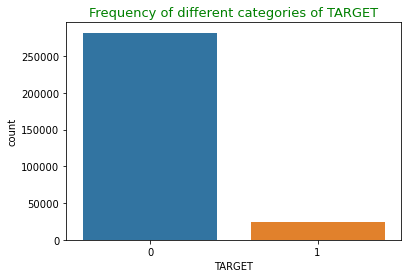

In [120]:
# Plotting the countplot of TARGET categories

sns.countplot(x ='TARGET', data = data0)
plt.title("Frequency of different categories of TARGET", fontsize = 13, color = "Green")
plt.show()

The dataset consists of only 8.07% cases where clients had difficulties in payment. 

Hence we can say that there is a data imbalance here, but this is an expected and real scenario where the bank can not afford to give 50% loan to defaulters.

## 3. Univariate Analysis

### Categorical Unordered Variables

#### NAME_FAMILY_STATUS variable

In [121]:
# Checking the percentage of every category in NAME_FAMILY_STATUS in data0.

data0.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                 63.892522
Single / not married    14.769847
Civil marriage           9.676830
Separated                6.433388
Widow                    5.227413
Name: NAME_FAMILY_STATUS, dtype: float64

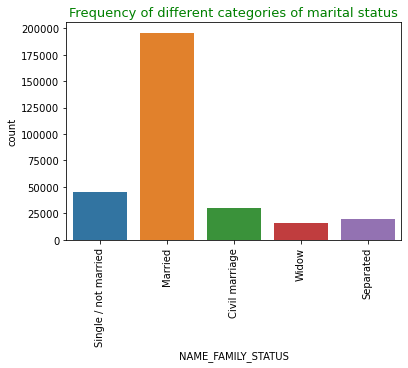

In [122]:
# Plot the countplot of NAME_FAMILY_STATUS categories

sns.countplot(x ='NAME_FAMILY_STATUS', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different categories of marital status", fontsize = 13, color = "Green")
plt.show()

From the countplot above we can conclude that the applicaiton_data dataset has most applicants in Married category (~63% - more than 200000 applicants) followed by Single, Civil Marraige, Separated and Widow.

#### CODE_GENDER variable

In [123]:
# Checking the percentage of every category in CODE_GENDER in data0.

data0.CODE_GENDER.value_counts(normalize = True)*100

Female    65.811252
Male      34.188748
Name: CODE_GENDER, dtype: float64

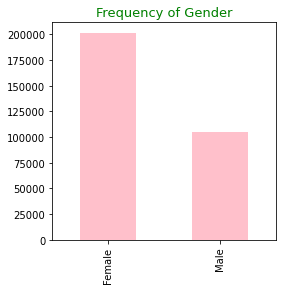

In [124]:
# Plot the barchart of CODE_GENDER categories

plt.figure(figsize=(4,4))
data0.CODE_GENDER.value_counts().plot(kind='bar', color = "pink")
plt.title("Frequency of Gender", fontsize = 13, color = "green")
plt.show()

There were around 200000 females (65.8%) who applied for the loan and slightly more then 100000 (34.1%) males.

#### FLAG_OWN_CAR variable

In [125]:
# Checking the percentage of every category in FLAG_OWN_CAR in data0.

data0.FLAG_OWN_CAR.value_counts(normalize = True)*100

No     65.945974
Yes    34.054026
Name: FLAG_OWN_CAR, dtype: float64

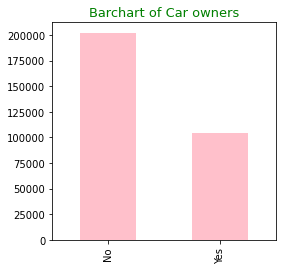

In [126]:
# Plot the countplot of FLAG_OWN_CAR categories

plt.figure(figsize=(4,4))
data0.FLAG_OWN_CAR.value_counts().plot(kind='bar', color = "pink")
plt.title("Barchart of Car owners", fontsize = 13, color = "green")
plt.show()

There are around 200000 applicants who don't own a car and only close to 100000 applicants who do own a car.

#### FLAG_OWN_REALTY variable

In [127]:
# Checking the percentage of every category in FLAG_OWN_REALTY in data0.

data0.FLAG_OWN_REALTY.value_counts(normalize = True)*100

Yes    69.356759
No     30.643241
Name: FLAG_OWN_REALTY, dtype: float64

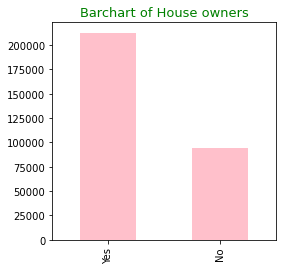

In [128]:
# Plot the countplot of FLAG_OWN_REALTY categories

plt.figure(figsize=(4,4))
data0.FLAG_OWN_REALTY.value_counts().plot(kind='bar', color = "pink")
plt.title("Barchart of House owners", fontsize = 13, color = "green")
plt.show()

Many applicants own a house (more than 200000) and close to 100000 applicants don't own a house.

#### NAME_INCOME_TYPE variable

In [129]:
# Checking the percentage of every category in NAME_INCOME_TYPE in data0.

data0.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 51.626288
Commercial associate    23.299093
Pensioner               18.001220
State servant            7.055458
Unemployed               0.007176
Student                  0.005872
Businessman              0.003262
Maternity leave          0.001631
Name: NAME_INCOME_TYPE, dtype: float64

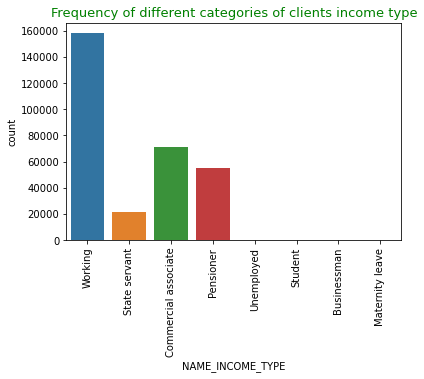

In [130]:
#plot the bar graph of percentage NAME_INCOME_TYPE categories

sns.countplot(x ='NAME_INCOME_TYPE', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different categories of clients income type", fontsize = 13, color = "Green")
plt.show()

Working Professionals are the most who have applied for the loan, foloowed by Commercial associate. Applicants with income types from Maternity Leave, Businessman, Student and Unemployed are among the lowest of who have applied for the loan.

#### NAME_HOUSING_TYPE variable

In [131]:
# Checking the percentage of every category in NAME_HOUSING_TYPE in data0.

data0.NAME_HOUSING_TYPE.value_counts(normalize = True)*100

House / apartment      88.746628
With parents            4.821616
Municipal apartment     3.630320
Rented apartment        1.586654
Office apartment        0.850413
Co-op apartment         0.364369
Name: NAME_HOUSING_TYPE, dtype: float64

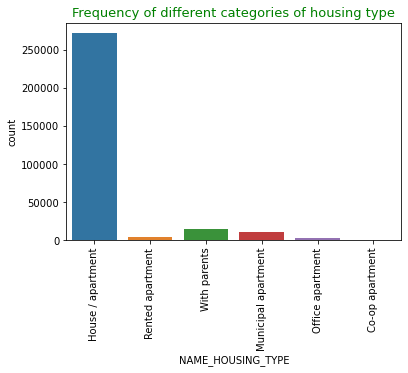

In [132]:
#plot the bar graph of percentage NAME_HOUSING_TYPE categories

sns.countplot(x ='NAME_HOUSING_TYPE', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different categories of housing type", fontsize = 13, color = "Green")
plt.show()

Around 88% applicants have their own house/apartment (more than 250000 people), other categories have very less number of applicants.

#### OCCUPATION_TYPE variable

In [133]:
# Checking the percentage of every category in OCCUPATION_TYPE in data0.

data0.OCCUPATION_TYPE.value_counts(normalize = True)*100

Laborers                 49.294258
Sales staff              10.430360
Core staff                8.963423
Managers                  6.955313
Drivers                   6.054665
High skill tech staff     3.702737
Accountants               3.188966
Medicine staff            2.773709
Security staff            2.185564
Cooking staff             1.932756
Cleaning staff            1.513259
Private service staff     0.862809
Low-skill Laborers        0.680135
Waiters/barmen staff      0.438091
Secretaries               0.425043
Realty agents             0.244327
HR staff                  0.183653
IT staff                  0.170931
Name: OCCUPATION_TYPE, dtype: float64

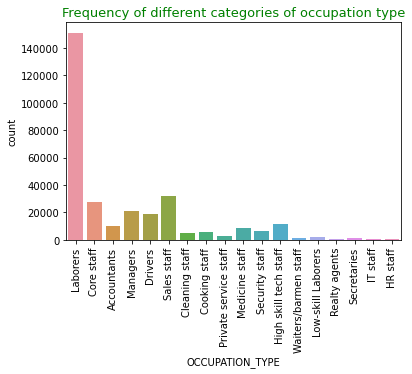

In [134]:
#plot the bar graph of percentage OCCUPATION_TYPE categories

sns.countplot(x ='OCCUPATION_TYPE', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different categories of occupation type", fontsize = 13, color = "Green")
plt.show()

Most of the applicants who have applied for loan come under the laborers category followed by sales staff, core staff. 

#### ORGANIZATION_TYPE variable

In [135]:
# Checking the percentage of every category in ORGANIZATION_TYPE in data0.

data0.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    22.110407
XNA                       18.005461
Self-employed             12.483160
Other                      5.428028
Medicine                   3.639454
Business Entity Type 2     3.433945
Government                 3.381100
School                     2.891795
Trade: type 7              2.548955
Kindergarten               2.239388
Construction               2.186543
Business Entity Type 1     1.946457
Transport: type 4          1.756606
Trade: type 3              1.132579
Industry: type 9           1.096697
Industry: type 3           1.065381
Security                   1.055269
Housing                    0.962627
Industry: type 11          0.880750
Military                   0.856284
Bank                       0.815835
Agriculture                0.797568
Police                     0.760054
Transport: type 2          0.718300
Postal                     0.700685
Security Ministries        0.641969
Trade: type 2              0.615220
Restaurant                 0

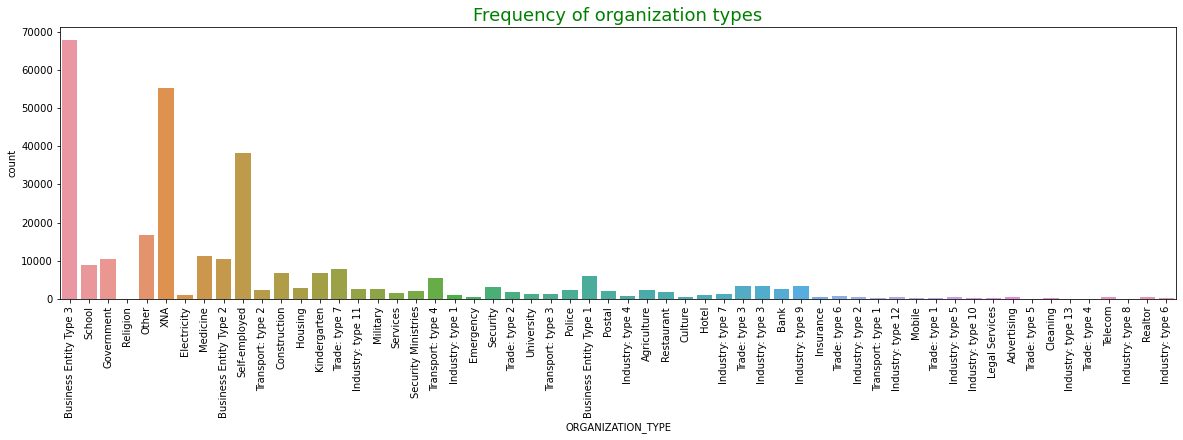

In [136]:
#plot the bar graph of percentage ORGANIZATION_TYPE categories

plt.figure(figsize = (20,5))
sns.countplot(x ='ORGANIZATION_TYPE', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of organization types", fontsize = 18, color = "Green")
plt.show()

Close to 70000 applicants are from Business Entity Type 3 (~22%), being the most. Followed by XNA (not known) and self-employed.

### Categorical Ordered Variables

#### NAME_EDUCATION_TYPE variable

In [137]:
# Checking the percentage of every category in NAME_EDUCATION_TYPE in data0.

data0.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    71.014852
Higher education                 24.351426
Incomplete higher                 3.341304
Lower secondary                   1.238921
Academic degree                   0.053497
Name: NAME_EDUCATION_TYPE, dtype: float64

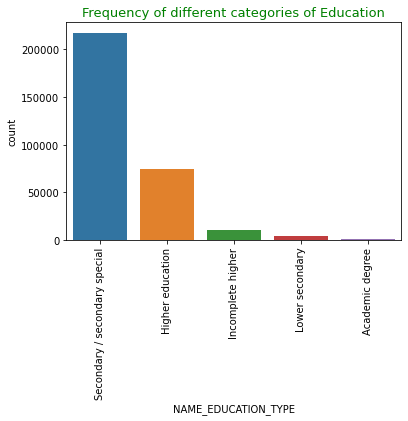

In [138]:
#plot the bar graph of percentage NAME_FAMILY_STATUS categories

sns.countplot(x ='NAME_EDUCATION_TYPE', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different categories of Education", fontsize = 13, color = "Green")
plt.show()

Most applicants are in Secondary/secondary special education (~71% - more than 200000 applicants) followed by Higher education. Applicants with Academic degree are the least to have applied for the loan.

#### AGE_GROUP variable

In [139]:
# Checking the percentage of every category in AGE_GROUP in data0.

data0.AGE_GROUP.value_counts(normalize = True)*100

30-40    26.769573
40-50    24.899122
50-60    22.137482
20-30    14.627622
60+      11.566201
<20       0.000000
Name: AGE_GROUP, dtype: float64

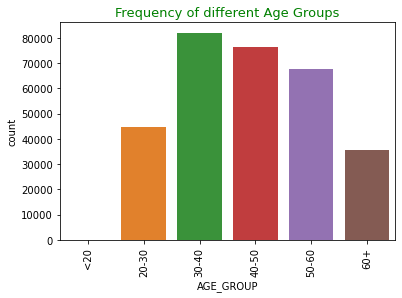

In [140]:
#plot the bar graph of percentage AGE_GROUP categories

sns.countplot(x ='AGE_GROUP', data = data0)
plt.xticks(rotation=90)
plt.title("Frequency of different Age Groups", fontsize = 13, color = "Green")
plt.show()

People in age groups : 30-40, 40-50 and 50-60 are the ones who are most likely to apply for loan. There are 0 applicants below the age group of 20.

### Numerical Univariate Analysis

####  YEARS_EMPLOYED variable

In [141]:
# Describe the YEARS_EMPLOYED in data0.

data0.YEARS_EMPLOYED.describe()

count    251360.000000
mean          6.533472
std           6.407353
min           0.000000
25%           2.101370
50%           4.515068
75%           8.701370
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

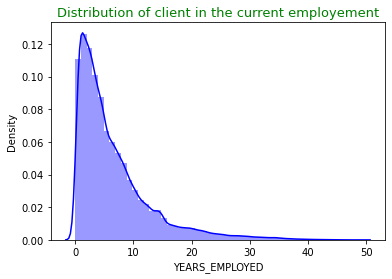

In [142]:
# Plot the distplot of YEARS_EMPLOYED variable.

sns.distplot(data0.YEARS_EMPLOYED, color = "blue")
plt.title("Distribution of client in the current employement", fontsize = 13, color = "Green")
plt.show()

We can see that the density of applicants in the current employement during the application of loan is high for around 2-3 years before applying for the loan.
The density of applicants in the current job for more then 20 years is very minimal.

####  YEARS_REGISTRATION variable

In [143]:
# Describe the YEARS_REGISTRATION in data0.

data0.YEARS_REGISTRATION.describe()

count    306557.000000
mean         13.657810
std           9.650329
min           0.000000
25%           5.504110
50%          12.336986
75%          20.484932
max          67.594521
Name: YEARS_REGISTRATION, dtype: float64

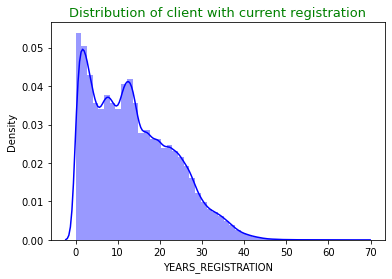

In [144]:
# Plot the distplot of YEARS_REGISTRATION variable.

sns.distplot(data0.YEARS_REGISTRATION, color = "blue")
plt.title("Distribution of client with current registration", fontsize = 13, color = "Green")
plt.show()

The density of clients changing registration is mostly between 0 to 4 years adn also between 11-14 years. The data is slightly skewed towards applicants changing registration few years (~15 years) before loan application. 

####  YEARS_ID_PUBLISH variable

In [145]:
# Describe the YEARS_ID_PUBLISH in data0.

data0.YEARS_ID_PUBLISH.describe()

count    306557.000000
mean          8.204044
std           4.135381
min           0.000000
25%           4.712329
50%           8.917808
75%          11.778082
max          19.717808
Name: YEARS_ID_PUBLISH, dtype: float64

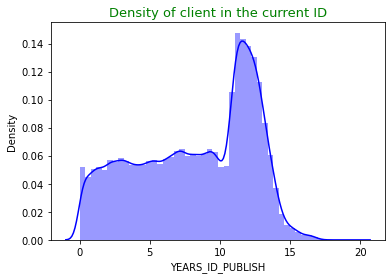

In [146]:
# Plot the distplot of YEARS_ID_PUBLISH variable.

sns.distplot(data0.YEARS_ID_PUBLISH, color = "blue")
plt.title("Density of client in the current ID", fontsize = 13, color = "Green")
plt.show()

Applicants have mostly changed their identity documents 11-14 years before applying for the loan.

#### DAYS_LAST_PHONE_CHANGE variable

In [147]:
# Describe the DAYS_LAST_PHONE_CHANGE in data0.

data0.DAYS_LAST_PHONE_CHANGE.describe()

count    306557.000000
mean        961.718522
std         822.727297
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        3200.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

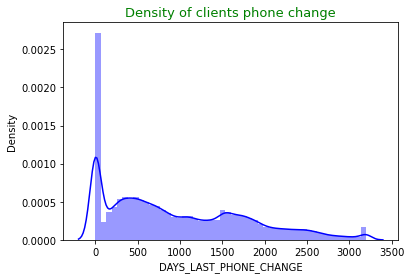

In [148]:
# Plot the distplot of DAYS_LAST_PHONE_CHANGE variable.

sns.distplot(data0.DAYS_LAST_PHONE_CHANGE, color = "blue")
plt.title("Density of clients phone change", fontsize = 13, color = "Green")
plt.show()

Many applicants have changed their phone numbers between 0-100 days of applying for the loan.

####  AMT_INCOME_TOTAL variable

In [149]:
# Describe the AMT_INCOME_TOTAL in data0.

data0.AMT_INCOME_TOTAL.describe()

count    306557.000000
mean     166177.960847
std       83355.147559
min       25650.000000
25%      112500.000000
50%      148500.000000
75%      202500.000000
max      480000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

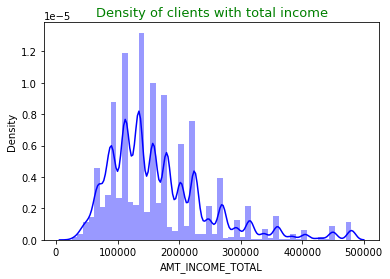

In [150]:
# Plot the distplot of AMT_INCOME_TOTAL variable.

sns.distplot(data0.AMT_INCOME_TOTAL, color = "blue")
plt.title("Density of clients with total income", fontsize = 13, color = "Green")
plt.show()

There are a lot of spikes between the ranges. People with density of income between 100000 to 200000, are more likely to apply for the loan. 

####  AMT_CREDIT variable

In [151]:
# Describe the AMT_CREDIT in data0.

data0.AMT_CREDIT.describe()

count    3.065570e+05
mean     5.968804e+05
std      3.921659e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      1.870000e+06
Name: AMT_CREDIT, dtype: float64

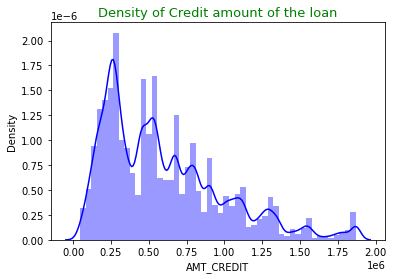

In [152]:
# Plot the distplot of AMT_CREDIT variable.

sns.distplot(data0.AMT_CREDIT, color = "blue")
plt.title("Density of Credit amount of the loan", fontsize = 13, color = "Green")
plt.show()

The highest density of of credit amount on the loan applied by the applicants is between 250000 to 550000. Although there some spikes in other ranges as well.

####  AMT_ANNUITY variable

In [153]:
# Describe the AMT_ANNUITY in data0.

data0.AMT_ANNUITY.describe()

count    306557.000000
mean      26965.732459
std       13703.793097
min        1615.500000
25%       16564.500000
50%       24930.000000
75%       34609.500000
max       71000.000000
Name: AMT_ANNUITY, dtype: float64

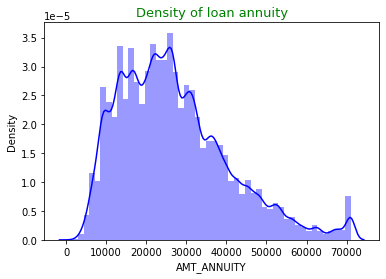

In [154]:
# Plot the distplot of AMT_ANNUITY variable.

sns.distplot(data0.AMT_ANNUITY, color = "blue")
plt.title("Density of loan annuity", fontsize = 13, color = "Green")
plt.show()

The high density of loan annuity lies between 20000 to 30000. Though all the values seem to have a pretty high density.

####  AMT_GOODS_PRICE variable

In [155]:
# Describe the AMT_GOODS_PRICE in data0.

data0.AMT_GOODS_PRICE.describe()

count    3.065570e+05
mean     5.386711e+05
std      3.695742e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

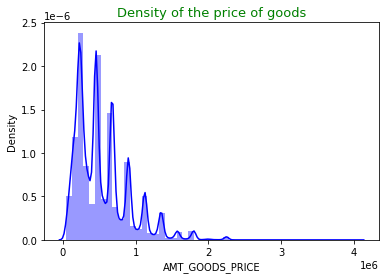

In [156]:
# Plot the distplot of AMT_GOODS_PRICE variable.

sns.distplot(data0.AMT_GOODS_PRICE, color = "blue")
plt.title("Density of the price of goods", fontsize = 13, color = "Green")
plt.show()

The price of goods with most density are below 1000000. 

####  CNT_CHILDREN variable

In [157]:
# Describe the CNT_CHILDREN in data0.

data0.CNT_CHILDREN.describe()

count    306557.000000
mean          0.416953
std           0.722077
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

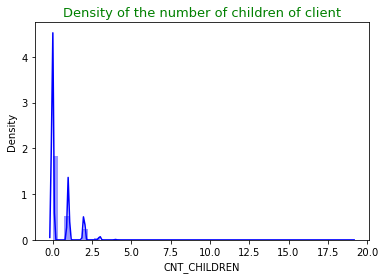

In [158]:
# Plot the distplot of CNT_CHILDREN variable.

sns.distplot(data0.CNT_CHILDREN, color = "blue")
plt.title("Density of the number of children of client", fontsize = 13, color = "Green")
plt.show()

There are a huge number of client with 0 number of children, followed by mostl people below 4 children. So we can conclude that there are less number of people who are financially dependent on the applicants.

#### AGE_IN_YEARS variable

In [159]:
# Describe the AGE_IN_YEARS in data0.

data0.AGE_IN_YEARS.describe()

count    306557.000000
mean         43.938985
std          11.954144
min          20.517808
25%          34.010959
50%          43.153425
75%          53.920548
max          69.120548
Name: AGE_IN_YEARS, dtype: float64

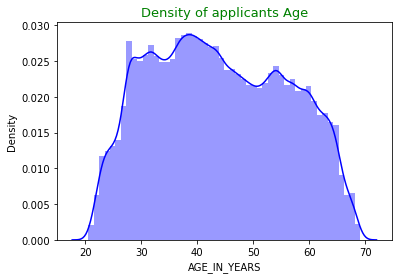

In [160]:
# Plot the distplot of AGE_IN_YEARS variable.

sns.distplot(data0.AGE_IN_YEARS, color = "blue")
plt.title("Density of applicants Age", fontsize = 13, color = "Green")
plt.show()

Most likely people between the ages of 27 to 40 are to apply for loan.

#### EXT_SOURCE_2 variable

In [161]:
# Describe the EXT_SOURCE_2 in data0.

data0.EXT_SOURCE_2.describe()

count    3.065570e+05
mean     5.143907e-01
std      1.910708e-01
min      8.173617e-08
25%      3.924366e-01
50%      5.659722e-01
75%      6.636269e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

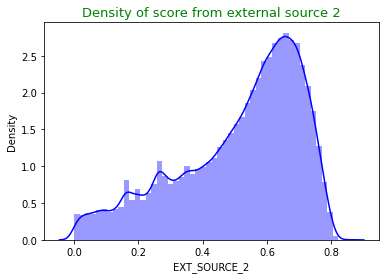

In [162]:
# Plot the distplot of EXT_SOURCE_2 variable.

sns.distplot(data0.EXT_SOURCE_2, color = "blue")
plt.title("Density of score from external source 2", fontsize = 13, color = "Green")
plt.show()

Most of the scores of the applicants are between 0.55 to 7.5, this shows that more the score of the applicant less is the payment difficulty of loan repayment.

## 4. Bivariate Analysis

### Categorical Analysis

TARGET : 1 - Client with payment difficulties, 0 - All other cases

#### CODE_GENDER vs TARGET

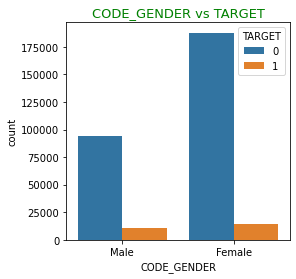

In [163]:
# Plot a countplot on CODE_GENDER with respect to TARGET variable.

plt.figure(figsize = (4,4))
sns.countplot(data = data0, x = "CODE_GENDER", hue = "TARGET")
plt.title("CODE_GENDER vs TARGET", fontsize = 13, color = "Green")   
plt.show()

From the above plot we can see that the number of females having payment difficulties is more than male applicants. But, when we take the propotion of number of males applying for loan and repaying on time vs number of females applying for loan and repaying on time, we can safely conclude that males face more payment difficulties.

#### FLAG_OWN_CAR vs TARGET

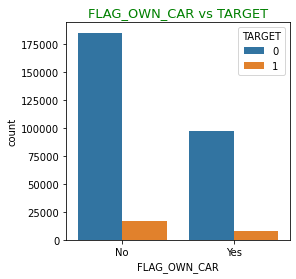

In [164]:
# Plot a countplot on FLAG_OWN_CAR with respect to TARGET variable.

plt.figure(figsize = (4,4))
sns.countplot(data = data0, x = "FLAG_OWN_CAR", hue = "TARGET")
plt.title("FLAG_OWN_CAR vs TARGET", fontsize = 13, color = "Green")   
plt.show()

The applicants who do not own a car face more difficulty while payment.

#### FLAG_OWN_REALTY vs TARGET

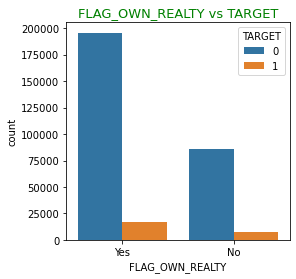

In [165]:
# Plot a countplot on FLAG_OWN_REALTY with respect to TARGET variable.

plt.figure(figsize = (4,4))
sns.countplot(data = data0, x = "FLAG_OWN_REALTY", hue = "TARGET")
plt.title("FLAG_OWN_REALTY vs TARGET", fontsize = 13, color = "Green")   
plt.show()

From the above plot we can see that the number of applicants who own a property are having payment difficulties more than applicants who do not own a property. But, when we take the propotion of the applicants who do not own a house/property face more difficulty while payment.

#### NAME_INCOME_TYPE vs TARGET

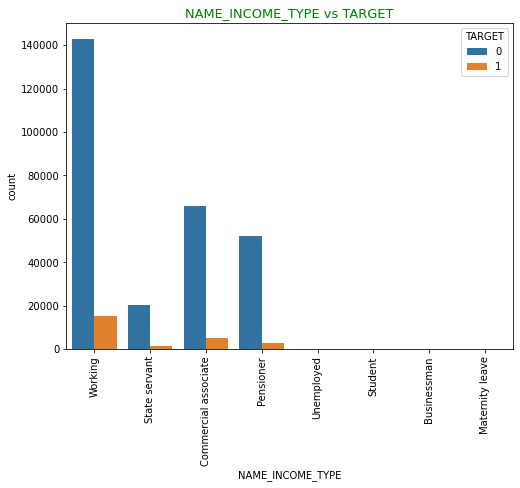

In [166]:
# Plot a countplot on NAME_INCOME_TYPE with respect to TARGET variable.

plt.figure(figsize = (8,6))
sns.countplot(data = data0, x = "NAME_INCOME_TYPE", hue = "TARGET")
plt.title("NAME_INCOME_TYPE vs TARGET", fontsize = 13, color = "Green")   
plt.xticks(rotation = 90)
plt.show()

The working professionals are the ones to more likely apply for the loan and also are the ones to have payment difficulties. But while looking at the propotions of all the categories of income, We can say that state servants though are not liekly to apply for loan often are also a key component when coming to payment difficulties. 

The Unemployed, Students, Businessman and people on Maternity leave are less likely to apply for loan as well as have payment difficulties.

#### NAME_EDUCATION_TYPE vs TARGET

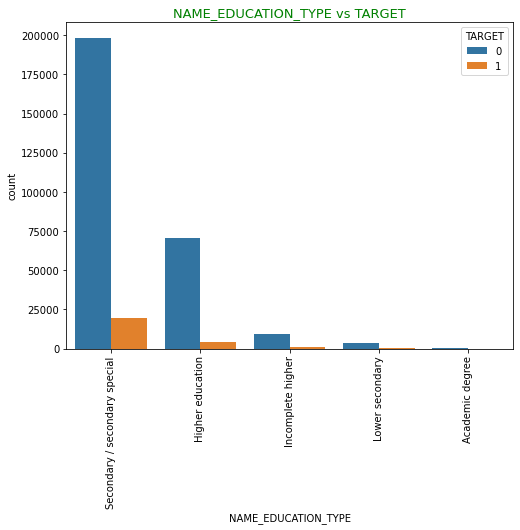

In [167]:
# Plot a countplot on NAME_EDUCATION_TYPE with respect to TARGET variable.

plt.figure(figsize = (8,6))
sns.countplot(data = data0, x = "NAME_EDUCATION_TYPE", hue = "TARGET")
plt.title("NAME_EDUCATION_TYPE vs TARGET", fontsize = 13, color = "Green")  
plt.xticks(rotation = 90)
plt.show()

The applicants with Secondary/secondary special education are more likely to apply for loans and also more like to have payment difficulties. The applicants with Academic degree as education are very less and are not likely to have any payment difficulties.

#### NAME_FAMILY_STATUS vs TARGET

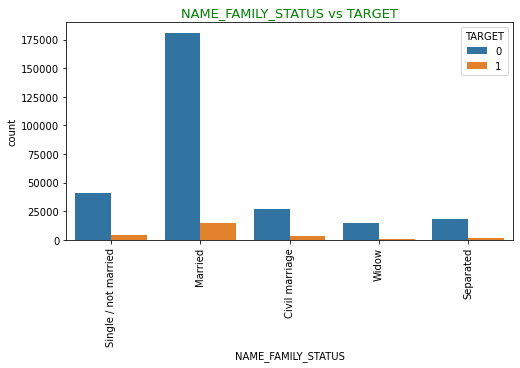

In [168]:
# Plot a countplot on NAME_FAMILY_STATUS with respect to TARGET variable.

plt.figure(figsize = (8,4))
sns.countplot(data = data0, x = "NAME_FAMILY_STATUS", hue = "TARGET")
plt.title("NAME_FAMILY_STATUS vs TARGET", fontsize = 13, color = "Green")   
plt.xticks(rotation = 90)
plt.show()

The married applicants are most to be applying for loans and are also the ones facing difficulties while repayment followed by Single/not married applicants.

#### NAME_HOUSING_TYPE vs TARGET

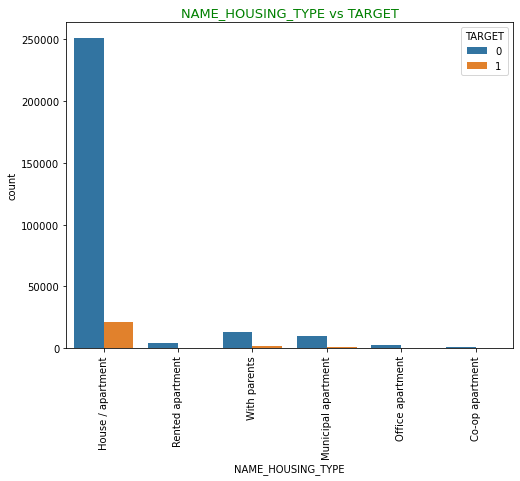

In [169]:
# Plot a countplot on NAME_HOUSING_TYPE with respect to TARGET variable.

plt.figure(figsize = (8,6))
sns.countplot(data = data0, x = "NAME_HOUSING_TYPE", hue = "TARGET")
plt.title("NAME_HOUSING_TYPE vs TARGET", fontsize = 13, color = "Green")   
plt.xticks(rotation = 90)
plt.show()

The applicants who have a own House/apartment are most likely to apply for a loan and also are the ones who have more difficutlies while repayment of it. Applicants with Rented apartment, Office apartment and Co-op apartment hardly have any payment difficulties.

#### OCCUPATION_TYPE vs TARGET

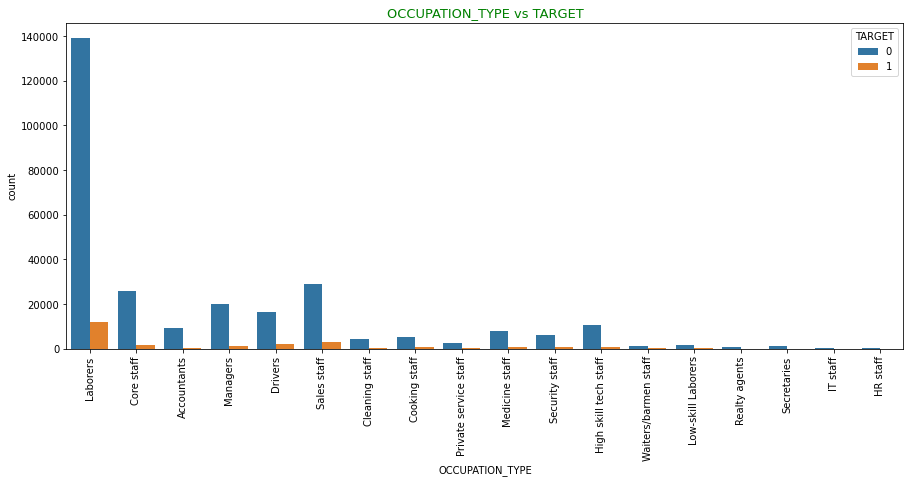

In [170]:
# Plot a countplot on OCCUPATION_TYPE with respect to TARGET variable.

plt.figure(figsize = (15,6))
sns.countplot(data = data0, x = "OCCUPATION_TYPE", hue = "TARGET")
plt.title("OCCUPATION_TYPE vs TARGET", fontsize = 13, color = "Green")  
plt.xticks(rotation = 90)
plt.show()

The applicants who are laborers are the most to apply for loans and also the ones who face difficutlies while repaying, followed by Sales staff. The applicants who are Secretaris, IT staff, HR staff are least liekly to apply for loans also have less to no payment difficulties.

#### ORGANIZATION_TYPE vs TARGET

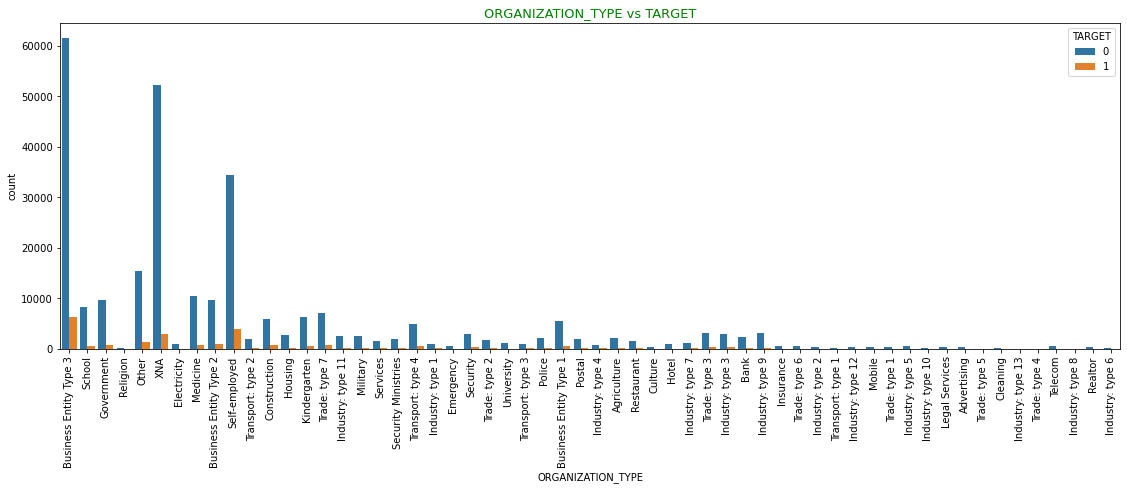

In [171]:
# Plot a countplot on ORGANIZATION_TYPE with respect to TARGET variable.

plt.figure(figsize = (19,6))
sns.countplot(data = data0, x = "ORGANIZATION_TYPE", hue = "TARGET")
plt.title("ORGANIZATION_TYPE vs TARGET", fontsize = 13, color = "Green")   
plt.xticks(rotation = 90)
plt.show()

The applicants in Business Entity 3 are more likely to apply for a loan and are also likely to have more payment difficulties, followed by Self-employed. The applicants from Trade type 5, Industry type 13, Trade type 4 and Industry type 8 are less likely to apply for the loan as well as have payment difficulties.

#### AGE_GROUP vs TARGET

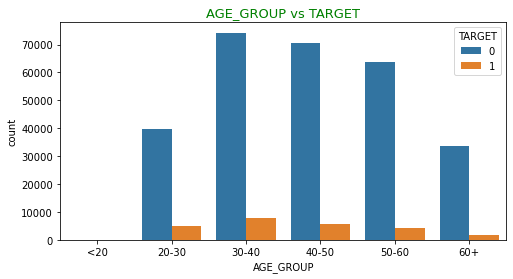

In [172]:
# Plot a countplot on AGE_GROUP with respect to TARGET variable.

plt.figure(figsize = (8,4))
sns.countplot(data = data0, x = "AGE_GROUP", hue = "TARGET")
plt.title("AGE_GROUP vs TARGET", fontsize = 13, color = "Green")   
plt.show()

Most of the applicants are from age group 30-40 years and are also the ones who have more payment difficulties. The applicants above 60+ years of age are least likely to apply and also are least likely to have difficulties in repayment.

### Numerical Analysis

TARGET : 1 - Client with payment difficulties, 0 - All other cases

In [173]:
# Creating cols with numeric variables for plotting

cols = data0[["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
              "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"]]
cols.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       1             0          202500.0    406597.5      24700.5   
1       0             0          270000.0   1293502.5      35698.5   
2       0             0           67500.0    135000.0       6750.0   
3       0             0          135000.0    312682.5      29686.5   
4       0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  
0         351000.0                1                  1134.0  
1        1129500.0                2                   828.0  
2         135000.0                1                   815.0  
3         297000.0                2                   617.0  
4         513000.0                1                  1106.0

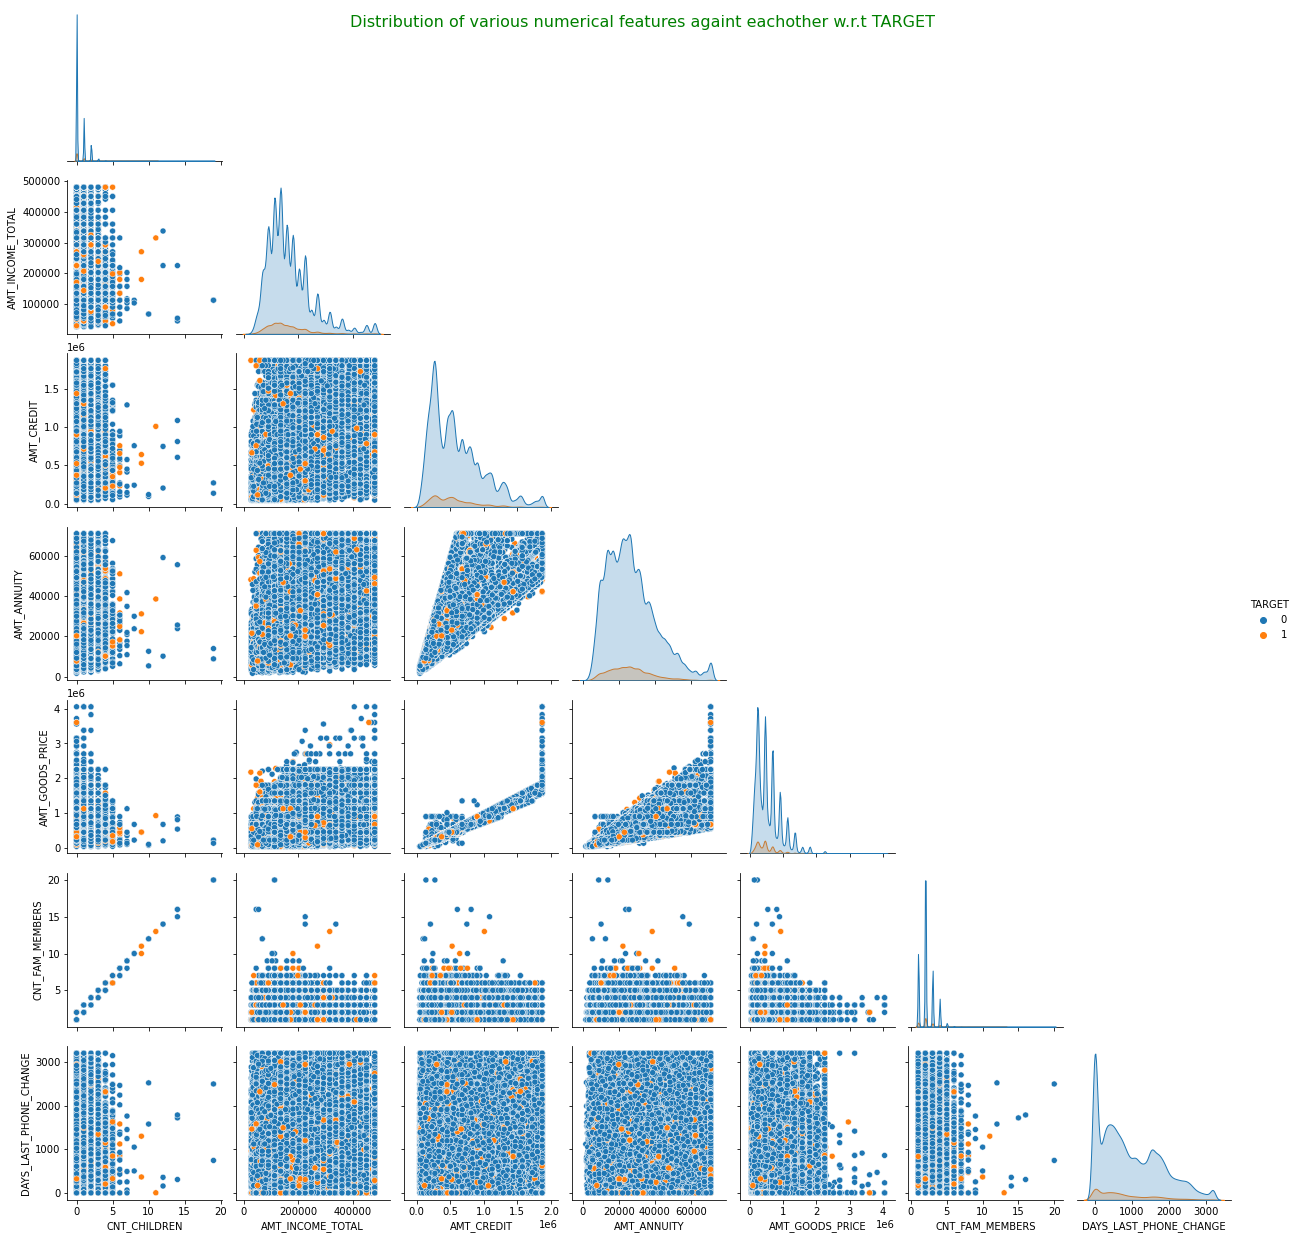

In [174]:
# Plotting a paitplot for the above variables

plot = sns.pairplot(data0[["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", 
              "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"]], hue = "TARGET", corner = True)
plot.fig.suptitle("Distribution of various numerical features againt eachother w.r.t TARGET", fontsize = 16, color = "Green")
plt.show()

Observations from the above graphs: 

    1. We can clearly see that, as the count of children increase there are payment difficulties, does not matter the amount of credit, loan annuity, the goods price and total income of the applicant.
    2. We can see that when the income of the applicant is less and the goods price is more the client has a difficulty in payment. Amount of income does not have affect the loan annuity or the loan credit for the applicant.
    3. We can see that as goods price incresess the amount of credit applied by the applicant also increases. We can see that while the credit amount is high applicants have a difficulty with payment.
    4. Also when amount credit increses there is also an increase in the loan annuity and with that increse applicants tend to have difficulty is payment.
    5. As price of goods increases, price of annuity also increases and so does the difficulty in repayment.
    6. We can see that as goods price increases the number of days last phone number was changed slightly decreases. As goods price increases we saw the loan credit was more, so we can say that if the phone numbers were not changed in the recent few years the probability of client paying the loan amount would be on time.
    7. We can also see that as goods price increases number of family members decreases and also there is a decrease in clients with payment difficulties.

## 5. Multivariate Analysis

#### NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET

In [175]:
# Creating a pivot table between education and martial status with values of TARGET

result = pd.pivot_table(data=data0, index="NAME_EDUCATION_TYPE", columns="NAME_FAMILY_STATUS", values="TARGET")
result

NAME_FAMILY_STATUS             Civil marriage   Married  Separated  \
NAME_EDUCATION_TYPE                                                  
Academic degree                      0.000000  0.018868   0.000000   
Higher education                     0.066206  0.049636   0.057448   
Incomplete higher                    0.093124  0.078957   0.085145   
Lower secondary                      0.137255  0.102928   0.138889   
Secondary / secondary special        0.108317  0.084148   0.090065   

NAME_FAMILY_STATUS             Single / not married     Widow  
NAME_EDUCATION_TYPE                                            
Academic degree                            0.034483  0.000000  
Higher education                           0.061953  0.047412  
Incomplete higher                          0.094551  0.063584  
Lower secondary                            0.133449  0.065693  
Secondary / secondary special              0.113315  0.059831

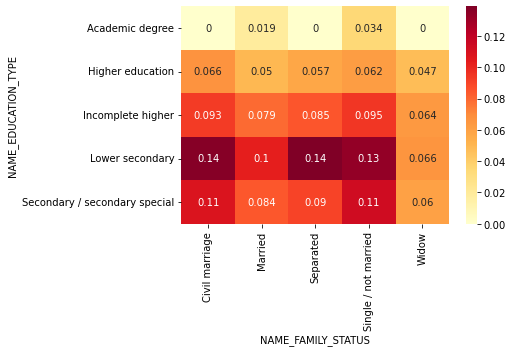

In [176]:
#create heat map of NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET

sns.heatmap(result, annot= True, cmap="YlOrRd")
plt.show()

The applicants who are Lower secondary educated and family status beloging to Civil amrriage, Separated or Single/not married are most likely to have payment difficulties. Irrespective of the family status, if the applicant is Lower scondary educated he/she is more likely to have payment difficulties, followed by Secondary/secondary special educated applicants and Incomplete higher education.

The applicants with Academic degree with any family status are very less likely to have any payment difficulties.

#### NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs TARGET

In [177]:
# Creating a pivot table between job and martial status with values of TARGET

result1 = pd.pivot_table(data=data0, index="NAME_INCOME_TYPE", columns="NAME_FAMILY_STATUS", values="TARGET")
result1

NAME_FAMILY_STATUS    Civil marriage   Married  Separated  \
NAME_INCOME_TYPE                                            
Businessman                 0.000000  0.000000        NaN   
Commercial associate        0.088568  0.069209   0.073494   
Maternity leave                  NaN  0.400000        NaN   
Pensioner                   0.063078  0.050959   0.060340   
State servant               0.075775  0.054180   0.054572   
Student                     0.000000  0.000000   0.000000   
Unemployed                  0.000000  0.600000   0.000000   
Working                     0.114833  0.089244   0.097706   

NAME_FAMILY_STATUS    Single / not married     Widow  
NAME_INCOME_TYPE                                      
Businessman                       0.000000       NaN  
Commercial associate              0.090447  0.055249  
Maternity leave                        NaN       NaN  
Pensioner                         0.055246  0.056978  
State servant                     0.067797  0.050215  
Student                           0.000000       NaN  
Unemployed                        0.200000  0.333333  
Working                           0.116297  0.063088

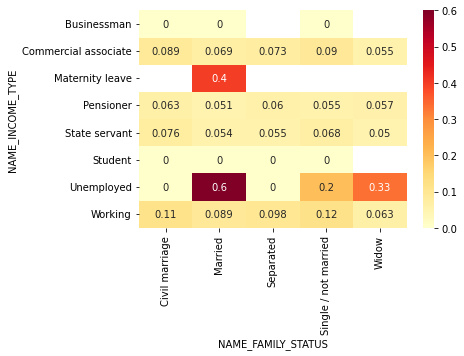

In [178]:
#create heat map of NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs TARGET

sns.heatmap(result1, annot= True, cmap="YlOrRd")
plt.show()

Married and unemployed applicants are mostly likely to have payment difficulties followed by Married and employees on maternity leave.  

Applicants who are Businessman, Students are not likely to have any payment difficulties.

#### NAME_EDUCATION_TYPE vs OCCUPATION_TYPE vs TARGET

In [179]:
# Creating a pivot table between OCCUPATION_TYPE and NAME_EDUCATION_TYPE with values of TARGET

result2 = pd.pivot_table(data=data0, index="OCCUPATION_TYPE", columns="NAME_EDUCATION_TYPE", values="TARGET")
result2

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  \
OCCUPATION_TYPE                                                               
Accountants                   0.125000          0.038788           0.056561   
Cleaning staff                0.000000          0.084677           0.102041   
Cooking staff                 0.000000          0.088993           0.093220   
Core staff                    0.000000          0.045804           0.082990   
Drivers                       0.000000          0.083170           0.103870   
HR staff                           NaN          0.044818           0.083333   
High skill tech staff         0.000000          0.047322           0.070326   
IT staff                           NaN          0.050000           0.038462   
Laborers                      0.015152          0.055270           0.080416   
Low-skill Laborers            0.000000          0.098765           0.200000   
Managers                      0.000000          0.048026           0.080645   
Medicine staff                     NaN          0.042381           0.020690   
Private service staff         0.000000          0.065511           0.043860   
Realty agents                 0.000000          0.044053           0.191489   
Sales staff                   0.111111          0.075632           0.103283   
Secretaries                        NaN          0.062370           0.114583   
Security staff                0.000000          0.080783           0.154839   
Waiters/barmen staff               NaN          0.089888           0.096774   

NAME_EDUCATION_TYPE    Lower secondary  Secondary / secondary special  
OCCUPATION_TYPE                                                        
Accountants                   0.166667                       0.061987  
Cleaning staff                0.138889                       0.095936  
Cooking staff                 0.174603                       0.105530  
Core staff                    0.105691                       0.078743  
Drivers                       0.128514                       0.117360  
HR staff                           NaN                       0.100000  
High skill tech staff         0.133333                       0.071311  
IT staff                      0.000000                       0.114504  
Laborers                      0.099391                       0.085244  
Low-skill Laborers            0.175824                       0.174814  
Managers                      0.089286                       0.078745  
Medicine staff                0.116883                       0.070645  
Private service staff         0.000000                       0.067534  
Realty agents                 0.000000                       0.084746  
Sales staff                   0.137778                       0.099964  
Secretaries                   0.000000                       0.070637  
Security staff                0.144330                       0.109472  
Waiters/barmen staff          0.058824                       0.119431

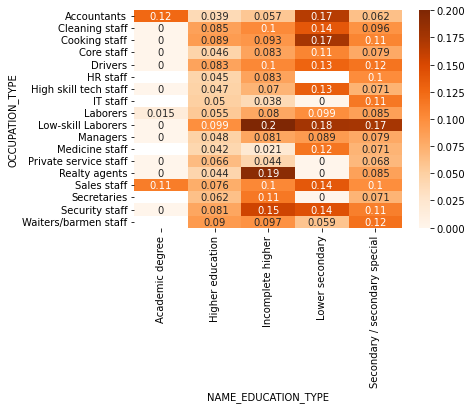

In [180]:
#create heat map of NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs TARGET

plt.figure(figsize = (6,4))
sns.heatmap(result2, annot= True, cmap="Oranges")
plt.show()

The applicants with occupation as Low-skill laborers irrespective of the their education (except Academic degree holders) and Realty agents with Incomplete higher education are more likely to have payment difficulties. Followed by Accountants, Cleaning staff, Cooking staff, Sales staff, Security staff with Lower secondary education are also likely to have payment difficulties.

Applicants with Academic degree with any occupation type are not likely to have any payment difficulties, except for Accountants and Sales staff.

## 6. Correlation between TARGET (0 and 1) and other variables

TARGET : 1 - Client with payment difficulties, 0 - All other cases

Segmenting the DataFrame into 2 datasets w.r.t target variable:
        
        1. For clients with payment difficuilty TARGET = 1, data_target1
        2. For all other cases TARGET = 0, data_target0

In [181]:
# Removing TARGET and SK_ID_CURR from the dataset before segmenting them into 2 datasets

data = data0.drop(columns = ['SK_ID_CURR', 'TARGET'], axis=1)

In [182]:
data_target1 = data[data0.TARGET == 1]
data_target1.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0         Male           No             Yes             0          202500.0   
26      Female           No             Yes             0          112500.0   
40        Male           No             Yes             0          202500.0   
42      Female           No              No             0          135000.0   
81      Female           No             Yes             0           81000.0   

    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0     406597.5      24700.5         351000.0               Working   
26    979992.0      27076.5         702000.0               Working   
40   1193580.0      35028.0         855000.0  Commercial associate   
42    288873.0      16258.5         238500.0               Working   
81    252000.0      14593.5         252000.0             Pensioner   

              NAME_EDUCATION_TYPE  ... LIVE_CITY_NOT_WORK_CITY  \
0   Secondary / secondary special  ...                       0   
26  Secondary / secondary special  ...                       0   
40  Secondary / secondary special  ...                       0   
42  Secondary / secondary special  ...                       0   
81  Secondary / secondary special  ...                       0   

         ORGANIZATION_TYPE EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0   Business Entity Type 3     0.262949      0.139376                  1134.0   
26  Business Entity Type 3     0.548477      0.190706                   161.0   
40  Business Entity Type 3     0.306841      0.320163                  1075.0   
42           Self-employed     0.674203      0.399676                  1480.0   
81                     XNA     0.023952      0.720944                     0.0   

    AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0      25.920548      20-30        1.745205            9.994521   
26     51.298630      50-60        7.200000           18.008219   
40     47.895890      40-50        3.457534            3.238356   
42     36.668493      30-40        9.854795            0.123288   
81     67.928767        60+             NaN           14.769863   

    YEARS_ID_PUBLISH  
0           5.808219  
26          5.005479  
40          2.819178  
42         12.079452  
81         11.504110  

[5 rows x 29 columns]

In [183]:
data_target0 = data[data0.TARGET == 0]
data_target0.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
1      Female           No              No             0          270000.0   
2        Male          Yes             Yes             0           67500.0   
3      Female           No             Yes             0          135000.0   
4        Male           No             Yes             0          121500.0   
5        Male           No             Yes             0           99000.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
1   1293502.5      35698.5        1129500.0    State servant   
2    135000.0       6750.0         135000.0          Working   
3    312682.5      29686.5         297000.0          Working   
4    513000.0      21865.5         513000.0          Working   
5    490495.5      27517.5         454500.0    State servant   

             NAME_EDUCATION_TYPE  ... LIVE_CITY_NOT_WORK_CITY  \
1               Higher education  ...                       0   
2  Secondary / secondary special  ...                       0   
3  Secondary / secondary special  ...                       0   
4  Secondary / secondary special  ...                       1   
5  Secondary / secondary special  ...                       0   

        ORGANIZATION_TYPE EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
1                  School     0.622246           NaN                   828.0   
2              Government     0.555912      0.729567                   815.0   
3  Business Entity Type 3     0.650442           NaN                   617.0   
4                Religion     0.322738           NaN                  1106.0   
5                   Other     0.354225      0.621226                  2536.0   

   AGE_IN_YEARS  AGE_GROUP  YEARS_EMPLOYED  YEARS_REGISTRATION  \
1     45.931507      40-50        3.254795            3.249315   
2     52.180822      50-60        0.616438           11.671233   
3     52.068493      50-60        8.326027           26.939726   
4     54.608219      50-60        8.323288           11.810959   
5     46.413699      40-50        4.350685           13.616438   

   YEARS_ID_PUBLISH  
1          0.797260  
2          6.934247  
3          6.676712  
4          9.473973  
5          1.306849  

[5 rows x 29 columns]

#### Checking correlation for TARGET = 1, clients with payment difficulties

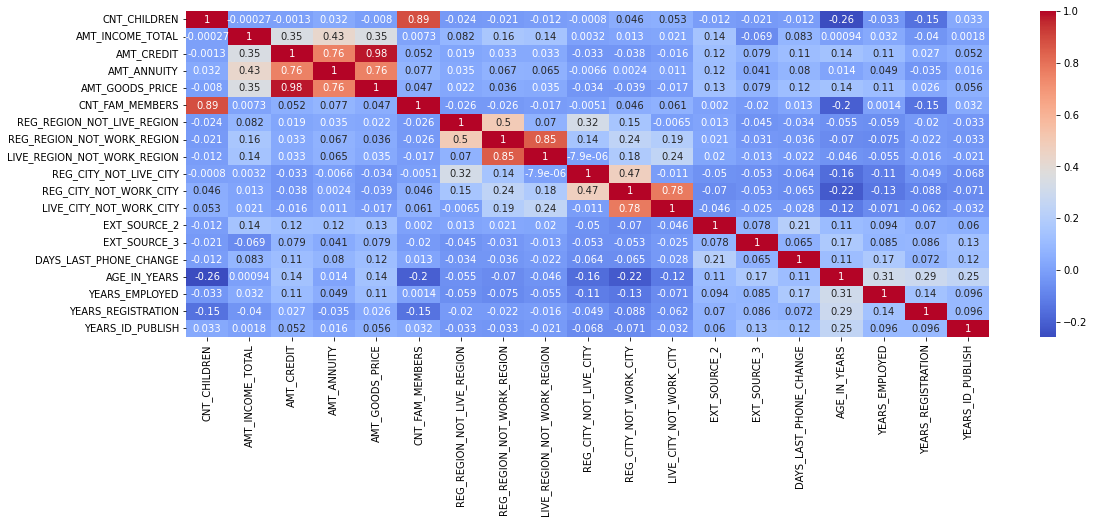

In [184]:
# Plotting heatmap to get correlation for Target = 1

plt.figure(figsize = (18,6))
sns.heatmap(data_target1.corr(), annot = True,cmap= "coolwarm")
plt.show()

In [185]:
# Fetching the TOP 10 correlation for TARGET = 1 (clients with payment difficulties)
# Printing the top 20 values as combinations will be repeated.

print("TOP 10 Correlation for clients with payment difficulties : \n\n")
print(data_target1.corr()[data_target1.corr() != 1].unstack().sort_values(ascending = False).head(20))

TOP 10 Correlation for clients with payment difficulties : 


AMT_GOODS_PRICE              AMT_CREDIT                     0.979706
AMT_CREDIT                   AMT_GOODS_PRICE                0.979706
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885467
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885467
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.848076
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.848076
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778422
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778422
AMT_CREDIT                   AMT_ANNUITY                    0.757339
AMT_ANNUITY                  AMT_CREDIT                     0.757339
AMT_GOODS_PRICE              AMT_ANNUITY                    0.755752
AMT_ANNUITY                  AMT_GOODS_PRICE                0.755752
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.497581
REG_REGION_NOT_LIVE_REGION   REG_REGION_N

#### Checking correlation for TARGET = 0, all other cases

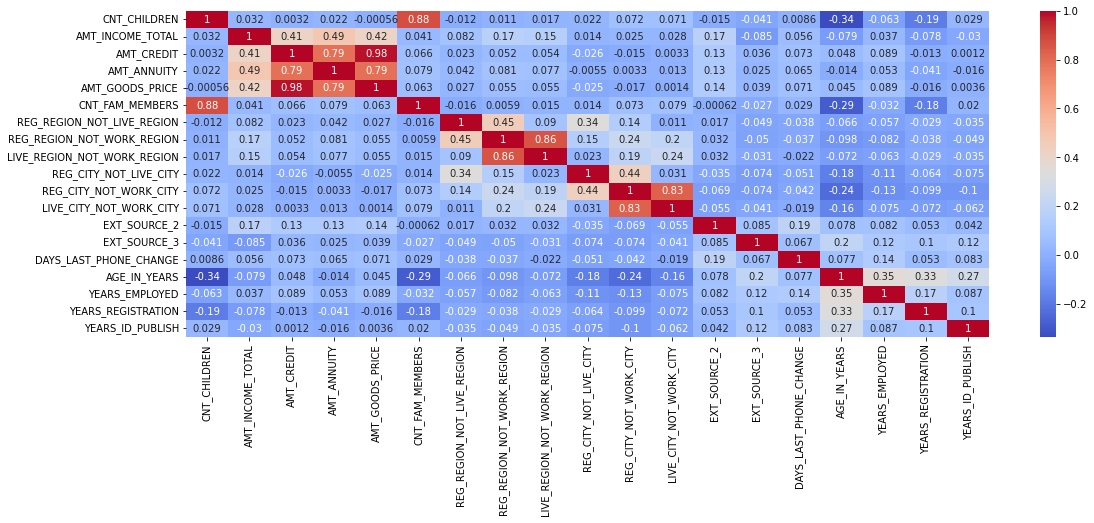

In [186]:
# Plotting heatmap to get correlation for Target = 0

plt.figure(figsize = (18,6))
sns.heatmap(data_target0.corr(), annot = True,cmap= "coolwarm")
plt.show()

In [187]:
# Fetching the TOP 10 correlation for TARGET = 0 (all other cases)
# Printing the top 20 values as combinations will be repeated.

print("TOP 10 Correlation for all other cases (non-defaulters) : \n\n")
print(abs(data_target0.corr())[abs(data_target0.corr()) != 1].unstack().sort_values(ascending = False).head(20))

TOP 10 Correlation for all other cases (non-defaulters) : 


AMT_GOODS_PRICE              AMT_CREDIT                     0.982311
AMT_CREDIT                   AMT_GOODS_PRICE                0.982311
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878584
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878584
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861767
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861767
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830362
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830362
AMT_GOODS_PRICE              AMT_ANNUITY                    0.790200
AMT_ANNUITY                  AMT_GOODS_PRICE                0.790200
AMT_CREDIT                   AMT_ANNUITY                    0.789254
AMT_ANNUITY                  AMT_CREDIT                     0.789254
                             AMT_INCOME_TOTAL               0.488028
AMT_INCOME_TOTAL             AMT_ANNUITY  

Conclusions from the correlations of both the segmented data : 
    
Almost all the features in the correlation pair are same for both defaulters and non-defaulter. There can be some observations made.

    1. The relation between the region of registration is not work region (REG_REGION_NOT_WORK_REGION) and region of registration is not live region (REG_REGION_NOT_LIVE_REGION) is higher for defaulters compared to non-defaulters. 
    2. The relation between amount credit and loan annuity is more correlated for defaulters. 
    3. Goods price and loan annuity is also highly correlated for defaulters compared to non-defaulters.
    4. For defaulters, there also seems to be a very less linear relationship between total income and loan annuity.

# Analysis on previous_application.csv

#### Read in the dataset

In [188]:
# Importing the dataset of "previous_application" in data1

data1 = pd.read_csv("previous_application.csv", header = 0)
data1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## 1. Data Understanding and Analysis

In [189]:
# Checking the shape of data1

data1.shape

(1670214, 37)

In [190]:
# printing the information of variables in data1 (previous_application) to check their data types.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [191]:
categorical_cols_data1 = ["NAME_CONTRACT_TYPE", "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY", "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

In [192]:
for c in categorical_cols_data1 : 
    print(data1[c].value_counts())
    print("-"*40)
    print(data1[c].value_counts(normalize=True)*100)
    print("="*40)

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home 

Insights from the categorical columns in data1 (previous_application) :
    
    1. Type of loans given out are mostly as Cash loans (~44%).
    2. Most of the loans are taken for repairs (but maximum percentage are under XAP and XNA = ~95%)
    3. Most of previous loans were approved, around ~62%, with 18% being cancelled ones.
    4. 61% of the payments are done by cash through the bank.
    5. Reason for reject of loans is highly due to HC with ~10% (but maximum has been devoted in XAP = ~81%)
    6. We can see a lot repeaters for the loan are present (~73%), with only 18% being new applicants.
    7. Mostly loans were taken for the Mobile category (~13%) (but maximum has been devoted in XNA = ~56%)
    8. x-sell
    9. Applicants were mostly acquired through credit and cash offices (~43%)
    10. Industry of the goods purchased by the applicants was high towards the consumer electronics (~23%)
    11. The interest rates offered for most of the applicants lied in the middle range, with around 23% applicant receiving in that space.

### 1.1 Handling missing values 

### 1.1.1 Fixing the Rows and Columns

#### Dropping columns that are of no use

In [193]:
# Dropping 9 column as it is of no use to us

data1.drop(columns=["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "NAME_CONTRACT_TYPE", 
                    "FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY", "NAME_PAYMENT_TYPE","NAME_PORTFOLIO",
                    "NAME_PRODUCT_TYPE","CHANNEL_TYPE", "SELLERPLACE_AREA", "NAME_SELLER_INDUSTRY", 
                    "PRODUCT_COMBINATION"], inplace = True)
data1.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   
2     2523466      122040    15060.735         112500.0    136444.5   
3     2819243      176158    47041.335         450000.0    470790.0   
4     1784265      202054    31924.395         337500.0    404055.0   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  \
0               0.0          17145.0                0.0   
1               NaN         607500.0                NaN   
2               NaN         112500.0                NaN   
3               NaN         450000.0                NaN   
4               NaN         337500.0                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  ... NAME_CLIENT_TYPE  \
0               0.182832                  0.867336  ...         Repeater   
1                    NaN                       NaN  ...         Repeater   
2                    NaN                       NaN  ...         Repeater   
3                    NaN                       NaN  ...         Repeater   
4                    NaN                       NaN  ...         Repeater   

  NAME_GOODS_CATEGORY  CNT_PAYMENT NAME_YIELD_GROUP DAYS_FIRST_DRAWING  \
0              Mobile         12.0           middle           365243.0   
1                 XNA         36.0       low_action           365243.0   
2                 XNA         12.0             high           365243.0   
3                 XNA         12.0           middle           365243.0   
4                 XNA         24.0             high                NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN  

[5 rows x 25 columns]

In [194]:
# Column fixing, correcting size abbreviation.

def yieldChange(str) :
    if(str == "middle") :
        return "medium"
    elif (str == "high") :
        return "high"
    elif (str == "XNA") :
        return "XNA"
    elif (str == "low_normal" or str == "low_action") :
        return "small"

In [195]:
# Using yieldChange() function to convert the values appropriately.

data1["NAME_YIELD_GROUP"] = data1.NAME_YIELD_GROUP.apply(lambda x : yieldChange(x))
data1["NAME_YIELD_GROUP"].head(10)

0    medium
1     small
2      high
3    medium
4      high
5     small
6       XNA
7       XNA
8       XNA
9       XNA
Name: NAME_YIELD_GROUP, dtype: object

In [196]:
# value counts of each category in "NAME_YIELD_GROUP" column.

data1.NAME_YIELD_GROUP.value_counts(normalize = True)

XNA       0.309670
small     0.247954
medium    0.230828
high      0.211548
Name: NAME_YIELD_GROUP, dtype: float64

### 1.1.2 Impute/Remove missing values

##### Deleting columns with more then 40% null values in data1

In [197]:
# Finding columns that have more than 40% null values in data1

data1.columns[data1.isnull().mean() > 0.4]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [198]:
# Dropping columns in data0 that have more than 40% null values (as the column with such high percentage 
# of null values can hamper the analysis)

data1 = data1[data1.columns[data1.isnull().mean() < 0.4]]
data1.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   
2     2523466      122040    15060.735         112500.0    136444.5   
3     2819243      176158    47041.335         450000.0    470790.0   
4     1784265      202054    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0          17145.0                    XAP             Approved            -73   
1         607500.0                    XNA             Approved           -164   
2         112500.0                    XNA             Approved           -301   
3         450000.0                    XNA             Approved           -512   
4         337500.0                Repairs              Refused           -781   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  CNT_PAYMENT  \
0                XAP         Repeater              Mobile         12.0   
1                XAP         Repeater                 XNA         36.0   
2                XAP         Repeater                 XNA         12.0   
3                XAP         Repeater                 XNA         12.0   
4                 HC         Repeater                 XNA         24.0   

  NAME_YIELD_GROUP  
0           medium  
1            small  
2             high  
3           medium  
4             high

In [199]:
# Checking the shape of data1

data1.shape

(1670214, 14)

In [200]:
#calculate the missing values in each column of data frame: data1.

data1.isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE           385515
AMT_ANNUITY               372235
CNT_PAYMENT               372230
AMT_CREDIT                     1
SK_ID_PREV                     0
SK_ID_CURR                     0
AMT_APPLICATION                0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_YIELD_GROUP               0
dtype: int64

#### Handling missing values in AMT_GOODS_PRICE column.

In [201]:
# Checking for null values in the AMT_GOODS_PRICE column.

data1.AMT_GOODS_PRICE.isnull().sum()

385515

In [202]:
# Calculate the percentage of missing values in AMT_GOODS_PRICE column.

(data1.AMT_GOODS_PRICE.isnull().sum()/data1.shape[0]) * 100

23.08177275486854

In [203]:
data1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

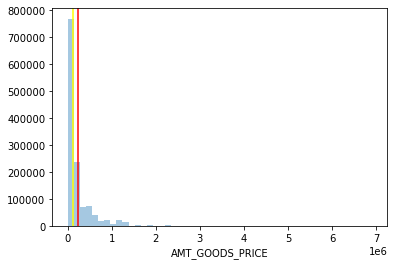

In [204]:
plt.figure(figsize=[6,4])
sns.distplot(data1.AMT_GOODS_PRICE, kde = False)
plt.axvline(data1.AMT_GOODS_PRICE.mean(), color = "red")
plt.axvline(data1.AMT_GOODS_PRICE.median(), color = "yellow")
plt.show()

In [205]:
data1.AMT_GOODS_PRICE.skew()

3.0736896781923937

Variable AMT_GOODS_PRICE is a highly skewed variable.

In [206]:
# Drop the records with AMT_GOODS_PRICE missing in dataframe data1 as they are highly skewed.

data1 = data1[~data1.AMT_GOODS_PRICE.isnull()]

In [207]:
# Checking for null values in the AMT_ANNUITY column.

data1.AMT_GOODS_PRICE.isnull().sum()

0

#### Handling missing values in AMT_ANNUITY column.

In [208]:
# Checking for null values in the AMT_ANNUITY column.

data1.AMT_ANNUITY.isnull().sum()

38379

In [209]:
# Calculate the percentage of missing values in AMT_ANNUITY column.

(data1.AMT_ANNUITY.isnull().sum()/data1.shape[0]) * 100

2.9873923775141105

In [210]:
data1.AMT_ANNUITY.describe()

count    1.246320e+06
mean     1.605938e+04
std      1.492967e+04
min      0.000000e+00
25%      6.327990e+03
50%      1.125000e+04
75%      2.061227e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

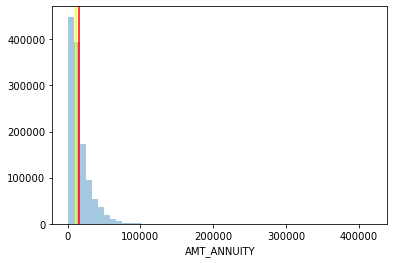

In [211]:
plt.figure(figsize=[6,4])
sns.distplot(data1.AMT_ANNUITY, kde = False)
plt.axvline(data1.AMT_ANNUITY.mean(), color = "red")
plt.axvline(data1.AMT_ANNUITY.median(), color = "yellow")
plt.show()

In [212]:
data1.AMT_ANNUITY.skew()

2.6936711381094094

The variable AMT_ANNUITY is highly skewed.

In [213]:
# Drop the records with AMT_ANNUITY missing in dataframe data1 as they are highly skewed.

data1 = data1[~data1.AMT_ANNUITY.isnull()]

In [214]:
# Checking for null values in the AMT_ANNUITY column.

data1.AMT_ANNUITY.isnull().sum()

0

In [215]:
data1.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
dtype: int64

#### Handling DAYS_DECISION column.

In [216]:
# describe the DAYS_DECISION column of data1.

data1.DAYS_DECISION.describe()

count    1.246320e+06
mean    -1.021855e+03
std      7.864511e+02
min     -2.922000e+03
25%     -1.534000e+03
50%     -7.660000e+02
75%     -3.850000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [217]:
# converting DAYS_DECISION from negative to positive values (aboslute value)

data1.DAYS_DECISION = data1.DAYS_DECISION.abs()

In [218]:
# describe the DAYS_DECISION column of data1.

data1.DAYS_DECISION.describe()

count    1.246320e+06
mean     1.021855e+03
std      7.864511e+02
min      1.000000e+00
25%      3.850000e+02
50%      7.660000e+02
75%      1.534000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

### 2. Handling Outliers

In [219]:
data1.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   
2     2523466      122040    15060.735         112500.0    136444.5   
3     2819243      176158    47041.335         450000.0    470790.0   
4     1784265      202054    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0          17145.0                    XAP             Approved             73   
1         607500.0                    XNA             Approved            164   
2         112500.0                    XNA             Approved            301   
3         450000.0                    XNA             Approved            512   
4         337500.0                Repairs              Refused            781   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  CNT_PAYMENT  \
0                XAP         Repeater              Mobile         12.0   
1                XAP         Repeater                 XNA         36.0   
2                XAP         Repeater                 XNA         12.0   
3                XAP         Repeater                 XNA         12.0   
4                 HC         Repeater                 XNA         24.0   

  NAME_YIELD_GROUP  
0           medium  
1            small  
2             high  
3           medium  
4             high

In [220]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246320 entries, 0 to 1670213
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1246320 non-null  int64  
 1   SK_ID_CURR              1246320 non-null  int64  
 2   AMT_ANNUITY             1246320 non-null  float64
 3   AMT_APPLICATION         1246320 non-null  float64
 4   AMT_CREDIT              1246320 non-null  float64
 5   AMT_GOODS_PRICE         1246320 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  1246320 non-null  object 
 7   NAME_CONTRACT_STATUS    1246320 non-null  object 
 8   DAYS_DECISION           1246320 non-null  int64  
 9   CODE_REJECT_REASON      1246320 non-null  object 
 10  NAME_CLIENT_TYPE        1246320 non-null  object 
 11  NAME_GOODS_CATEGORY     1246320 non-null  object 
 12  CNT_PAYMENT             1246320 non-null  float64
 13  NAME_YIELD_GROUP        1246320 non-null  object 
dtypes:

In [221]:
Numerical_cols = data1[["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "DAYS_DECISION", "CNT_PAYMENT"]]

Categorical_cols = data1[["CNT_PAYMENT", "NAME_CONTRACT_STATUS", "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", 
                          "NAME_GOODS_CATEGORY", "NAME_YIELD_GROUP"]]

#### AMT_ANNUITY

In [222]:
# Describe the AMT_ANNUITY variable in data0.

data1.AMT_ANNUITY.describe()

count    1.246320e+06
mean     1.605938e+04
std      1.492967e+04
min      0.000000e+00
25%      6.327990e+03
50%      1.125000e+04
75%      2.061227e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

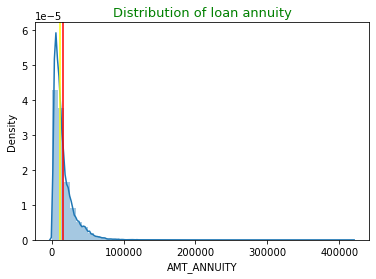

In [223]:
# Plot the histogram of AMT_ANNUITY variable.

sns.distplot(data1.AMT_ANNUITY)
plt.axvline(data1.AMT_ANNUITY.mean(), color = "red")
plt.axvline(data1.AMT_ANNUITY.median(), color = "yellow")
plt.title("Distribution of loan annuity", fontsize = 13, color = "green")
plt.show()

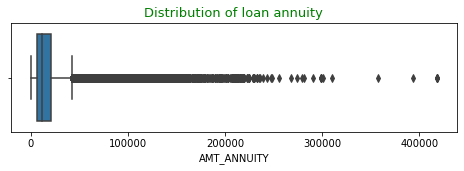

In [224]:
# Plot the boxplot of AMT_ANNUITY variable.

plt.figure(figsize = [8,2])
sns.boxplot(data1.AMT_ANNUITY)
plt.title("Distribution of loan annuity", fontsize = 13, color = "green")
plt.show()

In [225]:
# Checking the value of the 99th percentile of AMT_ANNUITY

data1.AMT_ANNUITY.quantile(0.99)

70224.3

In [226]:
len(data1.loc[data1.AMT_ANNUITY > 70224.3])

12455

There are close to 13,000 records that are more than the 99th percentile value. Since the 99th percentile value is 70224.3 and the maximum value is 418058.145, which is too much of a difference. We can replace the values that are more than the 99th percentile value.

In [227]:
# Replacing the values in AMT_ANNUITY that are greater than 99th percentile value to 71000 for it to 
# not hamper the analysis

data1.loc[data1['AMT_ANNUITY'] > 70224.3 , ['AMT_ANNUITY']] = 71000

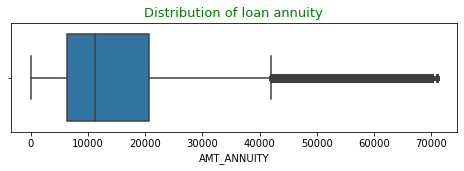

In [228]:
# Plot the boxplot of AMT_ANNUITY variable.

plt.figure(figsize = [8,2])
sns.boxplot(data1.AMT_ANNUITY)
plt.title("Distribution of loan annuity", fontsize = 13, color = "green")
plt.show()

#### AMT_APPLICATION

In [229]:
# Describe the AMT_APPLICATION variable in data1.

data1.AMT_APPLICATION.describe()

count    1.246320e+06
mean     2.325942e+05
std      3.186545e+05
min      0.000000e+00
25%      5.220000e+04
50%      1.125000e+05
75%      2.475000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64

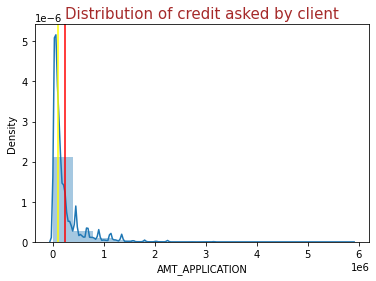

In [230]:
# Plot the histogram of AMT_APPLICATION variable.

plt.figure(figsize=[6,4])
sns.distplot(data1.AMT_APPLICATION, bins = 15, hist = True)
plt.axvline(data1.AMT_APPLICATION.mean(), color = "red")
plt.axvline(data1.AMT_APPLICATION.median(), color = "yellow")
plt.title("Distribution of credit asked by client", fontsize = 15, color = "brown")
plt.show()

In [231]:
data1.AMT_APPLICATION.skew()

3.0217080102404337

AMT_APPLICATION is a highly skewed feature in previous_application. 

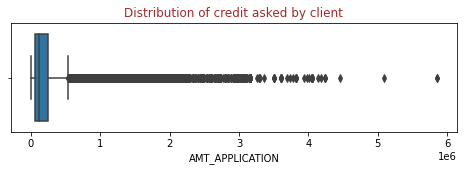

In [232]:
# Plot the boxplot of AMT_APPLICATION variable.

plt.figure(figsize=[8,2])
sns.boxplot(data1.AMT_APPLICATION)
plt.title("Distribution of credit asked by client", fontsize = 12, color = "brown")
plt.show()

In [233]:
# Checking the value of the 99th percentile of AMT_APPLICATION

data1.AMT_APPLICATION.quantile(0.99)

1440000.0

In [234]:
len(data1.loc[data1.AMT_APPLICATION > 1440000.0])

12230

There are more than 12,000 records that are more than the 99th percentile value. Since the 99th percentile value is 1440000 and the maximum value is 5850000, which is too much of a difference. We can replace the values that are more than the 99th percentile value.

In [235]:
# Replacing the values in AMT_APPLICATION that are greater than 99th percentile value to 1440000.0 for it to 
# not hamper the analysis

data1.loc[data1['AMT_APPLICATION'] > 1440000.0 , ['AMT_APPLICATION']] = 1440000.0

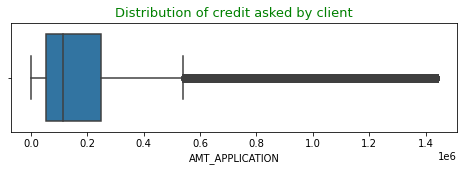

In [236]:
# Plot the boxplot of AMT_APPLICATION variable.

plt.figure(figsize = [8,2])
sns.boxplot(data1.AMT_APPLICATION)
plt.title("Distribution of credit asked by client", fontsize = 13, color = "green")
plt.show()

#### AMT_CREDIT

In [237]:
# Describe the AMT_CREDIT variable in data0.

data1.AMT_CREDIT.describe()

count    1.246320e+06
mean     2.492727e+05
std      3.465843e+05
min      0.000000e+00
25%      5.157450e+04
50%      1.161675e+05
75%      2.700000e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64

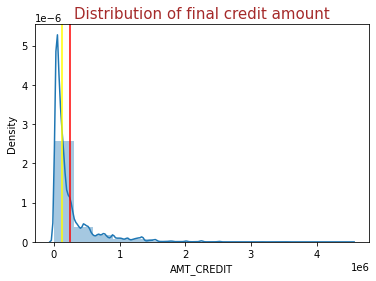

In [238]:
# Plot the histogram of AMT_CREDIT variable.

plt.figure(figsize=[6,4])
sns.distplot(data1.AMT_CREDIT, bins = 15, hist = True)
plt.axvline(data1.AMT_CREDIT.mean(), color = "red")
plt.axvline(data1.AMT_CREDIT.median(), color = "yellow")
plt.title("Distribution of final credit amount", fontsize = 15, color = "brown")
plt.show()

In [239]:
data1.AMT_CREDIT.skew()

2.9346449953034273

AMT_CREDIT is a highly right skewed feature in previous_application.

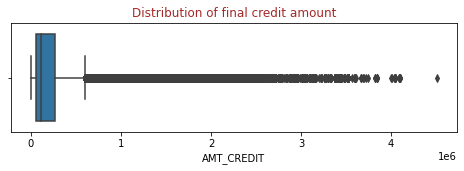

In [240]:
# Plot the boxplot of AMT_APPLICATION variable.

plt.figure(figsize=[8,2])
sns.boxplot(data1.AMT_CREDIT)
plt.title("Distribution of final credit amount", fontsize = 12, color = "brown")
plt.show()

In [241]:
# Checking the value of the 99th percentile of AMT_CREDIT

data1.AMT_CREDIT.quantile(0.99)

1575000.0

In [242]:
len(data1.loc[data1.AMT_CREDIT > 1575000.0])

11974

There are more than 11000 records that are more than the 99th percentile value. Since the 99th percentile value is 1575000.0 and the maximum value is 4509688, which is too much of a difference. We can replace the values that are more than the 99th percentile value.

In [243]:
# Replacing the values in AMT_CREDIT that are greater than 99th percentile value to 1575000 for it to 
# not hamper the analysis

data1.loc[data1['AMT_CREDIT'] > 1575000.0 , ['AMT_CREDIT']] = 1575000.0

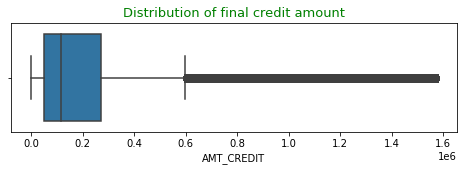

In [244]:
# Plot the boxplot of AMT_CREDIT variable.

plt.figure(figsize = [8,2])
sns.boxplot(data1.AMT_CREDIT)
plt.title("Distribution of final credit amount", fontsize = 13, color = "green")
plt.show()

#### DAYS_DECISION

In [245]:
data1.DAYS_DECISION.describe()

count    1.246320e+06
mean     1.021855e+03
std      7.864511e+02
min      1.000000e+00
25%      3.850000e+02
50%      7.660000e+02
75%      1.534000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

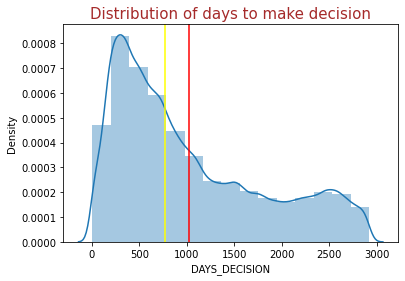

In [246]:
# Plot the histogram of DAYS_DECISION variable.

plt.figure(figsize=[6,4])
sns.distplot(data1.DAYS_DECISION, bins = 15, hist = True)
plt.axvline(data1.DAYS_DECISION.mean(), color = "red")
plt.axvline(data1.DAYS_DECISION.median(), color = "yellow")
plt.title("Distribution of days to make decision", fontsize = 15, color = "brown")
plt.show()

In [247]:
data1.DAYS_DECISION.skew()

0.81483400007912

DAYS_DECISION is a highly right skewed feature in previous_application.

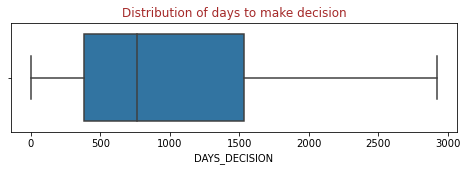

In [248]:
# Plot the boxplot of DAYS_DECISION variable.

plt.figure(figsize=[8,2])
sns.boxplot(data1.DAYS_DECISION)
plt.title("Distribution of days to make decision", fontsize = 12, color = "brown")
plt.show()

There are no outliers present in DAYS_DECISION.

#### CNT_PAYMENT

In [249]:
data1.CNT_PAYMENT.describe()

count    1.246320e+06
mean     1.671954e+01
std      1.448712e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

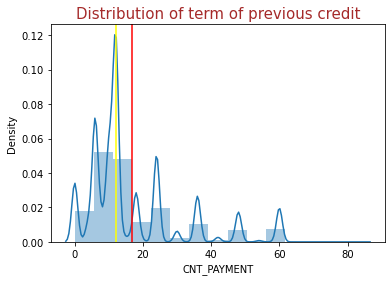

In [250]:
# Plot the histogram of CNT_PAYMENT variable.

plt.figure(figsize=[6,4])
sns.distplot(data1.CNT_PAYMENT, bins = 15, hist = True)
plt.axvline(data1.CNT_PAYMENT.mean(), color = "red")
plt.axvline(data1.CNT_PAYMENT.median(), color = "yellow")
plt.title("Distribution of term of previous credit", fontsize = 15, color = "brown")
plt.show()

In [251]:
data1.CNT_PAYMENT.skew()

1.5400173212811226

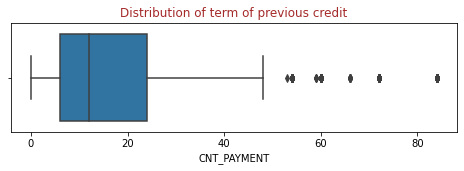

In [252]:
# Plot the boxplot of CNT_PAYMENT variable.

plt.figure(figsize=[8,2])
sns.boxplot(data1.CNT_PAYMENT)
plt.title("Distribution of term of previous credit", fontsize = 12, color = "brown")
plt.show()

In [253]:
# Checking the value of the 99th percentile of CNT_PAYMENT

data1.CNT_PAYMENT.quantile(0.99)

60.0

In [254]:
len(data1.loc[data1.CNT_PAYMENT > 60.0])

194

There are close to 200 records that are more than the 99th percentile value. Since the 99th percentile value is 60.0 and the maximum value is 84, which is too much of a difference. We can replace the values that are more than the 99th percentile value.

In [255]:
# Replacing the values in CNT_PAYMENT that are greater than 99th percentile value to 60.0 for it to 
# not hamper the analysis

data1.loc[data1['CNT_PAYMENT'] > 60.0 , ['CNT_PAYMENT']] = 60.0

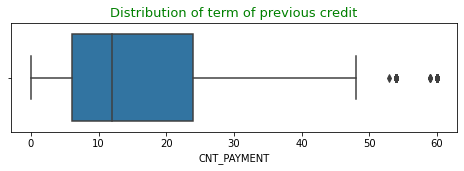

In [256]:
# Plot the boxplot of AMT_CREDIT variable.

plt.figure(figsize = [8,2])
sns.boxplot(data1.CNT_PAYMENT)
plt.title("Distribution of term of previous credit", fontsize = 13, color = "green")
plt.show()

## 3. Univariate Analysis

### Categorical Unordered Variables

In [257]:
Categorical_cols.head()

CNT_PAYMENT NAME_CONTRACT_STATUS CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0         12.0             Approved                XAP         Repeater   
1         36.0             Approved                XAP         Repeater   
2         12.0             Approved                XAP         Repeater   
3         12.0             Approved                XAP         Repeater   
4         24.0              Refused                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_YIELD_GROUP  
0              Mobile           medium  
1                 XNA            small  
2                 XNA             high  
3                 XNA           medium  
4                 XNA             high

In [258]:
# Dropping categorical ordered variable, as well will analysis that later.

Categorical_unordered_cols = Categorical_cols.drop(columns = ["NAME_YIELD_GROUP"], axis=1)

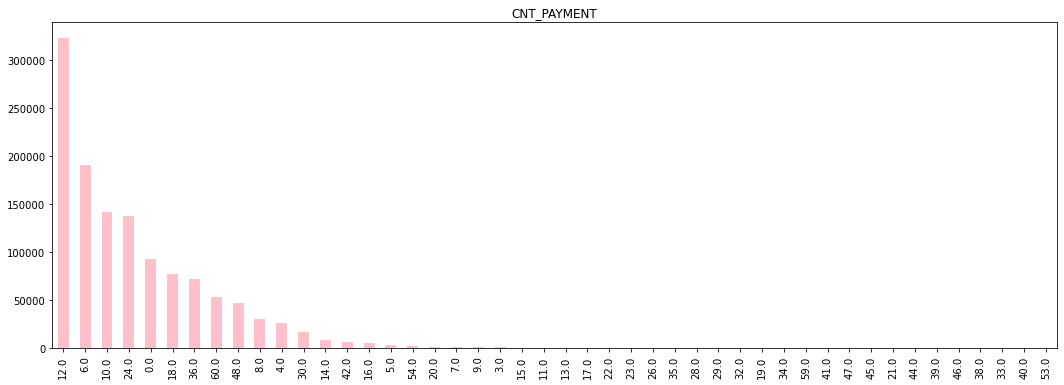

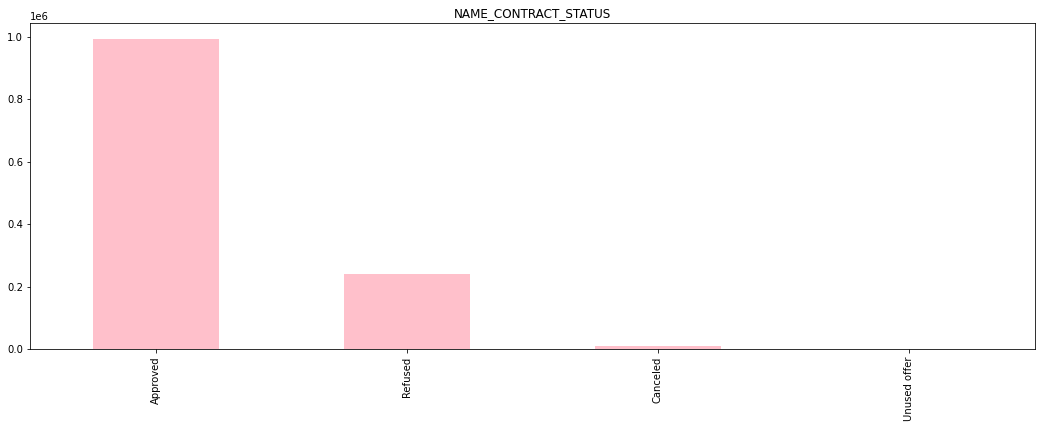

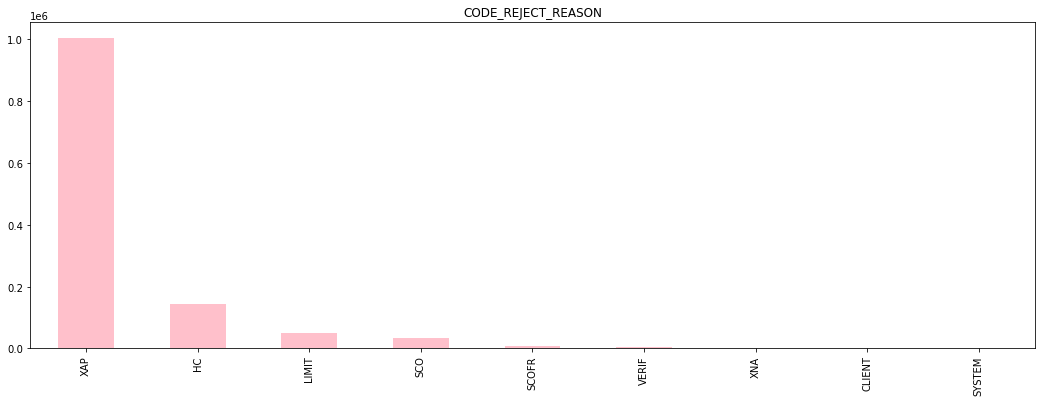

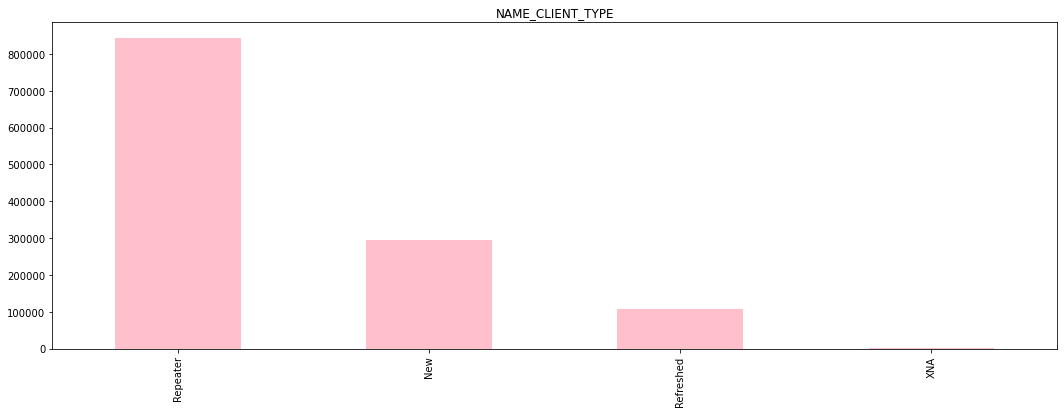

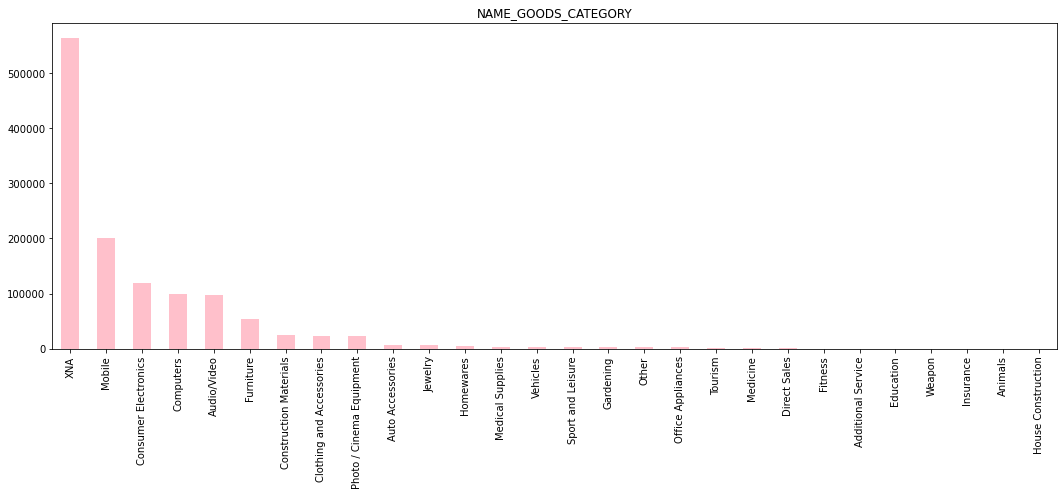

In [259]:
# Plotting bar graphs for all the categorical unordered variables

for x in Categorical_unordered_cols :
    plt.figure(figsize = (18,6))
    data1[x].value_counts().plot(kind='bar', color = "pink")
    plt.title(x)    
    plt.xticks(rotation=90)

Observations : 

    1. Around 300000 applicants term of credit was 12.0 followed by 6.0. 
    2. Around 10,00,000 applicants have been approved of the loan, 2,00,000 applicants were rejected fron procuring the loan.
    3. For most of the applicants we do not know the reason of reject, but otherwise HC is the most said reason for rejection of loans, followed by LIMIT.
    4. More than 8,00,000 applicants are repeaters (old customers), slightly more than 3,00,000 applicants being new customers.
    5. The most kind of goods the clients applied for is not known (XNA), but second being for Mobile phones (close to 2,00,000 applicants) followed by Consumer electronic and Comupters.

### Categorical Ordered Variables

#### NAME_YIELD_GROUP variable

In [260]:
# Checking the percentage of every category in NAME_YIELD_GROUP in data0.

data1.NAME_YIELD_GROUP.value_counts(normalize = True)*100

small     33.228705
medium    30.933548
high      28.349702
XNA        7.488045
Name: NAME_YIELD_GROUP, dtype: float64

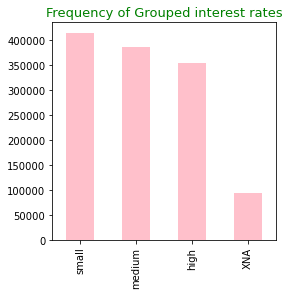

In [261]:
# Plot the barchart of NAME_YIELD_GROUP categories

plt.figure(figsize=(4,4))
data1.NAME_YIELD_GROUP.value_counts().plot(kind='bar', color = "pink")
plt.title("Frequency of Grouped interest rates", fontsize = 13, color = "green")
plt.show()

Most of the applicants, more than 400000 pay a 'small' amount of interest rate for their loan. But there is not much different between the number of applicants who pay 'medium' and 'high' amounts of interest rate (All the groups ahve more than 350000 people). 

### Numerical Analysis

In [262]:
Numerical_cols.head()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  \
0     1730.430          17145.0     17145.0          17145.0             73   
1    25188.615         607500.0    679671.0         607500.0            164   
2    15060.735         112500.0    136444.5         112500.0            301   
3    47041.335         450000.0    470790.0         450000.0            512   
4    31924.395         337500.0    404055.0         337500.0            781   

   CNT_PAYMENT  
0         12.0  
1         36.0  
2         12.0  
3         12.0  
4         24.0

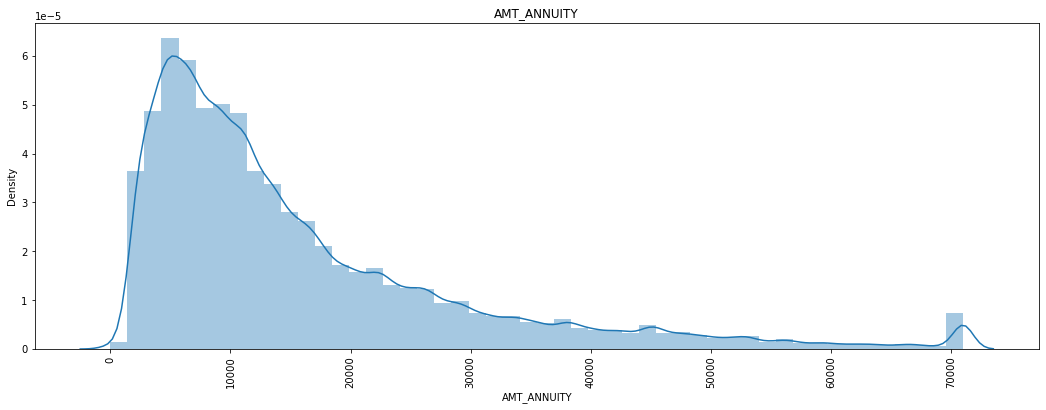

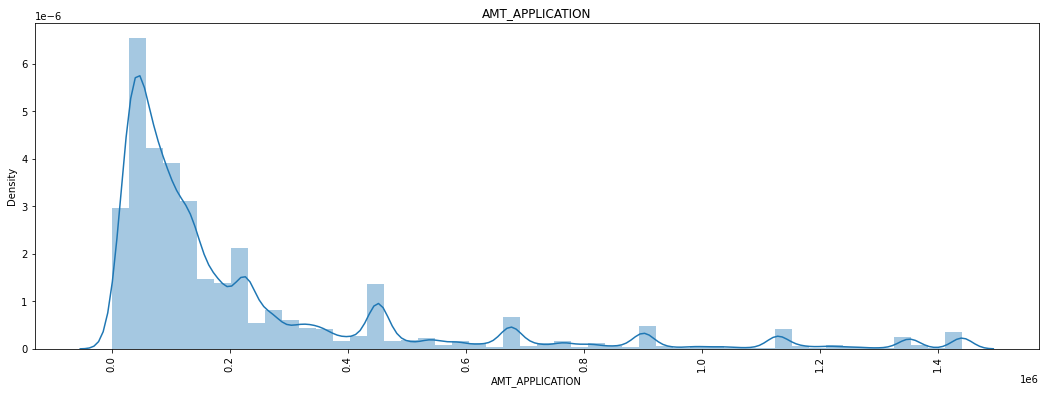

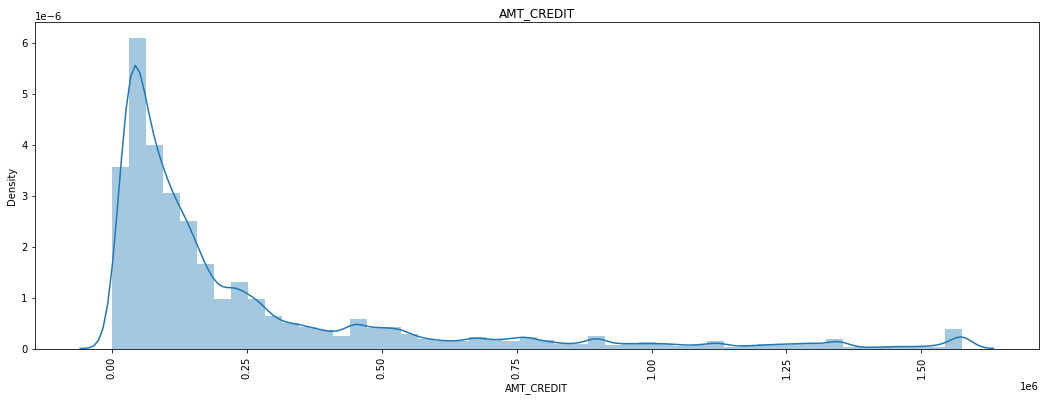

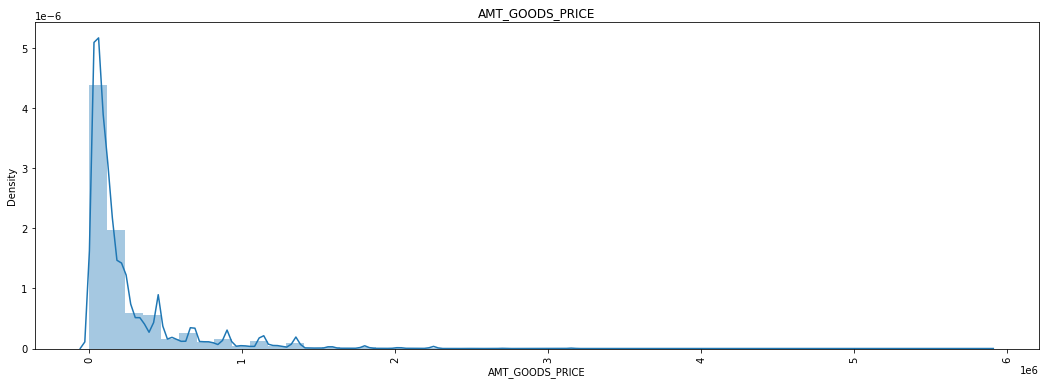

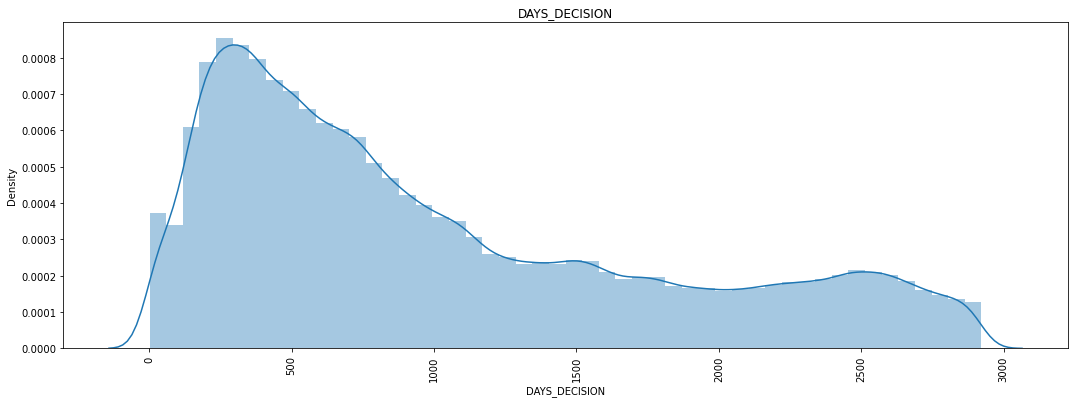

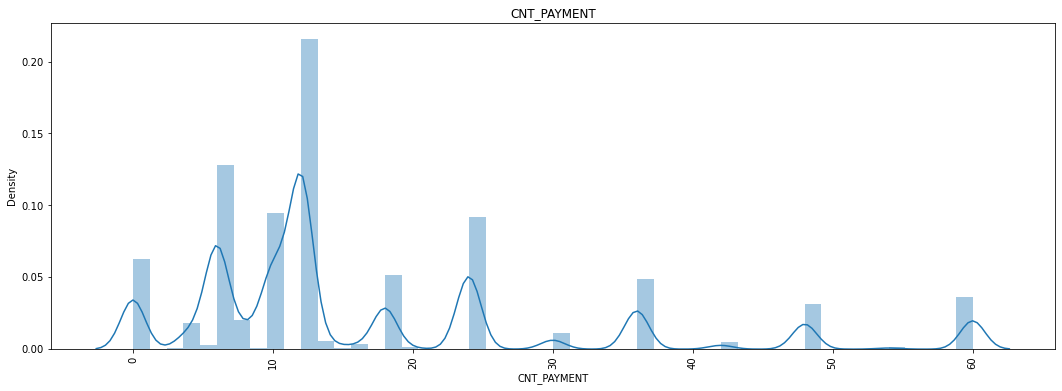

In [263]:
for x in Numerical_cols :
    plt.figure(figsize = (18,6))
    sns.distplot(data1[x])
    plt.title(x)    
    plt.xticks(rotation=90)

Observations : 

    1. The annuity of loan is mostly between the range of 5,000 - 8,000. The number of applicants paying more than that gradually decreases.
    2. The are many applicants that asked for around 20,000 - 40,000, and mostly in the range below 2,00,000.
    3. The most amount of loan actually provided to the client is around 20,000 - 40,000 and mostly in the range below 2,50,000.
    4. The goods price of good that the client asked for is mostly below 40,000.
    5. For most customer the number of days taken to arrive at a decision on the loan approval is around 200-500 days, least being. 
    6. The term of previous credit at application is mostly between 10 - 20.

## 4. Bivariate Analysis

### Categorical Analysis

In [264]:
Categorical_cols = data1[["CNT_PAYMENT", "NAME_CLIENT_TYPE", 
                          "NAME_GOODS_CATEGORY", "NAME_YIELD_GROUP"]]

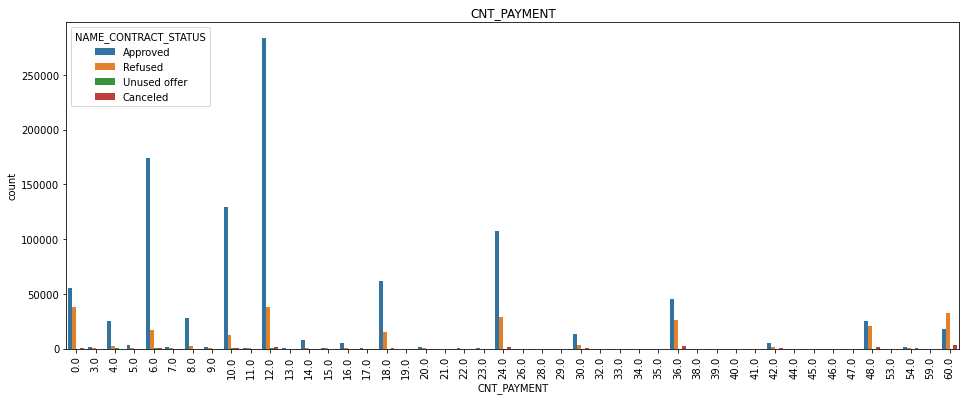

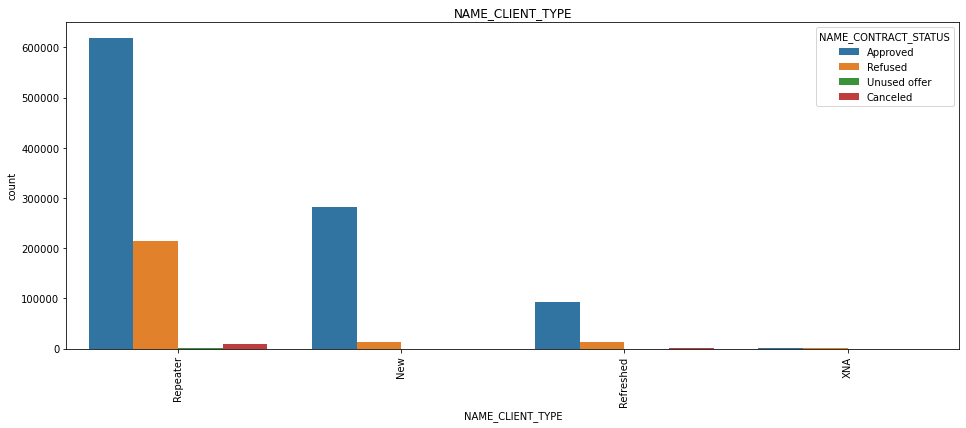

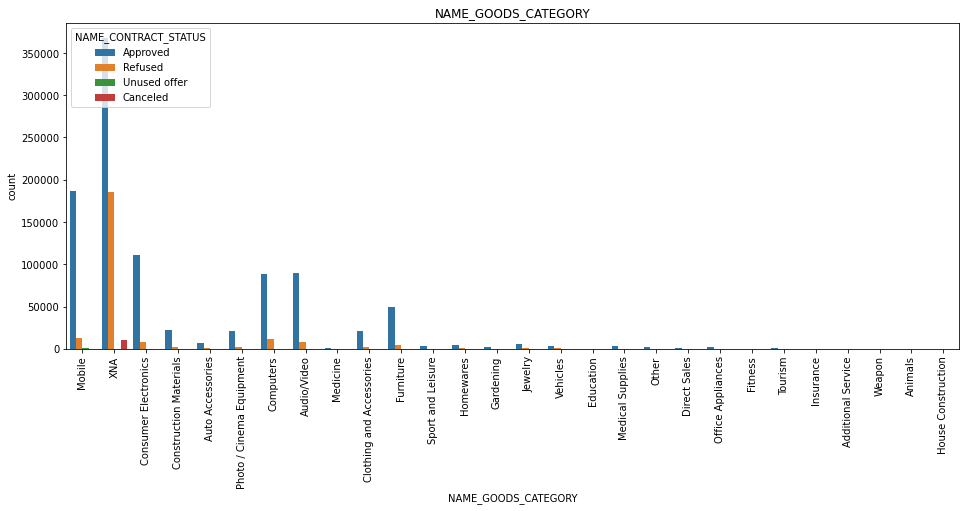

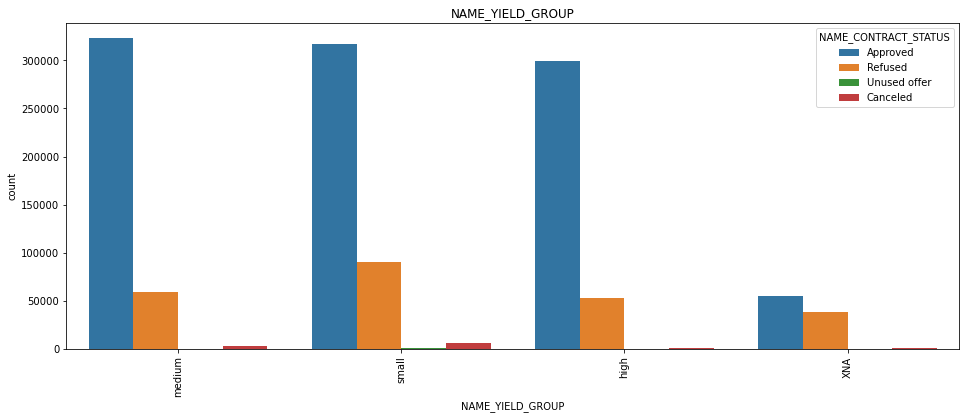

In [265]:
for x in Categorical_cols:
    plt.figure(figsize = (16,6))
    sns.countplot(data = data1, x = data1[x], hue = data1['NAME_CONTRACT_STATUS'])
    plt.title(x)    
    plt.xticks(rotation = 90)

Observations : 
 
    1. More than 250000 applicants loans were approved with term of credit of 12.0, it was also among one of the highest refused term credit range with close to 50000 applicants.
    2. More than 600000 applicants who were repeaters were approved of their loan and over 200000 repeater applicants were also rejected of loan. There were very few applicants rejected of loan from the new applicants.
    3. Most approvals and rejects is the goods not known (XNA) category but otherwise approvals for the mobile category was the most close to 200000. 
    4. Over 300000 applicants who were approved of loan payed a medium interest rate closely followed by the group of small interest rate (which is also above 300000 applicants).

### Numerical Analysis

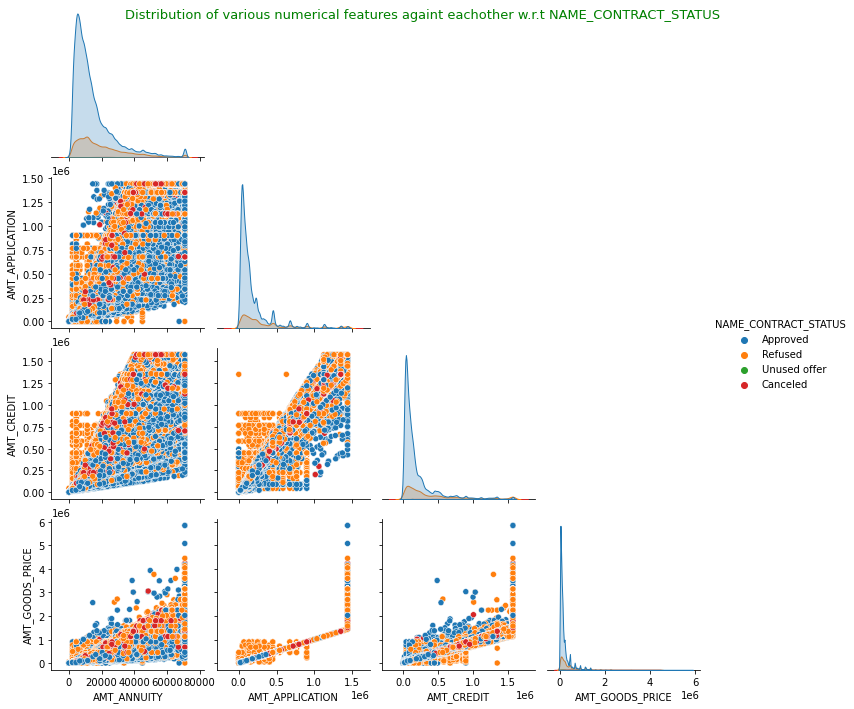

In [266]:
# Plotting a paitplot for the numeric variables

plot = sns.pairplot(data1[["AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "NAME_CONTRACT_STATUS"]], 
                    hue = "NAME_CONTRACT_STATUS", corner = True)
plot.fig.suptitle("Distribution of various numerical features againt eachother w.r.t NAME_CONTRACT_STATUS", 
                  fontsize = 13, color = "Green")
plt.show()

Observations : 
    
    1. As the loan annuity increases the price of the goods that client asked for also increases and so does the number of loan applications refused.
    2. As the loan annuity increases the credit amount also increases, but we can see that the rejection of loan here is not similar to the AMT_ANNUITY vs AMT_GOODS_PRICE. The number of approved loans are more as we increase the loan annuity and cresit amount.
    3. We can clealy see that as the amount of credit asked by the client on application increases, there is a great increase in the goods price and also faced a huge loan rejection rate.
    4. Though the client asked for more credit during applicant the credit amount provided by the company is relatively less, and as the ask goes higher by the client we can see a lot of loan rejections.
    5. AMT_CREDIT vs AMT_GOODS_PRICE is similar to that of AMT_APPLICATION vs AMT_GOODS_PRICE except there are few applications that were approved here which have less goods price.

# Merging application_data.csv and previous_application.csv

In [267]:
data_merge = data0.merge(data1, on = "SK_ID_CURR", how = "inner")
data_merge.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100003       0      Female           No              No             0   
3      100003       0      Female           No              No             0   
4      100004       0        Male          Yes             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  ...  \
0          202500.0      406597.5        24700.5           351000.0  ...   
1          270000.0     1293502.5        35698.5          1129500.0  ...   
2          270000.0     1293502.5        35698.5          1129500.0  ...   
3          270000.0     1293502.5        35698.5          1129500.0  ...   
4           67500.0      135000.0         6750.0           135000.0  ...   

  AMT_CREDIT_y AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     179055.0          179055.0                    XAP             Approved   
1    1035882.0          900000.0                    XNA             Approved   
2     348637.5          337500.0                    XAP             Approved   
3      68053.5           68809.5                    XAP             Approved   
4      20106.0           24282.0                    XAP             Approved   

  DAYS_DECISION  CODE_REJECT_REASON  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0           606                 XAP               New              Vehicles   
1           746                 XAP          Repeater                   XNA   
2           828                 XAP         Refreshed             Furniture   
3          2341                 XAP         Refreshed  Consumer Electronics   
4           815                 XAP               New                Mobile   

   CNT_PAYMENT  NAME_YIELD_GROUP  
0         24.0             small  
1         12.0             small  
2          6.0            medium  
3         12.0            medium  
4          4.0            medium  

[5 rows x 44 columns]

## 1. Data Understanding and Cleaning

In [268]:
data_merge.shape

(1058596, 44)

In [269]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058596 entries, 0 to 1058595
Data columns (total 44 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1058596 non-null  int64   
 1   TARGET                       1058596 non-null  int64   
 2   CODE_GENDER                  1058596 non-null  object  
 3   FLAG_OWN_CAR                 1058596 non-null  object  
 4   FLAG_OWN_REALTY              1058596 non-null  object  
 5   CNT_CHILDREN                 1058596 non-null  int64   
 6   AMT_INCOME_TOTAL             1058596 non-null  float64 
 7   AMT_CREDIT_x                 1058596 non-null  float64 
 8   AMT_ANNUITY_x                1058596 non-null  float64 
 9   AMT_GOODS_PRICE_x            1058596 non-null  float64 
 10  NAME_INCOME_TYPE             1058596 non-null  object  
 11  NAME_EDUCATION_TYPE          1058596 non-null  object  
 12  NAME_FAMILY_STATUS          

In [270]:
# Fetching all the columns in data_merge

data_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AGE_IN_YEARS', 'AGE_GROUP',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'AMT_GOODS_PRICE_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP'],
      dtype='object')

In [271]:
# Adding the columns that are of no use or already analysed columns to remove from further analysis.

no_use_columns = ["CNT_FAM_MEMBERS", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
             "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "EXT_SOURCE_2", "EXT_SOURCE_3", 
             "DAYS_LAST_PHONE_CHANGE", "SK_ID_PREV", "NAME_GOODS_CATEGORY", 
             "CNT_PAYMENT"]

len(no_use_columns)

13

In [272]:
# Dropping the above mentioned columns.

data_merge.drop(no_use_columns, axis = 1 , inplace = True)
data_merge.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1        Male           No             Yes             0   
1      100003       0      Female           No              No             0   
2      100003       0      Female           No              No             0   
3      100003       0      Female           No              No             0   
4      100004       0        Male          Yes             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  ...  \
0          202500.0      406597.5        24700.5           351000.0  ...   
1          270000.0     1293502.5        35698.5          1129500.0  ...   
2          270000.0     1293502.5        35698.5          1129500.0  ...   
3          270000.0     1293502.5        35698.5          1129500.0  ...   
4           67500.0      135000.0         6750.0           135000.0  ...   

  AMT_ANNUITY_y AMT_APPLICATION AMT_CREDIT_y AMT_GOODS_PRICE_y  \
0      9251.775        179055.0     179055.0          179055.0   
1     71000.000        900000.0    1035882.0          900000.0   
2     64567.665        337500.0     348637.5          337500.0   
3      6737.310         68809.5      68053.5           68809.5   
4      5357.250         24282.0      20106.0           24282.0   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                    XAP             Approved            606   
1                    XNA             Approved            746   
2                    XAP             Approved            828   
3                    XAP             Approved           2341   
4                    XAP             Approved            815   

  CODE_REJECT_REASON  NAME_CLIENT_TYPE  NAME_YIELD_GROUP  
0                XAP               New             small  
1                XAP          Repeater             small  
2                XAP         Refreshed            medium  
3                XAP         Refreshed            medium  
4                XAP               New            medium  

[5 rows x 31 columns]

In [273]:
data_merge.shape

(1058596, 31)

## 2. Univariate Analysis

In [274]:
data_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AGE_IN_YEARS', 'AGE_GROUP',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP'],
      dtype='object')

#### TARGET variable

In [275]:
# Getting the percentage of each TARGET value

data_merge.TARGET.value_counts(normalize = True)

0    0.916391
1    0.083609
Name: TARGET, dtype: float64

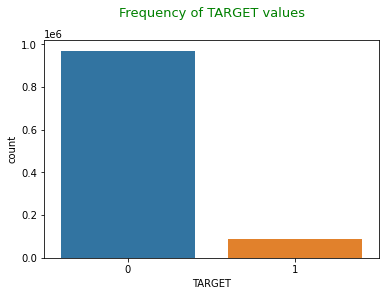

In [276]:
# Plot the countplot of TARGET categories

sns.countplot(x ='TARGET', data = data_merge)
plt.title("Frequency of TARGET values", fontsize = 13, color = "Green", y=1.08)
plt.show()

91% of the applicants are not likely to have payment difficulties, but around 8% applicants have some payment difficulties.

#### NAME_CONTRACT_STATUS variable

In [277]:
# Checking the percentage of every category in NAME_CONTRACT_STATUS in data_merge.

data_merge.NAME_CONTRACT_STATUS.value_counts(normalize = True)*100

Approved        79.959305
Refused         19.142525
Canceled         0.824394
Unused offer     0.073777
Name: NAME_CONTRACT_STATUS, dtype: float64

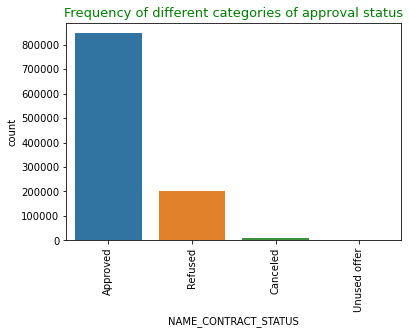

In [278]:
# Plot the countplot of NAME_CONTRACT_STATUS categories

sns.countplot(x ='NAME_CONTRACT_STATUS', data = data_merge)
plt.xticks(rotation = 90)
plt.title("Frequency of different categories of approval status", fontsize = 13, color = "Green")
plt.show()

More than 8,00,000 applicants have been approved of loan, wiht only close to 2,00,000 applicants rejected.

#### NAME_CLIENT_TYPE variable

In [279]:
# Checking the percentage of every category in NAME_CLIENT_TYPE in data_merge.

data_merge.NAME_CLIENT_TYPE.value_counts(normalize = True)*100

Repeater     67.459068
New          23.897313
Refreshed     8.577966
XNA           0.065653
Name: NAME_CLIENT_TYPE, dtype: float64

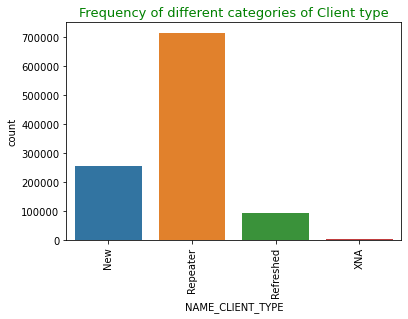

In [280]:
# Plot the countplot of NAME_CLIENT_TYPE categories

sns.countplot(x ='NAME_CLIENT_TYPE', data = data_merge)
plt.xticks(rotation = 90)
plt.title("Frequency of different categories of Client type", fontsize = 13, color = "Green")
plt.show()

More than 7,00,000 applications are repeaters (old customers), close to 3,00,000 are new ones.

#### NAME_CASH_LOAN_PURPOSE variable

In [281]:
# Checking the percentage of every category in NAME_CASH_LOAN_PURPOSE in data_merge.

data_merge.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100

XAP                                 63.073826
XNA                                 31.348692
Repairs                              1.891184
Other                                1.256098
Urgent needs                         0.681658
Buying a used car                    0.231250
Building a house or an annex         0.220481
Everyday expenses                    0.191291
Medicine                             0.175704
Payments on other loans              0.147837
Education                            0.125166
Journey                              0.097865
Purchase of electronic equipment     0.087758
Buying a new car                     0.082846
Wedding / gift / holiday             0.075099
Buying a home                        0.066220
Car repairs                          0.065275
Furniture                            0.062347
Buying a holiday home / land         0.043454
Business development                 0.033724
Gasification / water supply          0.023616
Buying a garage                   

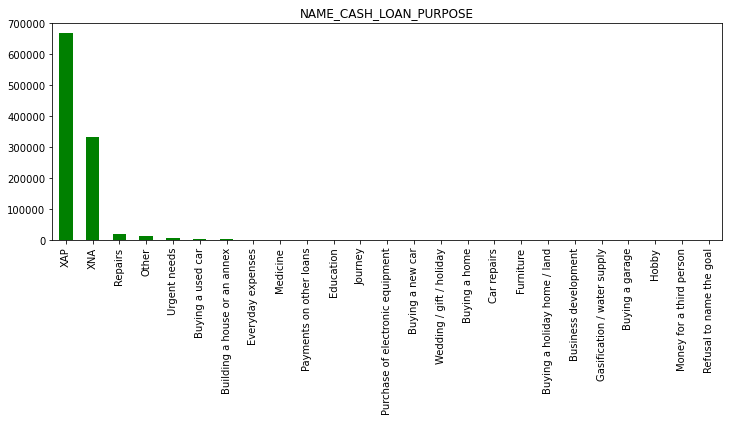

In [282]:
# Plotting counts of NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(12,4))
data_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().plot(kind='bar', color = 'green')
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.show()

In [283]:
len(data_merge[(data_merge.NAME_CASH_LOAN_PURPOSE == "XAP") | (data_merge.NAME_CASH_LOAN_PURPOSE == "XNA")])

999553

In [284]:
# There is a huge chunk of records that are in the unknown region which would hamper the further analysis, 
# so it is better to drop them.

data_merge = data_merge.drop(data_merge[(data_merge.NAME_CASH_LOAN_PURPOSE == "XAP") | 
                                        (data_merge.NAME_CASH_LOAN_PURPOSE == "XNA")].index)

In [285]:
data_merge.shape

(59043, 31)

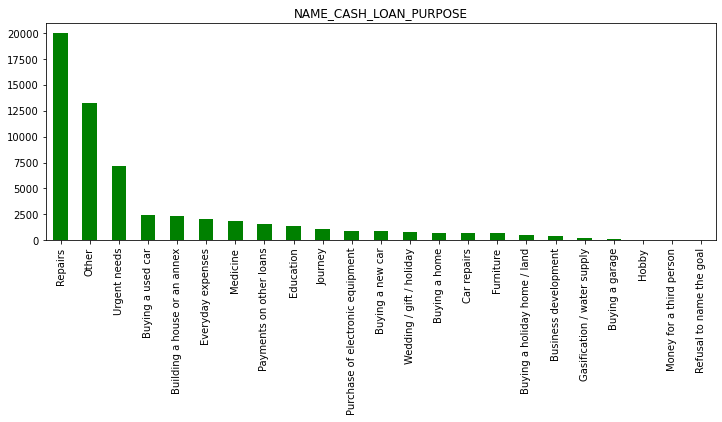

In [286]:
# Plotting counts of NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(12,4))
data_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().plot(kind='bar', color = 'green')
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.show()

Now, we can see that most of loans were taken for Repairs purposes, followed by Others and Urgent needs.

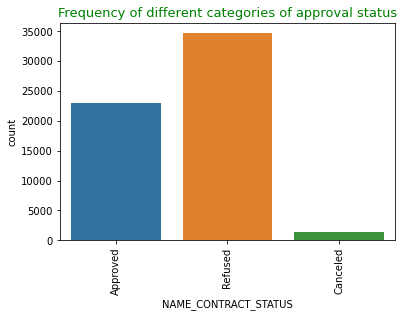

In [287]:
# Plot the countplot of NAME_CONTRACT_STATUS categories

sns.countplot(x ='NAME_CONTRACT_STATUS', data = data_merge)
plt.xticks(rotation = 90)
plt.title("Frequency of different categories of approval status", fontsize = 13, color = "Green")
plt.show()

## 3. Bivariate Analysis

In [288]:
Cat_cols = data_merge[["TARGET", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
                       "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "AGE_GROUP", 
                       "NAME_CONTRACT_STATUS"]]

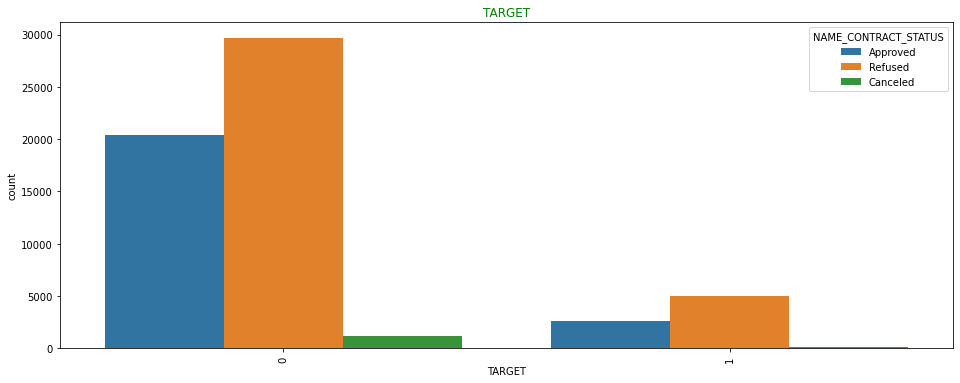

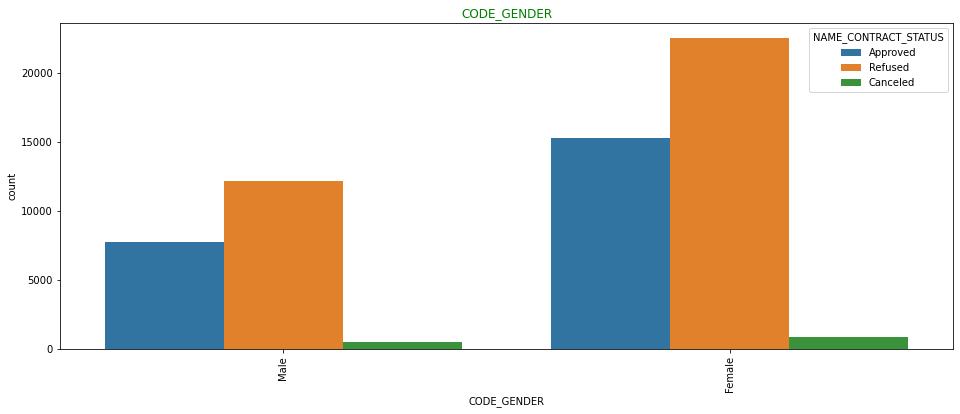

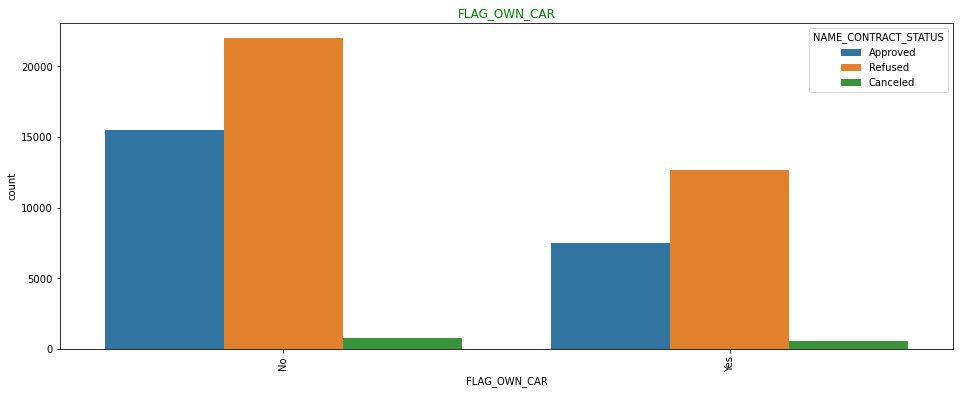

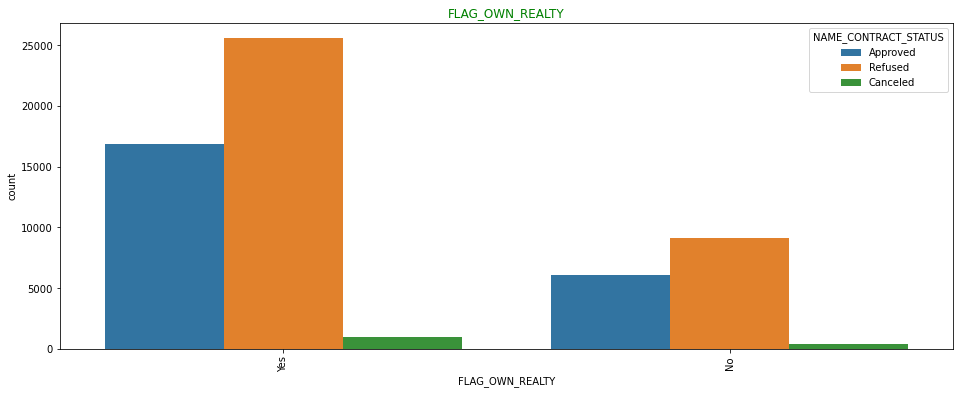

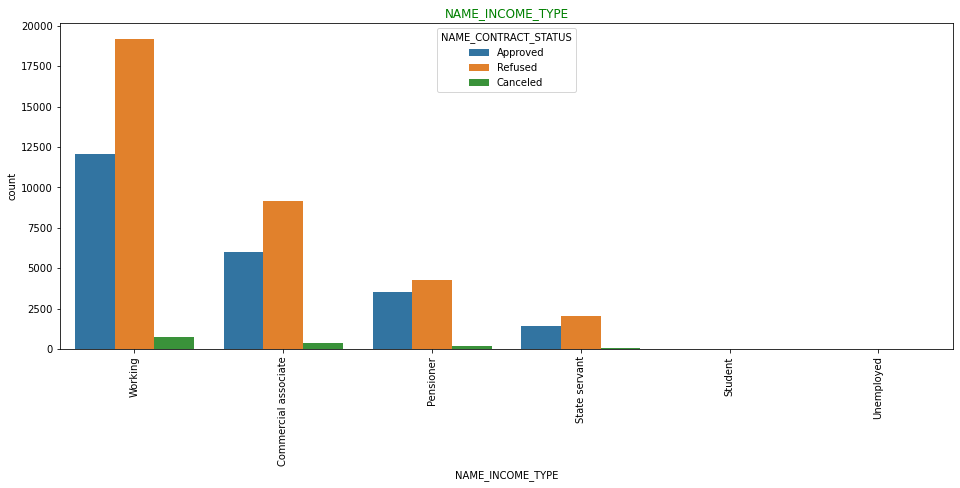

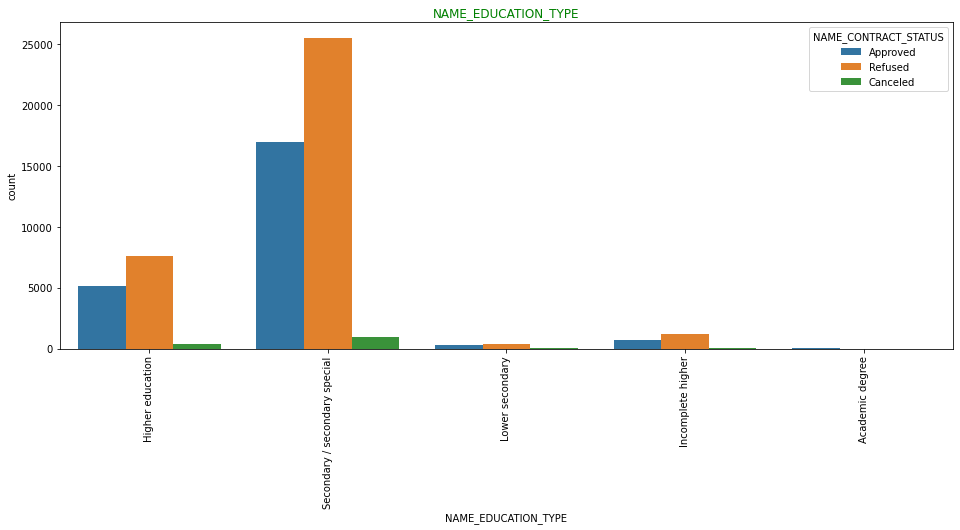

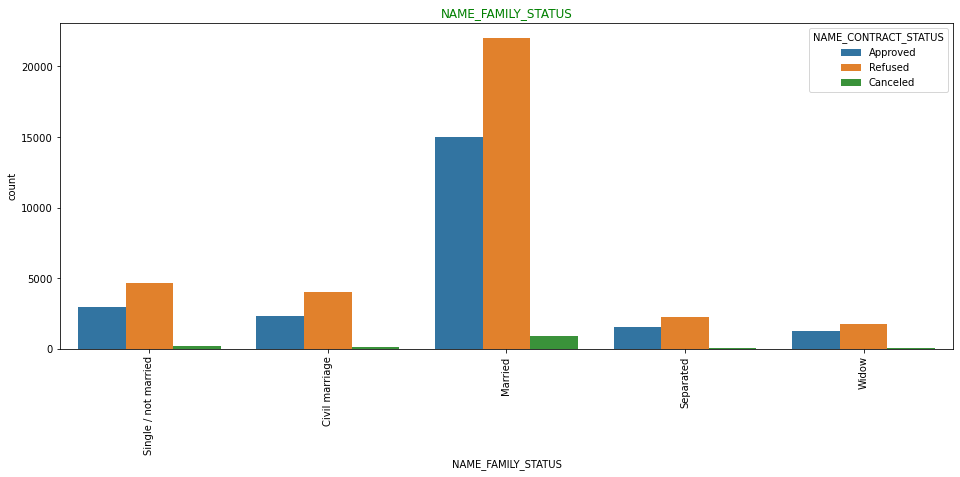

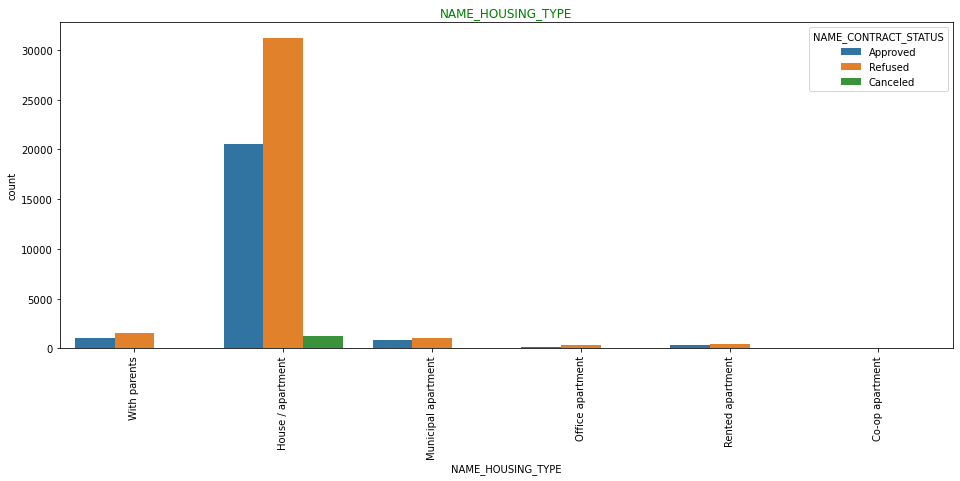

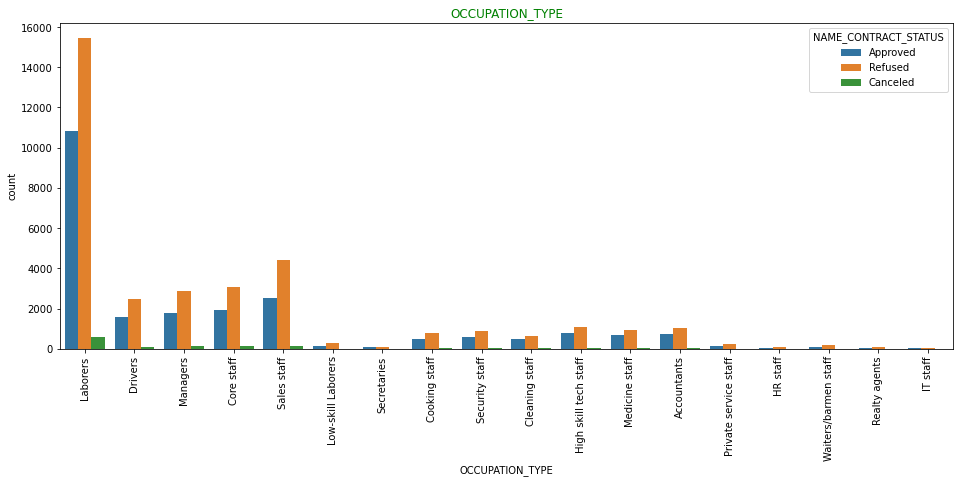

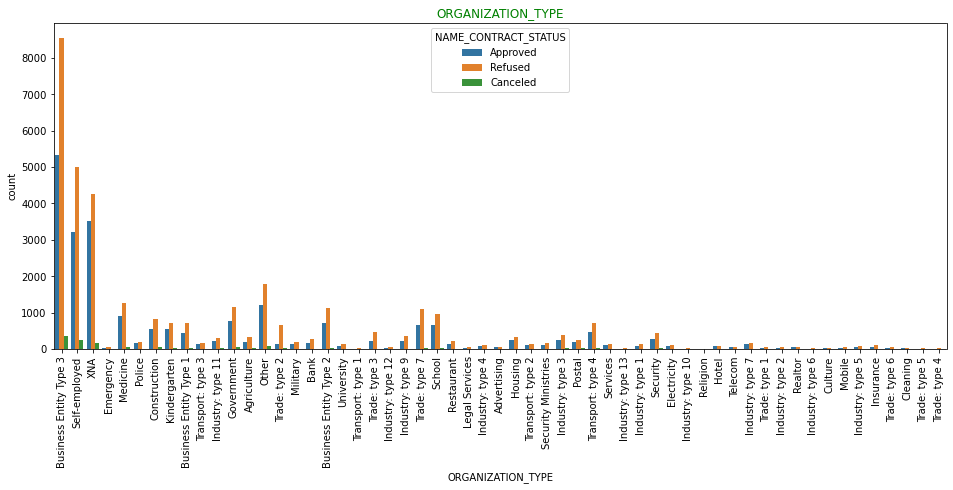

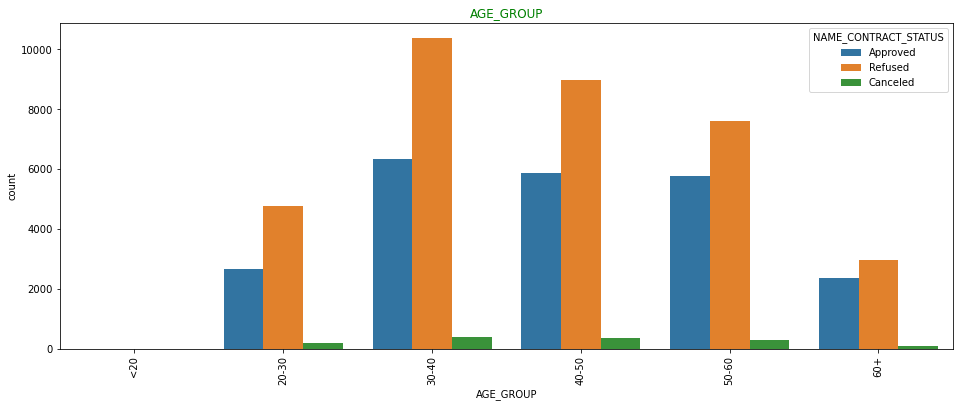

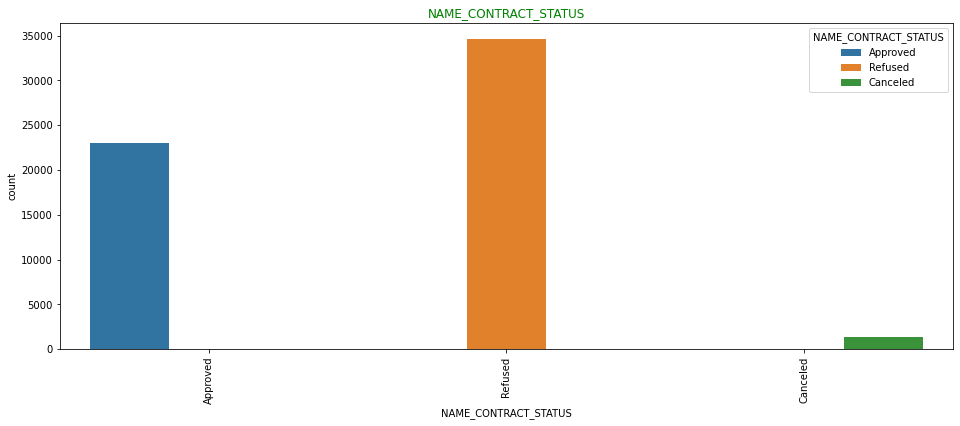

In [289]:
for x in Cat_cols:
    plt.figure(figsize = (16,6))
    sns.countplot(data = data_merge, x = data_merge[x], hue = data_merge['NAME_CONTRACT_STATUS'])
    plt.title(x, color = "green")    
    plt.xticks(rotation = 90)

Observations : 
    
    1. Close to 30000 applications were rejected who would have had no difficulty in payment of loan and close to 5000 applications approved that had payment difficulties.
    2. Close to 15000 Male applicants and more than 20000 Female applicants were refused of loan. So when we lokk propotionally number of males were refused of loan more.
    3. More than 15000 applicants who didn't own a car were approved and close 15000 applicants who did own a car were rejected of loan.
    4. More than 25000 applicants who owened a property were refused of loan and slightly more than 5000 applicants who did not own a property were approved of loan.
    5. Most of the working professional applicants were both approved and rejected.
    6. Most of the secondary/secondary special educated applicants were approved as well as refused of loan. Followed by Higher education and Incomplete higher education.
    7. Most fo the loan was granted to Married applicants and most were rejected from the same category.
    8. Most of the applicants who owned a house/apartment were refused of loans and also the ones who were granted approval for loans.
    9. Occupation type as Laborers were the highest to have been approved and rejected of loan, followed by Sales staff, Core staff, Managers and Drivers, etc.
    10. Organization type as Business entity type 3 were the highest to have been approved and rejected of loan, followed by Self-employed.
    11. Age group of 30-40 were the highest to have been approved as well as rejected of loan, followed by 40-50, 50-60, etc.
    12. Close to 35000 applications were refused and only 25000 applications were approved.

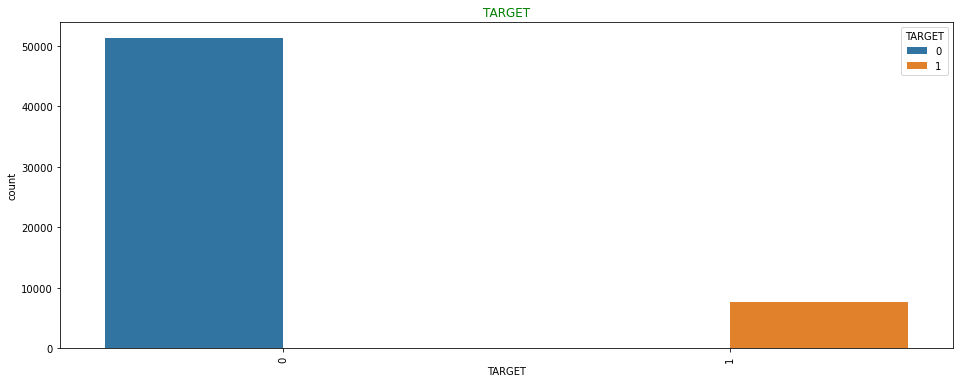

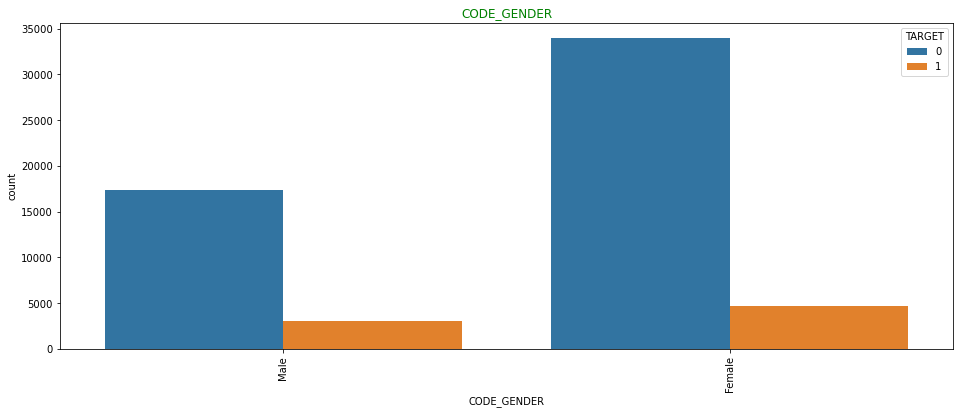

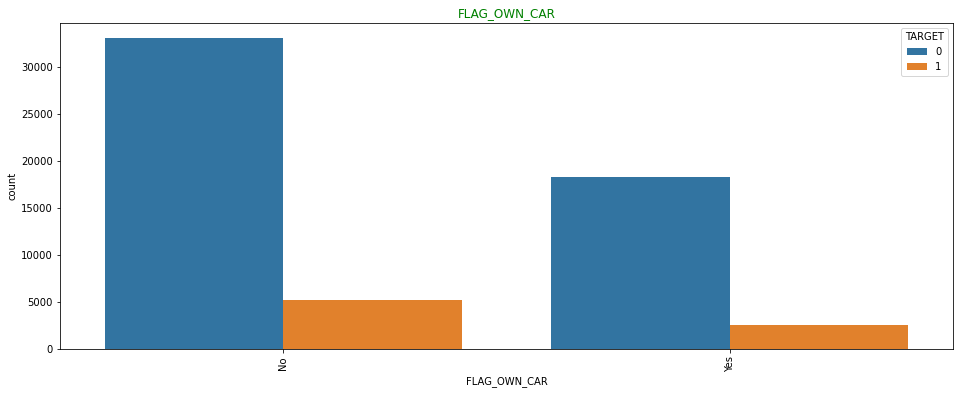

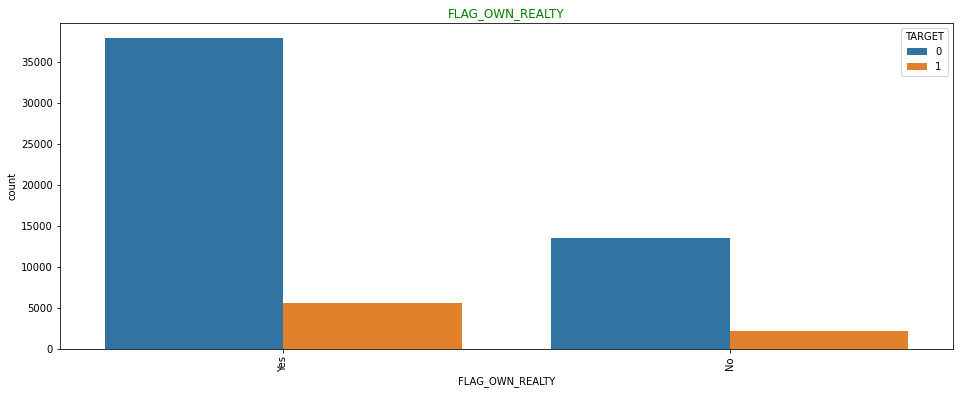

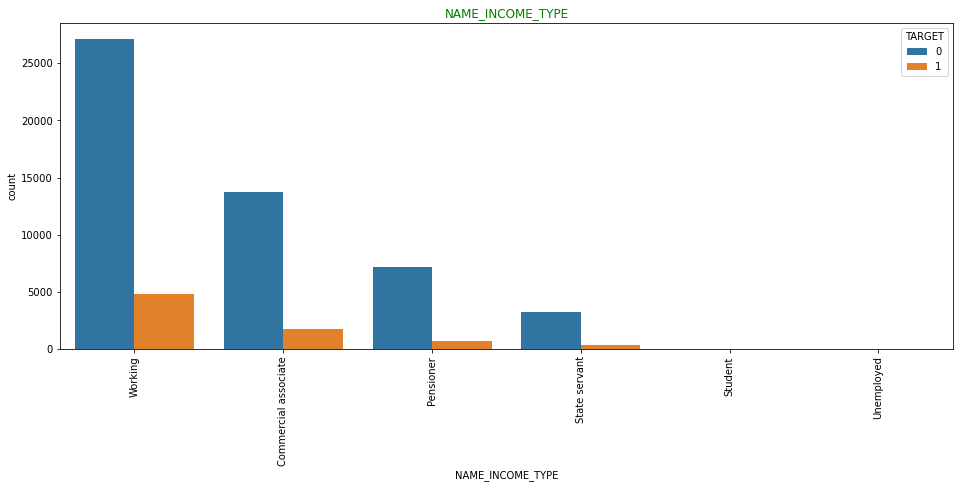

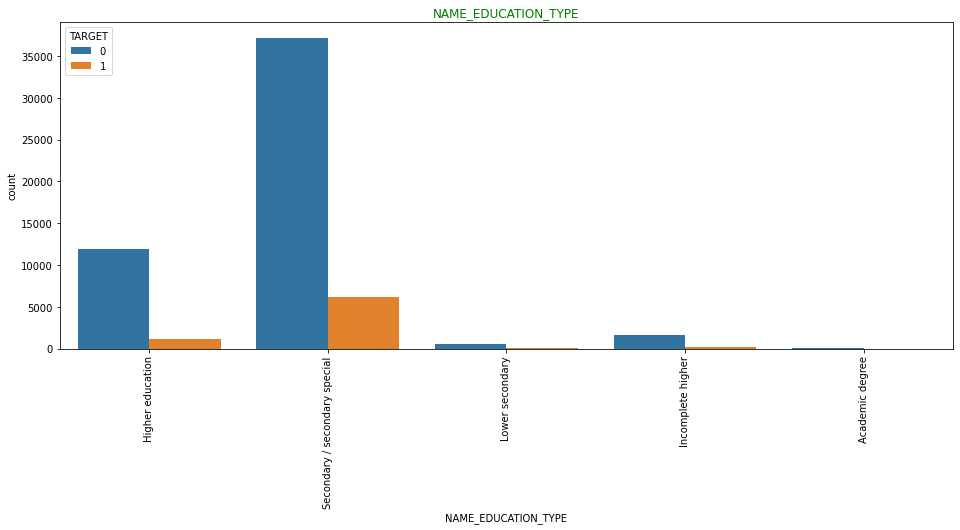

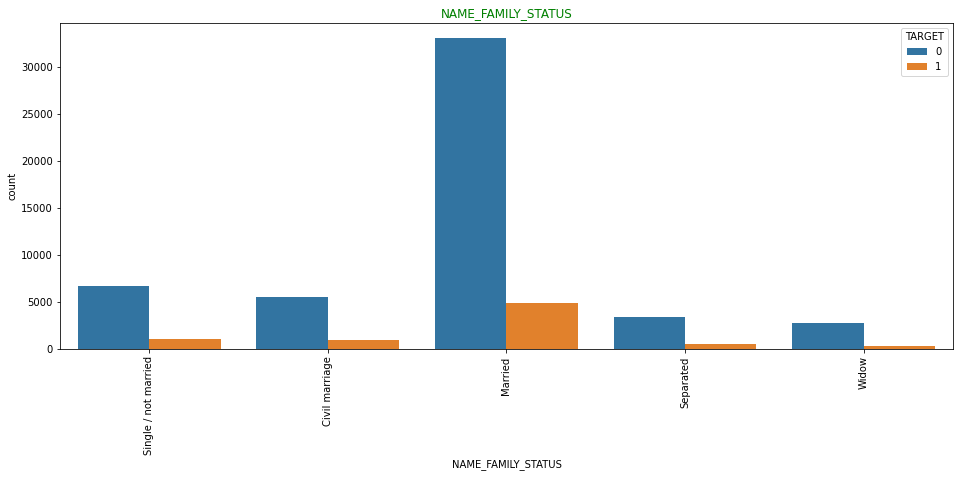

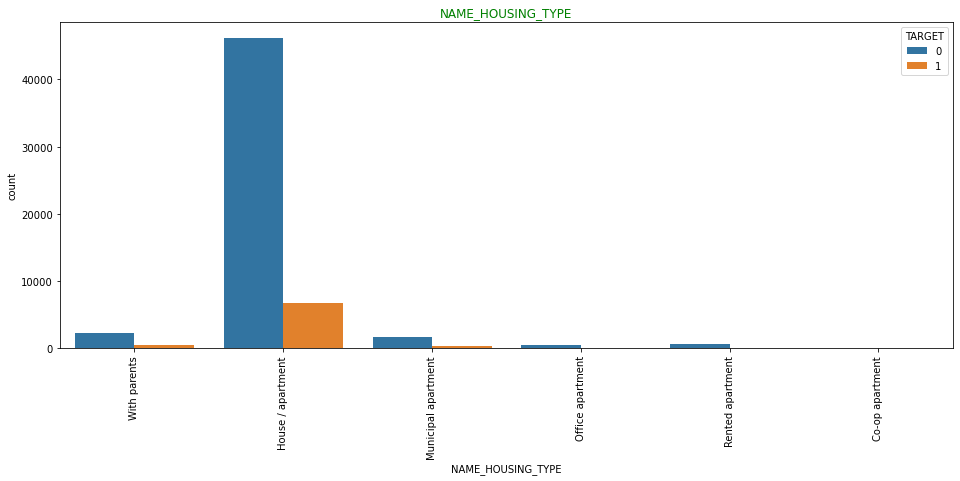

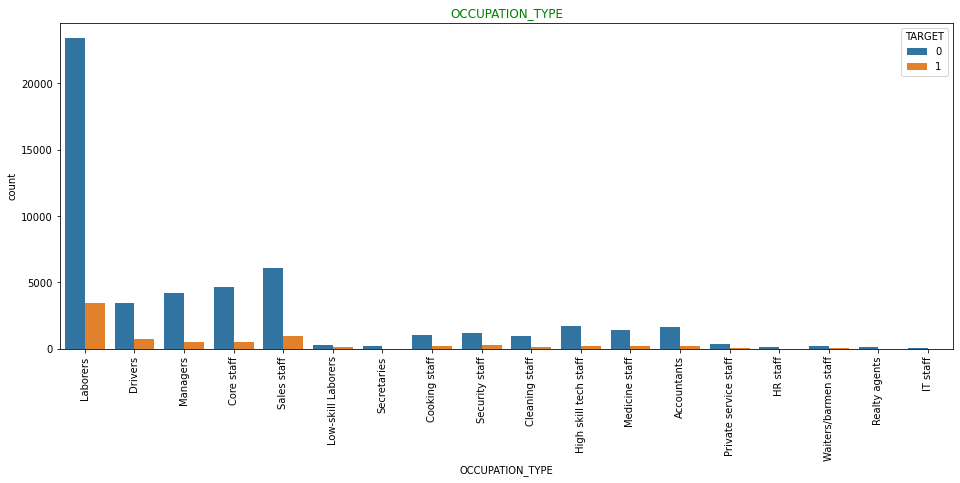

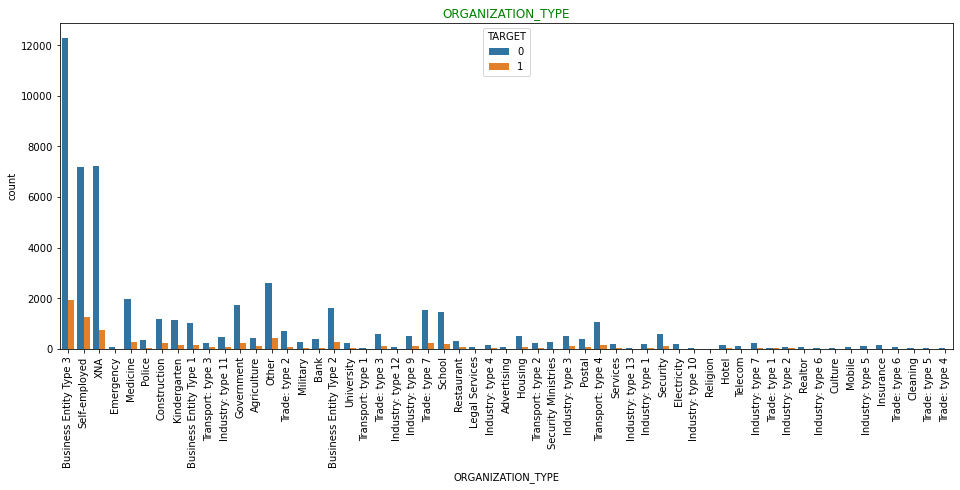

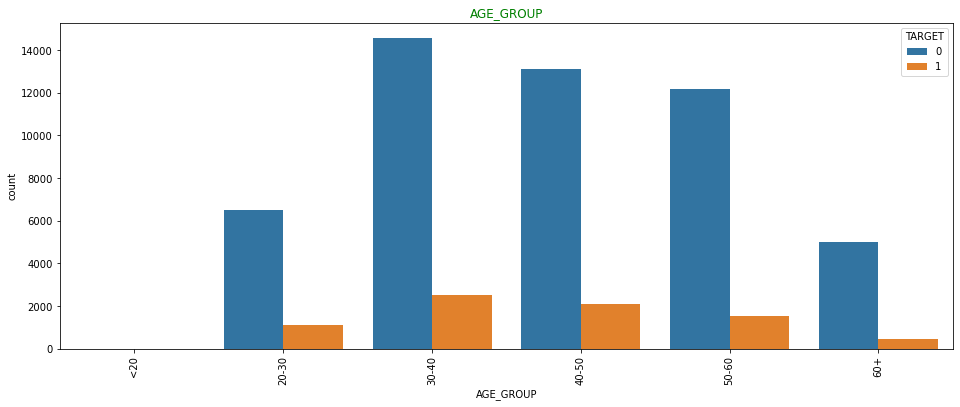

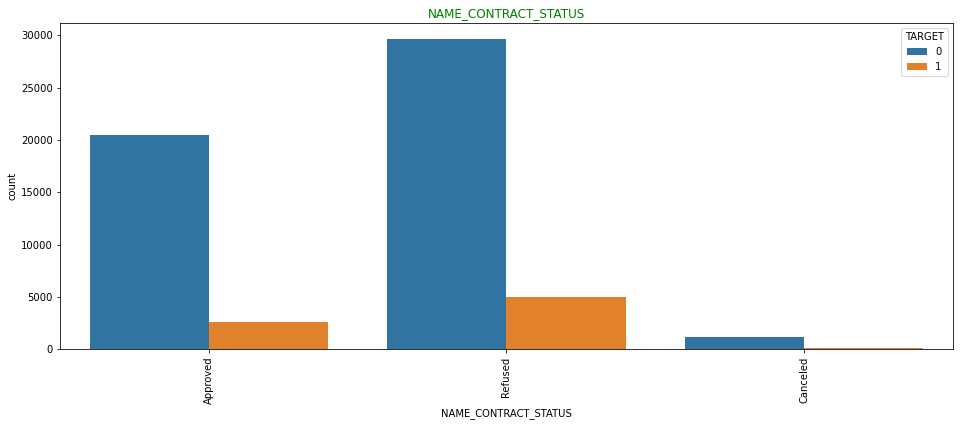

In [290]:
for x in Cat_cols:
    plt.figure(figsize = (16,6))
    sns.countplot(data = data_merge, x = data_merge[x], hue = data_merge['TARGET'])
    plt.title(x, color = "green")    
    plt.xticks(rotation = 90)

## 4. Multivariate Analysis

In [291]:
# Removing TARGET and SK_ID_CURR from the dataset before segmenting them into 2 datasets

data_merge1 = data_merge.drop(columns = ["SK_ID_CURR","TARGET"], axis=1)

In [292]:
data_merge_target1 = data_merge1[data_merge.TARGET == 1]
data_merge_target1.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
918         Male           No             Yes             1          112500.0   
1658        Male          Yes              No             0          211500.0   
1664        Male          Yes              No             0          211500.0   
1668        Male          Yes              No             0          211500.0   
1670        Male          Yes              No             0          211500.0   

      AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_INCOME_TYPE  \
918       571486.5        31131.0           454500.0          Working   
1658      450000.0        21888.0           450000.0          Working   
1664      450000.0        21888.0           450000.0          Working   
1668      450000.0        21888.0           450000.0          Working   
1670      450000.0        21888.0           450000.0          Working   

                NAME_EDUCATION_TYPE  ... AMT_ANNUITY_y AMT_APPLICATION  \
918   Secondary / secondary special  ...     32809.005        225000.0   
1658  Secondary / secondary special  ...     32832.000        675000.0   
1664  Secondary / secondary special  ...     34849.845        630000.0   
1668  Secondary / secondary special  ...     30643.200        630000.0   
1670  Secondary / secondary special  ...     42231.015        900000.0   

     AMT_CREDIT_y AMT_GOODS_PRICE_y  NAME_CASH_LOAN_PURPOSE  \
918      275373.0          225000.0                   Other   
1658     675000.0          675000.0                 Repairs   
1664     716485.5          630000.0            Urgent needs   
1668     630000.0          630000.0            Urgent needs   
1670    1004544.0          900000.0       Buying a used car   

     NAME_CONTRACT_STATUS  DAYS_DECISION  CODE_REJECT_REASON  \
918               Refused           1574                  HC   
1658              Refused            738               VERIF   
1664              Refused            569                  HC   
1668             Approved            569                 XAP   
1670              Refused            610               LIMIT   

      NAME_CLIENT_TYPE  NAME_YIELD_GROUP  
918           Repeater              high  
1658          Repeater            medium  
1664          Repeater            medium  
1668          Repeater            medium  
1670          Repeater            medium  

[5 rows x 29 columns]

In [293]:
data_merge_target0 = data_merge1[data_merge.TARGET == 0]
data_merge_target0.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
84         Male           No             Yes             0           90000.0   
90       Female           No             Yes             0          292500.0   
106        Male          Yes              No             1          360000.0   
127        Male          Yes             Yes             0          180000.0   
128        Male          Yes             Yes             0          180000.0   

     AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x      NAME_INCOME_TYPE  \
84       180000.0         9000.0           180000.0               Working   
90       665892.0        24592.5           477000.0  Commercial associate   
106      733315.5        39069.0           679500.0  Commercial associate   
127      540000.0        27000.0           540000.0               Working   
128      540000.0        27000.0           540000.0               Working   

               NAME_EDUCATION_TYPE  ... AMT_ANNUITY_y AMT_APPLICATION  \
84                Higher education  ...     22430.430         94500.0   
90   Secondary / secondary special  ...     33238.800       1260000.0   
106  Secondary / secondary special  ...     52513.515       1350000.0   
127               Higher education  ...     28390.635        337500.0   
128               Higher education  ...     29053.215        450000.0   

    AMT_CREDIT_y AMT_GOODS_PRICE_y   NAME_CASH_LOAN_PURPOSE  \
84      109971.0           94500.0                    Other   
90     1260000.0         1260000.0  Payments on other loans   
106    1487214.0         1350000.0        Buying a used car   
127     407911.5          337500.0                  Repairs   
128     555723.0          450000.0                  Repairs   

    NAME_CONTRACT_STATUS  DAYS_DECISION  CODE_REJECT_REASON  NAME_CLIENT_TYPE  \
84              Approved            599                 XAP               New   
90               Refused            119                  HC          Repeater   
106             Approved            695                 XAP         Refreshed   
127             Approved            539                 XAP               New   
128              Refused            449               LIMIT          Repeater   

     NAME_YIELD_GROUP  
84               high  
90              small  
106             small  
127             small  
128             small  

[5 rows x 29 columns]

#### Checking correlation for TARGET = 1, clients with payment difficulties

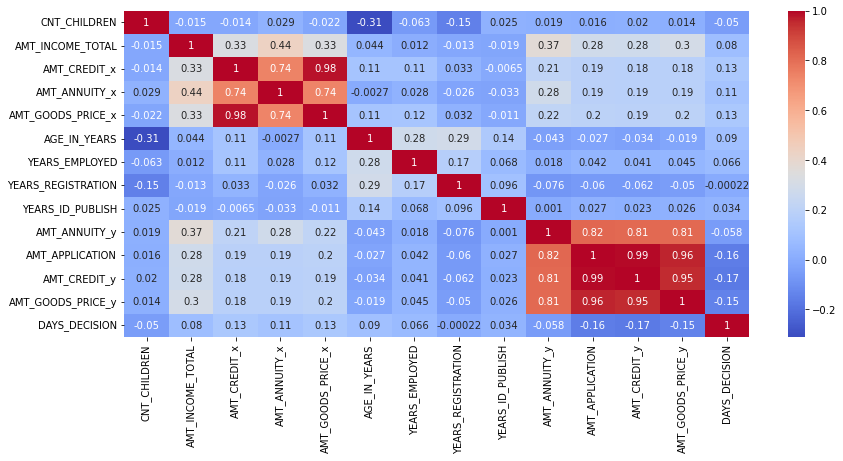

In [294]:
# Plotting heatmap to get correlation for Target = 1

plt.figure(figsize = (14,6))
sns.heatmap(data_merge_target1.corr(), annot = True,cmap= "coolwarm")
plt.show()

In [295]:
# Fetching the TOP 10 correlation for TARGET = 1 (clients with payment difficulties)
# Printing the top 20 values as combinations will be repeated.

print("TOP 10 Correlation for clients with payment difficulties : \n\n")
print(data_merge_target1.corr()[data_merge_target1.corr() != 1].unstack().sort_values(ascending = False).head(20))

TOP 10 Correlation for clients with payment difficulties : 


AMT_CREDIT_y       AMT_APPLICATION      0.993933
AMT_APPLICATION    AMT_CREDIT_y         0.993933
AMT_GOODS_PRICE_x  AMT_CREDIT_x         0.980282
AMT_CREDIT_x       AMT_GOODS_PRICE_x    0.980282
AMT_APPLICATION    AMT_GOODS_PRICE_y    0.959614
AMT_GOODS_PRICE_y  AMT_APPLICATION      0.959614
AMT_CREDIT_y       AMT_GOODS_PRICE_y    0.950212
AMT_GOODS_PRICE_y  AMT_CREDIT_y         0.950212
AMT_ANNUITY_y      AMT_APPLICATION      0.817005
AMT_APPLICATION    AMT_ANNUITY_y        0.817005
AMT_ANNUITY_y      AMT_CREDIT_y         0.812167
AMT_CREDIT_y       AMT_ANNUITY_y        0.812167
AMT_ANNUITY_y      AMT_GOODS_PRICE_y    0.810789
AMT_GOODS_PRICE_y  AMT_ANNUITY_y        0.810789
AMT_ANNUITY_x      AMT_CREDIT_x         0.739301
AMT_CREDIT_x       AMT_ANNUITY_x        0.739301
AMT_ANNUITY_x      AMT_GOODS_PRICE_x    0.738291
AMT_GOODS_PRICE_x  AMT_ANNUITY_x        0.738291
AMT_ANNUITY_x      AMT_INCOME_TOTAL     0.436114
AMT_INC

#### Checking correlation for TARGET = 0, all other cases

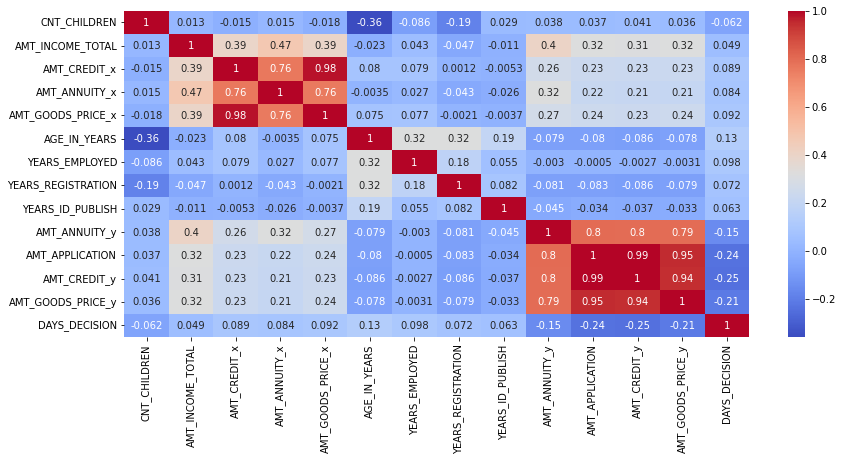

In [296]:
# Plotting heatmap to get correlation for Target = 0

plt.figure(figsize = (14,6))
sns.heatmap(data_merge_target0.corr(), annot = True,cmap= "coolwarm")
plt.show()

In [297]:
# Fetching the TOP 10 correlation for TARGET = 0 (all other cases)
# Printing the top 20 values as combinations will be repeated.

print("TOP 10 Correlation for all other cases (non-defaulters) : \n\n")
print(abs(data_merge_target0.corr())[abs(data_merge_target0.corr()) != 1].unstack().sort_values(ascending = False).head(20))

TOP 10 Correlation for all other cases (non-defaulters) : 


AMT_APPLICATION    AMT_CREDIT_y         0.994887
AMT_CREDIT_y       AMT_APPLICATION      0.994887
AMT_CREDIT_x       AMT_GOODS_PRICE_x    0.983260
AMT_GOODS_PRICE_x  AMT_CREDIT_x         0.983260
AMT_GOODS_PRICE_y  AMT_APPLICATION      0.950723
AMT_APPLICATION    AMT_GOODS_PRICE_y    0.950723
AMT_CREDIT_y       AMT_GOODS_PRICE_y    0.944095
AMT_GOODS_PRICE_y  AMT_CREDIT_y         0.944095
AMT_APPLICATION    AMT_ANNUITY_y        0.801734
AMT_ANNUITY_y      AMT_APPLICATION      0.801734
                   AMT_CREDIT_y         0.796476
AMT_CREDIT_y       AMT_ANNUITY_y        0.796476
AMT_GOODS_PRICE_y  AMT_ANNUITY_y        0.794952
AMT_ANNUITY_y      AMT_GOODS_PRICE_y    0.794952
AMT_ANNUITY_x      AMT_CREDIT_x         0.762061
AMT_CREDIT_x       AMT_ANNUITY_x        0.762061
AMT_ANNUITY_x      AMT_GOODS_PRICE_x    0.760894
AMT_GOODS_PRICE_x  AMT_ANNUITY_x        0.760894
AMT_ANNUITY_x      AMT_INCOME_TOTAL     0.473511
AMT_INCO

We can see a very high correlation between Application amount and Credit amount, Application amount and goods price, Credit amount and goods price from the previous loans, credit amount and goods price from the current application which we have previously concluded.

The correlation between the clients with payment difficulties (TARGET = 1) is similar to that of clients without payment difficulties (TARGET = 0).

# Conclusions / Recommendations : 

    1. Huge amount of loan were refused by the bank to customers who would have had no difficulty in repaying the amount. There was also many loans approved for customers who had difficulty in repaying the amount. Hence, the banks have to focus more on what categories to consider while giving out loans and pick the right candidates that match those categories to avoid going in loss.
    2. Education level plays a vital role in applicants ability to pay back the loan. The higher the education the better. Applicants with Secondary/secondary special education were more likely to default.
    3. The marital status of the applicant is a indicator of how capable he is to repay the loan back. applicants who are in Civil Marriage, Married are more likely to default.
    4. Proportionately Males were more likely to have payment difficulties, and there were many loans refused for the Male applicants.
    5. Age groups are also play a vital roles, clients in higher age category are less likely to default. But younger people are more to be applying for loans, so we need not eliminate the younger crowd, we need to scrutinize their profiles more and take a call. Check their education levels, are marital status, number of family members, do they own a liability etc.
    6. Many repeated customers loans are being refused by the banks, if in the previous applications the customers profile did not make the cut we should not directly reject the person. The applicants income might have increased, or the goods price this time might be less, the credit amount asked for can be less, we have to look at all these prospects before rejecting a loan proposal.